In [1]:
pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 8.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scikeras scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 90.8 MB/s eta 0:00:00:00:010:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spopt 0.6.0 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.5/53.5 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 21.3
    Uninstalling packaging-21.3:
      Successfully uninstalled packaging-21.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 23.8.0 requires cubinlinker, which is not installed.
cudf 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
cudf 23.8.0 requires ptxcompiler, which is not installed.
cuml 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
dask-cudf 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
keras-cv 0.8.2 requires keras-core, which is not installed.
keras-nlp 0.9.3 requires keras-core, which is not installed.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is 

In [276]:
import pandas as pd
pd.set_option('display.max_columns', None)
from unidecode import unidecode
import re
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam, RMSprop
from scikeras.wrappers import KerasRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score, max_error
import pingouin as pg
from statsmodels.graphics.factorplots import interaction_plot
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import statsmodels.stats.api as sms
import xgboost as xgb
from numpy import array
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.linear_model import LassoCV
from sklearn.model_selection import KFold, cross_val_score
from random import *
from statsmodels.stats.diagnostic import het_breuschpagan

In [5]:
"""from google.colab import files
from google.colab import drive

drive.mount('/content/drive')"""

"from google.colab import files\nfrom google.colab import drive\n\ndrive.mount('/content/drive')"

In [6]:
df = pd.read_csv("/kaggle/input/datos-tfm/DatosViviendas1.csv", encoding='latin-1', sep=';')
renta_capita_cp = pd.read_csv("/kaggle/input/datos-tfm/buscador_de_renta_media_por_codigos_postales_en_espaa.csv", sep=";")
renta_capita = pd.read_csv("/kaggle/input/datos-tfm/rfdbc-13301-14148-mun.csv", sep=';')
#renta_hogar = pd.read_csv("/content/drive/MyDrive/TFM2/Antiguos/rentaporhogarneta.csv", sep='\t')
paro_bcn = pd.read_csv("/kaggle/input/datos-tfm/paro_enero2021.csv")
consumo_gas = pd.read_csv("/kaggle/input/datos-tfm/Consum_de_gas_natural_canalitzat_per_municipis_i_sectors_de_Catalunya_20240306.csv")
consumo_energia = pd.read_csv("/kaggle/input/datos-tfm/Consum_d_energia_el_ctrica_per_municipis_i_sectors_de_Catalunya_20240306.csv")
talleres_cp = pd.read_csv("/kaggle/input/datos-tfm/Tallers_de_reparaci__de_vehicles_20240402.csv")
entitats_esportives_cp = pd.read_csv("/kaggle/input/datos-tfm/Registre_d_Entitats_Esportives_20240402.csv")
sanitarios_cp = pd.read_csv("/kaggle/input/datos-tfm/Establiments_sanitaris_autoritzats_a_Catalunya_20240402.csv")
equipamiento_cp = pd.read_csv("/kaggle/input/datos-tfm/Equipaments_de_Catalunya_20240402.csv")
comisarias_cp = pd.read_csv("/kaggle/input/datos-tfm/Comissaries_de_policia_local_de_Catalunya_20240402.csv")
certificats_cp = pd.read_csv("/kaggle/input/datos-tfm/Certificats_d_efici_ncia_energ_tica_d_edificis_20240402.csv")

/tmp/ipykernel_34/933822241.py:1: DtypeWarning: Columns (0,16,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/kaggle/input/datos-tfm/DatosViviendas1.csv", encoding='latin-1', sep=';')
/tmp/ipykernel_34/933822241.py:11: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  equipamiento_cp = pd.read_csv("/kaggle/input/datos-tfm/Equipaments_de_Catalunya_20240402.csv")
/tmp/ipykernel_34/933822241.py:13: DtypeWarning: Columns (16,65) have mixed types. Specify dtype option on import or set low_memory=False.
  certificats_cp = pd.read_csv("/kaggle/input/datos-tfm/Certificats_d_efici_ncia_energ_tica_d_edificis_20240402.csv")


# 1. Descripción datasets y análisis estadístico

## 1.1. Dataset principal

In [7]:
df.head()

Unnamed: 0       Fecha           ID  \
0          1  28/01/2022  162446518.0   
1          2  28/01/2022  162446527.0   
2          3  28/01/2022  162446511.0   
3          4  28/01/2022  162446508.0   
4          5  28/01/2022  162446503.0   

                                                 URL   ID_Cliente  \
0  https://www.fotocasa.es/es/comprar/vivienda/sa...  9,20276E+12   
1  https://www.fotocasa.es/es/comprar/vivienda/ca...  9,20276E+12   
2  https://www.fotocasa.es/es/comprar/vivienda/mo...  9,20277E+12   
3  https://www.fotocasa.es/es/comprar/vivienda/el...  9,20276E+12   
4  https://www.fotocasa.es/es/comprar/vivienda/al...  9,20276E+12   

                                         URL_Cliente Inmueble  \
0  https://www.fotocasa.es/es/comprar/inmuebles/e...     Flat   
1  https://www.fotocasa.es/es/inmobiliaria-tecnoc...     Flat   
2  https://www.fotocasa.es/es/inmobiliaria-alquic...     Flat   
3  https://www.fotocasa.es/es/inmobiliaria-duran-...     Flat   
4  https://www.fotocasa.es/es/inmobiliaria-inmobi...     Flat   

     Caracteristicas  Habitaciones  Aseos  Terraza  Piscina  Garaje    Precio  \
0  SemidetachedHouse           3.0    1.0      1.0      0.0     0.0  120000.0   
1              Attic           3.0    1.0      1.0      0.0     0.0  250000.0   
2       House_Chalet           3.0    3.0      1.0      1.0     0.0  399900.0   
3               Flat           1.0    1.0      1.0      0.0     0.0   95000.0   
4       CountryHouse           4.0    2.0      1.0      0.0     0.0  209000.0   

   Metros             Relacion CodigoPostal    Latitud    Longitud  Precision  \
0    76.0  157.894.736.842.105      11100.0  3.647.855  -6.195.769        1.0   
1    64.0              3906.25      11012.0  3.651.618  -6.272.779        0.0   
2   337.0    1.186.646.884.273      18193.0  3.712.598    -355.286        0.0   
3    78.0  121.794.871.794.872       4711.0  3.670.038  -2.788.239        0.0   
4   389.0  537.275.064.267.352      29530.0    371.995  -4.662.323        0.0   

    CMUN  CPRO  CCA      CUDIS     NPRO        NCA          NMUN  
0   31.0  11.0  1.0  1103101.0    Cádiz  Andalucía  San Fernando  
1   12.0  11.0  1.0  1101209.0    Cádiz  Andalucía         Cádiz  
2  134.0  18.0  1.0  1813402.0  Granada  Andalucía      Monachil  
3  902.0   4.0  1.0   490201.0  Almería  Andalucía     Ejido, El  
4    1.0  29.0  1.0  2900101.0   Málaga  Andalucía       Alameda

In [8]:
df.describe()

ID   Habitaciones          Aseos        Terraza  \
count  9.537230e+05  924223.000000  929280.000000  953723.000000   
mean   1.595455e+08       3.082460       1.951271       0.459815   
std    3.533633e+06       4.061161      15.942772       0.498383   
min    1.144438e+08       1.000000       1.000000       0.000000   
25%    1.587993e+08       2.000000       1.000000       0.000000   
50%    1.606687e+08       3.000000       2.000000       0.000000   
75%    1.616919e+08       4.000000       2.000000       1.000000   
max    1.624467e+08    2008.000000   11963.000000       1.000000   

             Piscina         Garaje        Precio        Metros  \
count  953723.000000  953723.000000  9.458280e+05  9.498030e+05   
mean        0.179532       0.085935  2.436920e+05  5.503293e+02   
std         0.383798       0.280268  2.760173e+06  5.930963e+04   
min         0.000000       0.000000  4.500000e+01  1.000000e+00   
25%         0.000000       0.000000  8.100000e+04  7.900000e+01   
50%         0.000000       0.000000  1.390000e+05  1.030000e+02   
75%         0.000000       0.000000  2.450000e+05  1.530000e+02   
max         1.000000       1.000000  2.147484e+09  3.800000e+07   

           Precision           CMUN           CPRO            CCA  \
count  953723.000000  947923.000000  947923.000000  947923.000000   
mean        0.195416     103.965279      23.145263       7.851411   
std         0.396521     149.704786      15.140430       4.760792   
min         0.000000       1.000000       1.000000       1.000000   
25%         0.000000      29.000000       8.000000       1.000000   
50%         0.000000      69.000000      26.000000      10.000000   
75%         0.000000     120.000000      32.000000      10.000000   
max         1.000000     916.000000      52.000000      19.000000   

              CUDIS  
count  9.479230e+05  
mean   2.324926e+06  
std    1.516342e+06  
min    1.001010e+05  
25%    8.307010e+05  
50%    2.602102e+06  
75%    3.203201e+06  
max    5.200108e+06

In [9]:
len(df)

954157

In [10]:
df.columns

Index(['Unnamed: 0', 'Fecha', 'ID', 'URL', 'ID_Cliente', 'URL_Cliente',
       'Inmueble', 'Caracteristicas', 'Habitaciones', 'Aseos', 'Terraza',
       'Piscina', 'Garaje', 'Precio', 'Metros', 'Relacion', 'CodigoPostal',
       'Latitud', 'Longitud', 'Precision', 'CMUN', 'CPRO', 'CCA', 'CUDIS',
       'NPRO', 'NCA', 'NMUN'],
      dtype='object')

In [11]:
df["Relacion"].head()

0    157.894.736.842.105
1                3906.25
2      1.186.646.884.273
3    121.794.871.794.872
4    537.275.064.267.352
Name: Relacion, dtype: object

#### 1.1.2 Análisis estadístico

In [12]:
df_num = df.select_dtypes(include=['float64', 'int64'])

##### Asimetría y curtosis

In [13]:
# Asimetría y curtosis
asimetría = df_num.skew()
curtosis = df_num.kurt()
print(asimetría)
print(curtosis)

ID               -3.389551
Habitaciones    405.912885
Aseos           502.165487
Terraza           0.161263
Piscina           1.669987
Garaje            2.954788
Precio          645.726859
Metros          402.316896
Precision         1.536284
CMUN              4.104607
CPRO              0.158286
CCA              -0.305245
CUDIS             0.161389
dtype: float64
ID                  18.362643
Habitaciones    193848.812793
Aseos           346839.105611
Terraza             -1.973999
Piscina              0.788858
Garaje               6.730784
Precio          460242.444272
Metros          211576.088426
Precision            0.360168
CMUN                18.879798
CPRO                -1.253084
CCA                 -1.091344
CUDIS               -1.250648
dtype: float64


##### Histogramas

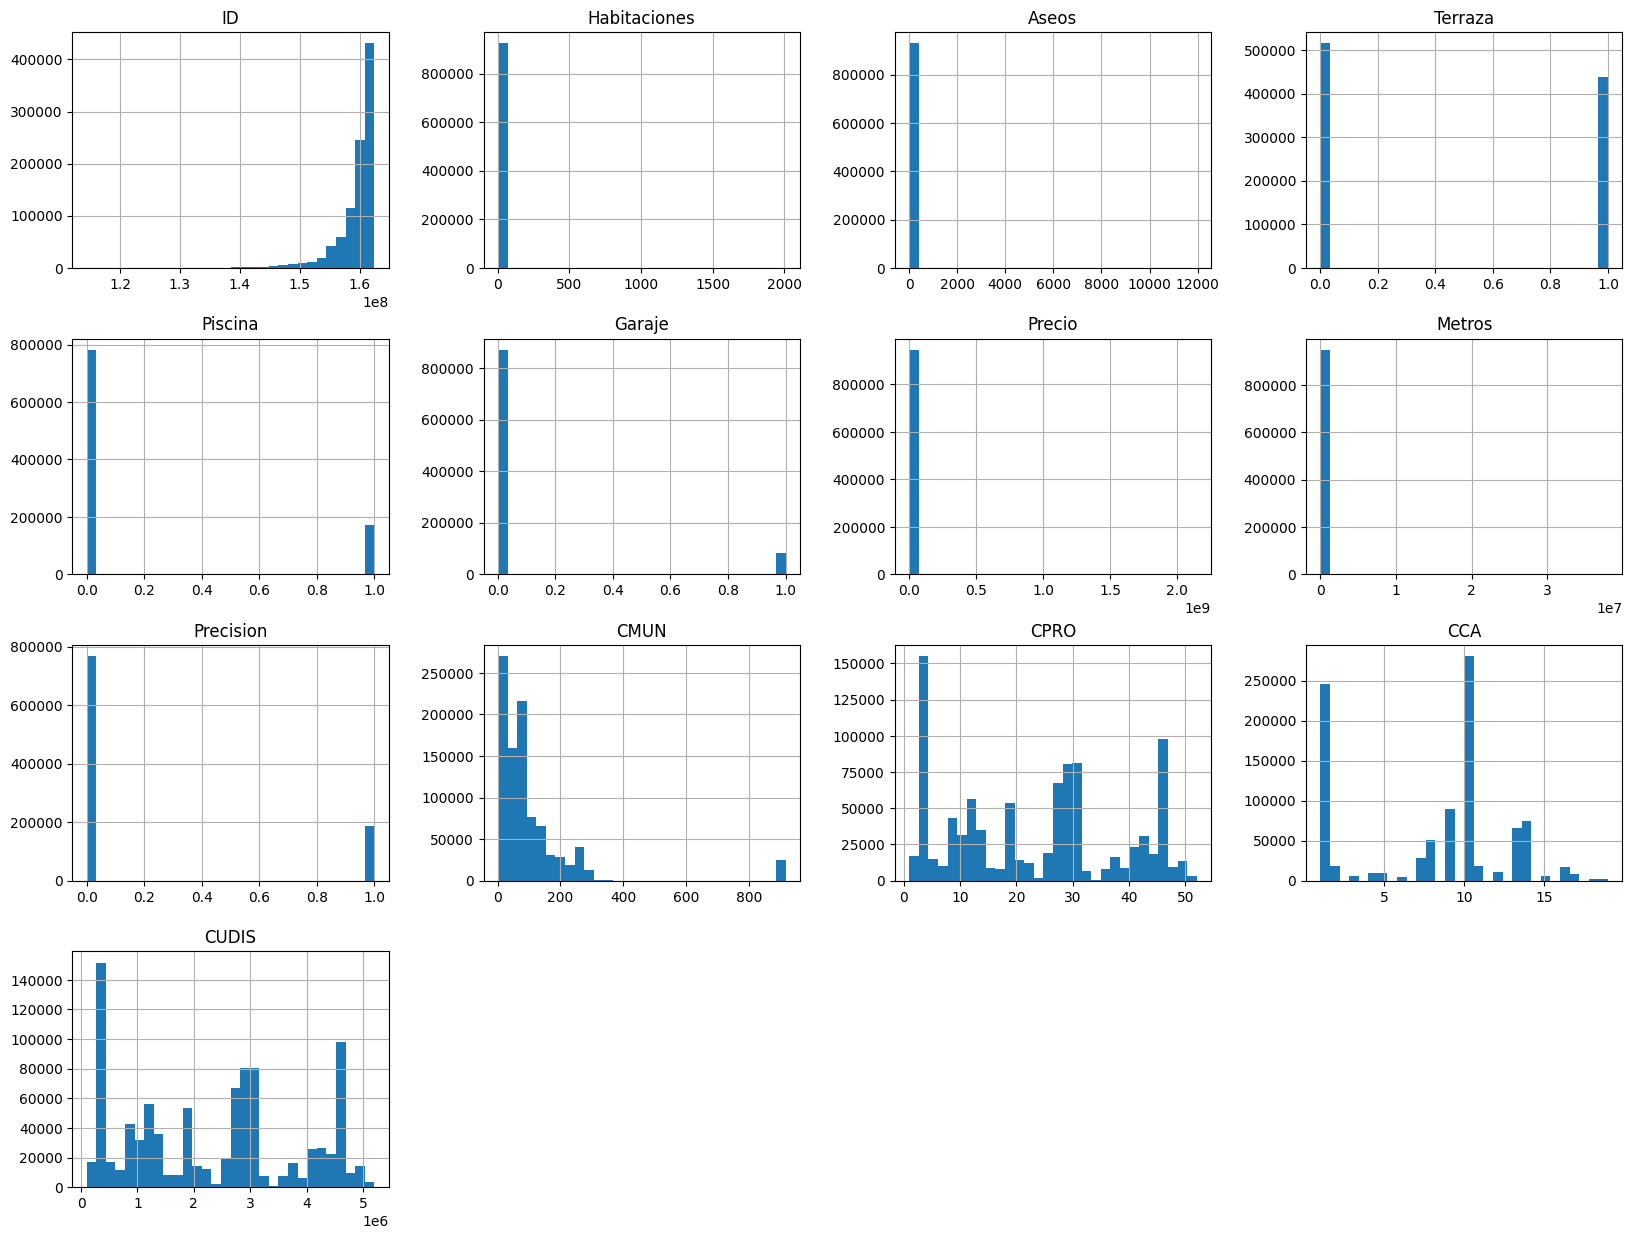

In [14]:
# Histograma
df_num.hist(bins=30, figsize=(20, 15))
plt.show()

Boxplots

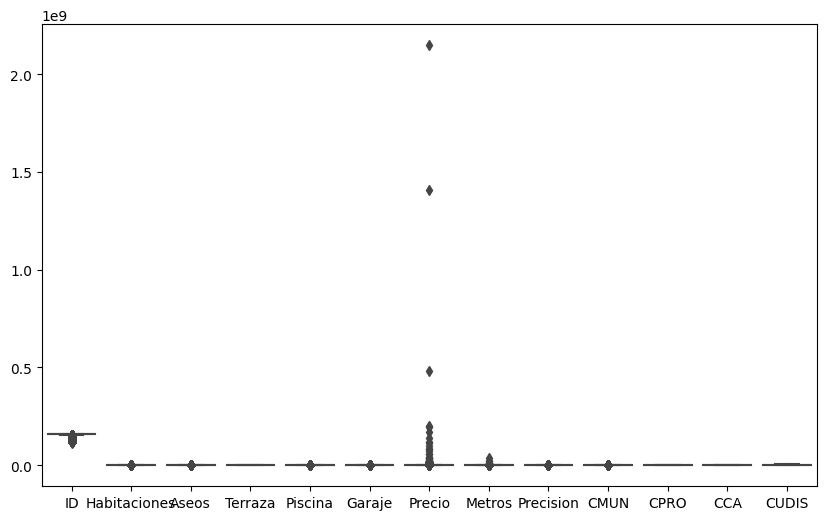

In [15]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_num)
plt.show()

Correlaciones

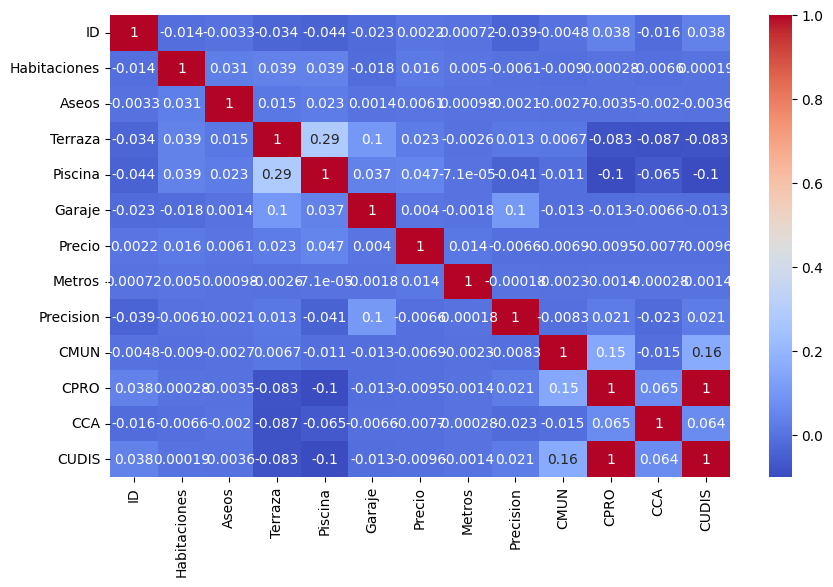

In [16]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm')
plt.show()


In [17]:
correlación_pearson = df_num.corr(method='pearson')
correlación_spearman = df_num.corr(method='spearman')
print(correlación_pearson)
print(correlación_spearman)

                    ID  Habitaciones     Aseos   Terraza   Piscina    Garaje  \
ID            1.000000     -0.013684 -0.003322 -0.033580 -0.044174 -0.023440   
Habitaciones -0.013684      1.000000  0.031053  0.038890  0.038829 -0.018250   
Aseos        -0.003322      0.031053  1.000000  0.014605  0.023434  0.001439   
Terraza      -0.033580      0.038890  0.014605  1.000000  0.285791  0.100832   
Piscina      -0.044174      0.038829  0.023434  0.285791  1.000000  0.036826   
Garaje       -0.023440     -0.018250  0.001439  0.100832  0.036826  1.000000   
Precio        0.002156      0.016404  0.006051  0.023462  0.047086  0.003973   
Metros        0.000716      0.005049  0.000984 -0.002551 -0.000071 -0.001785   
Precision    -0.039447     -0.006114 -0.002109  0.012760 -0.041456  0.104209   
CMUN         -0.004819     -0.009019 -0.002706  0.006706 -0.011412 -0.012912   
CPRO          0.037736      0.000278 -0.003543 -0.083442 -0.101199 -0.013339   
CCA          -0.016077     -0.006593 -0.

Anova

In [18]:
columnas = ['Habitaciones', 'Aseos', 'Terraza',
       'Piscina', 'Garaje', 'Precio', 'Metros', 'CodigoPostal',
       'CMUN', 'CPRO', 'CCA', 'Caracteristicas']

# Calcular la matriz de correlación entre las columnas seleccionadas
df_anova = df[columnas]

In [19]:
df_anova.columns

Index(['Habitaciones', 'Aseos', 'Terraza', 'Piscina', 'Garaje', 'Precio',
       'Metros', 'CodigoPostal', 'CMUN', 'CPRO', 'CCA', 'Caracteristicas'],
      dtype='object')

In [20]:
df_anova.groupby('Caracteristicas').size()

Caracteristicas
Apartment                 79749
Attic                     31175
CountryHouse              21608
Duplex                    22926
Flat                     513489
GroundFloorWithGarden     13804
House_Chalet             191987
Loft                       1502
SemiDetached               4201
SemidetachedHouse         67427
Study                      5225
dtype: int64

In [21]:
df_anova['CodigoPostal'] = pd.to_numeric(df_anova['CodigoPostal'], errors='coerce')

/tmp/ipykernel_34/672515492.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_anova['CodigoPostal'] = pd.to_numeric(df_anova['CodigoPostal'], errors='coerce')


In [22]:
formula = 'Precio ~ Habitaciones + Aseos + Terraza + Piscina + Garaje + Metros + CodigoPostal + CMUN + CPRO + CCA'

# Ajustar el modelo usando OLS (Ordinary Least Squares)
model = ols(formula, data=df_anova).fit()

# Realizar el ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                    sum_sq        df            F         PR(>F)
Habitaciones  1.337239e+15       1.0   170.001004   7.455231e-39
Aseos         1.347440e+14       1.0    17.129774   3.491387e-05
Terraza       6.111764e+14       1.0    77.697833   1.202789e-18
Piscina       1.165822e+16       1.0  1482.089767  4.940656e-324
Garaje        1.598544e+13       1.0     2.032202   1.539977e-01
Metros        5.522876e+14       1.0    70.211394   5.335259e-17
CodigoPostal  2.468436e+12       1.0     0.313808   5.753529e-01
CMUN          2.348576e+14       1.0    29.857053   4.652241e-08
CPRO          4.503568e+12       1.0     0.572531   4.492551e-01
CCA           1.165184e+14       1.0    14.812789   1.187358e-04
Residual      7.105860e+18  903356.0          NaN            NaN


Normalidad

In [23]:
df_anova = df_anova.dropna(subset=['Precio'])
stat, p = stats.shapiro(df_anova['Precio'])
print('Estadístico de Shapiro-Wilk:', stat)
print('Valor p:', p)

if p > 0.05:
    print('La variable sigue una distribución normal (no se rechaza H0).')
else:
    print('La variable no sigue una distribución normal (se rechaza H0).')

Estadístico de Shapiro-Wilk: 0.011279404163360596
Valor p: 0.0
La variable no sigue una distribución normal (se rechaza H0).


/opt/conda/lib/python3.10/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


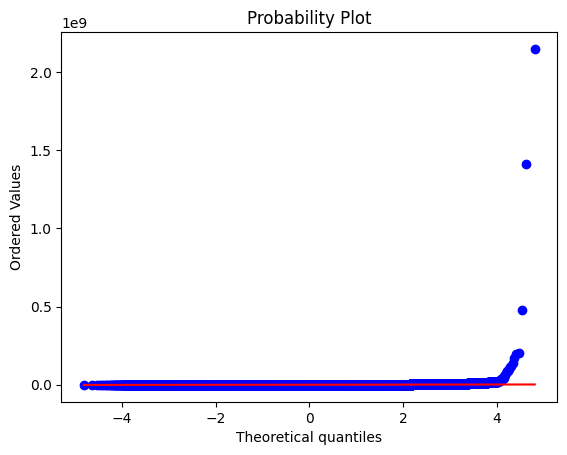

In [24]:
import matplotlib.pyplot as plt
import scipy.stats as stats

stats.probplot(df_anova['Precio'], dist="norm", plot=plt)
plt.show()

In [25]:
"""fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 3.5))
sns.violinplot(
    x       = 'Precio',
    y       = 'Piscina',
    data    = df_anova,
    palette = 'tab10',
    ax      = ax
)
ax.set_title('Distribución del Precio')
ax.set_xlabel('Precio')
ax.set_ylabel('Piscina')"""

"fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 3.5))\nsns.violinplot(\n    x       = 'Precio',\n    y       = 'Piscina',\n    data    = df_anova,\n    palette = 'tab10',\n    ax      = ax\n)\nax.set_title('Distribución del Precio')\nax.set_xlabel('Precio')\nax.set_ylabel('Piscina')"

## 1.2 Dataset Renta per capita

In [26]:
len(renta_capita)

1383

In [27]:
renta_capita.head()

any  municipi                         concepte  \
0  2020    Abrera  renda familiar disponible bruta   
1  2020    Abrera  renda familiar disponible bruta   
2  2020    Abrera  renda familiar disponible bruta   
3  2020  Agramunt  renda familiar disponible bruta   
4  2020  Agramunt  renda familiar disponible bruta   

                            indicador estat   valor  
0                    valor (milers €)     p  224030  
1                    per habitant (€)     p   17925  
2  per habitant (índex Catalunya=100)     p   102,1  
3                    valor (milers €)     p   83383  
4                    per habitant (€)     p   15374

In [28]:
renta_capita["indicador"].unique()

array(['valor (milers €)', 'per habitant (€)',
       'per habitant (índex Catalunya=100)'], dtype=object)

In [29]:
renta_capita["estat"].unique()

array(['p', '..'], dtype=object)

In [30]:
renta_capita.describe()

any
count  1383.0
mean   2020.0
std       0.0
min    2020.0
25%    2020.0
50%    2020.0
75%    2020.0
max    2020.0

#### 1.2.2 Análisis estadístico

In [31]:
renta_capita['valor'] = pd.to_numeric(renta_capita['valor'], errors='coerce')

In [32]:
rcmun_num = renta_capita.select_dtypes(include=['float64', 'int64'])

In [33]:
rcmun_num.describe()

any         valor
count  1383.0  9.640000e+02
mean   2020.0  2.863881e+05
std       0.0  4.516021e+06
min    2020.0  6.900000e+01
25%    2020.0  1.580700e+04
50%    2020.0  1.904450e+04
75%    2020.0  6.531050e+04
max    2020.0  1.357057e+08

##### Asimetría y curtosis

In [34]:
# Asimetría y curtosis
asimetría = rcmun_num.skew()
curtosis = rcmun_num.kurt()
print(asimetría)
print(curtosis)

any       0.000000
valor    28.508203
dtype: float64
any        0.000000
valor    845.240054
dtype: float64


Histograma

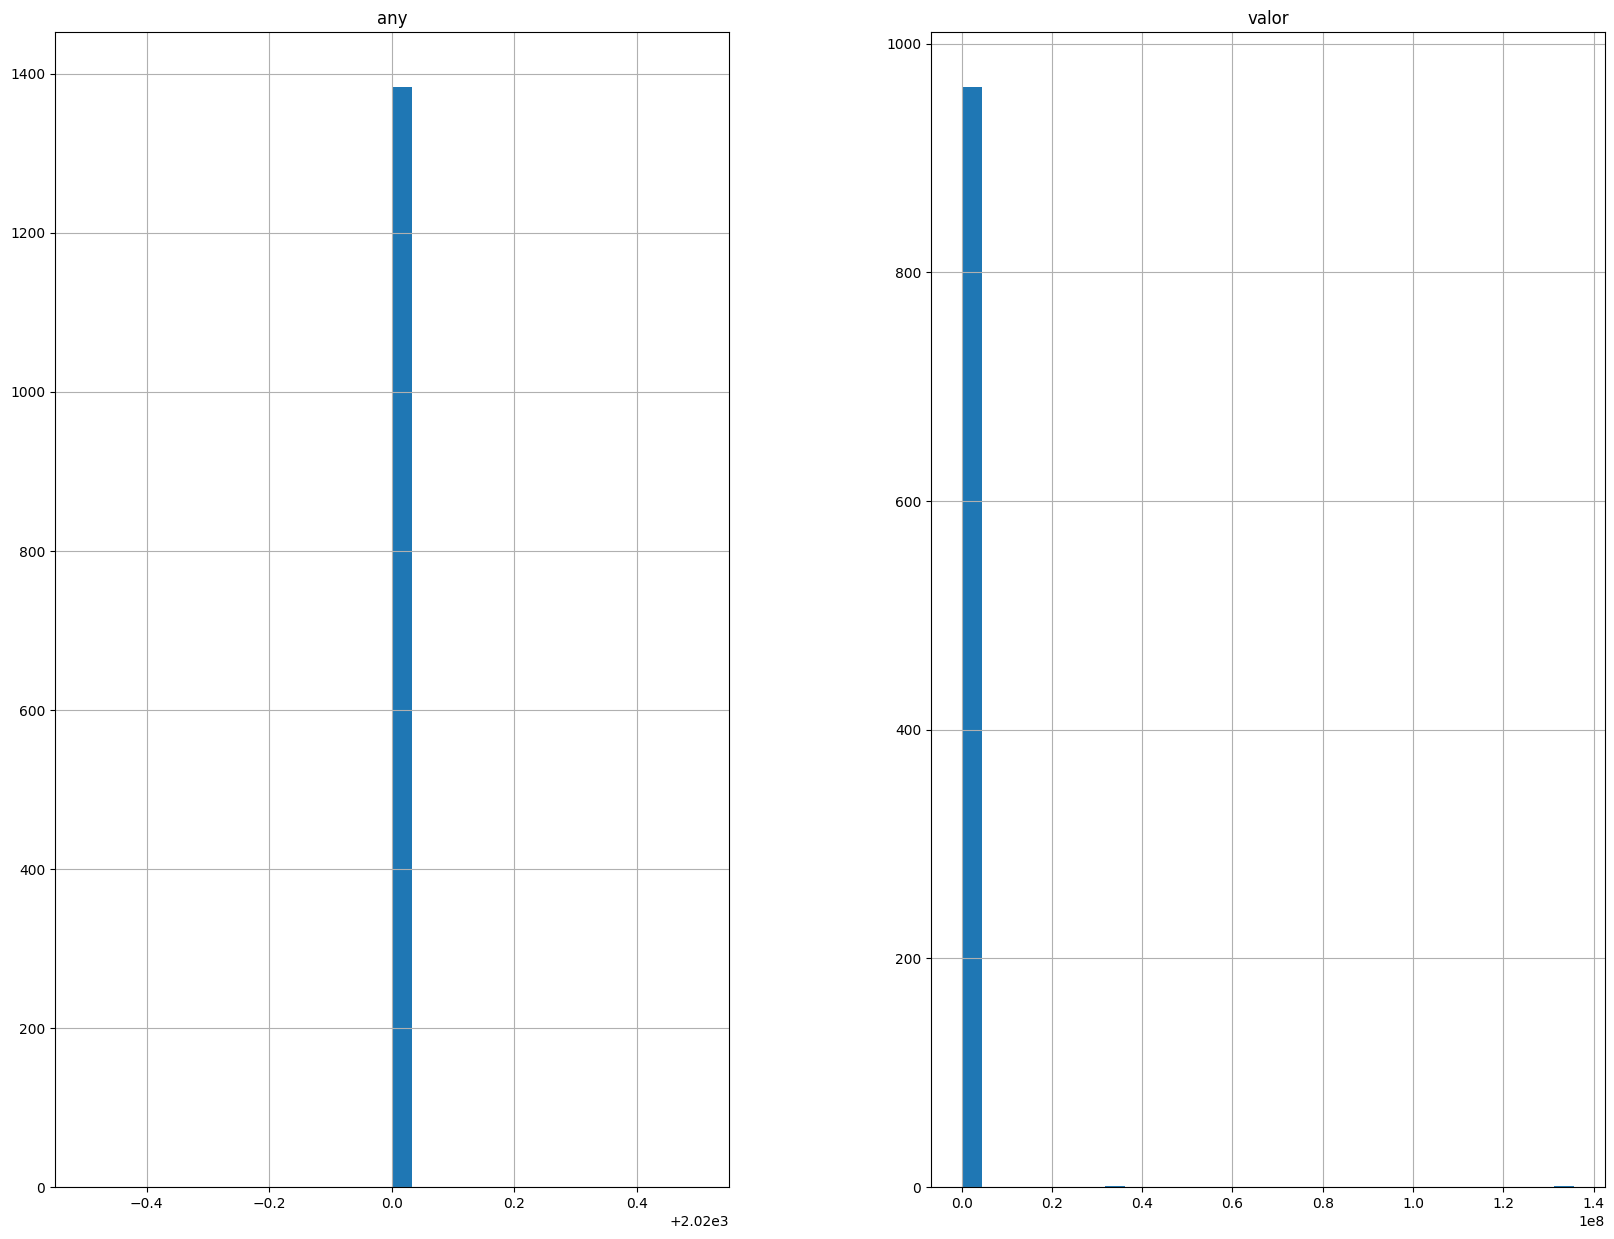

In [35]:
# Histograma
rcmun_num.hist(bins=30, figsize=(20, 15))
plt.show()

Boxplot

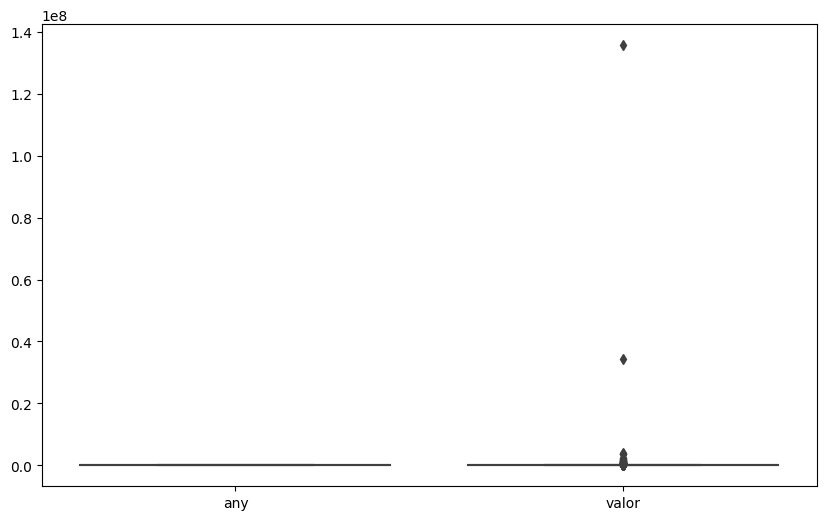

In [36]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=rcmun_num)
plt.show()

Correlaciones

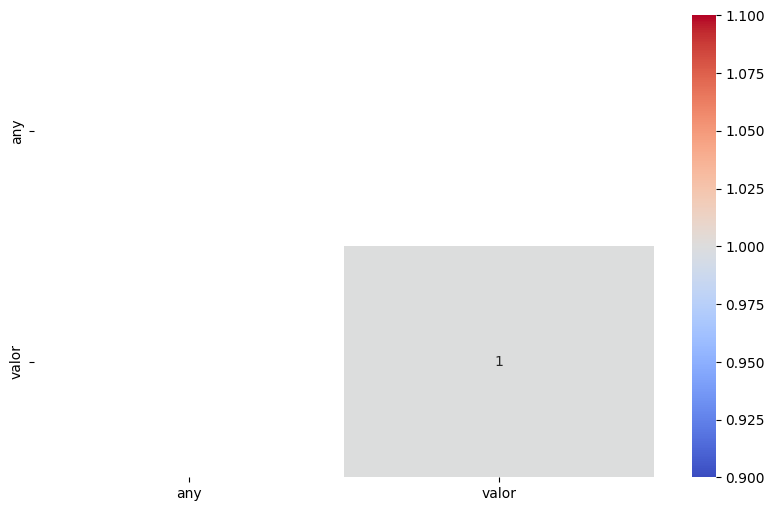

In [37]:
plt.figure(figsize=(10, 6))
sns.heatmap(rcmun_num.corr(), annot=True, cmap='coolwarm')
plt.show()

In [38]:
correlación_pearson = rcmun_num.corr(method='pearson')
correlación_spearman = rcmun_num.corr(method='spearman')
print(correlación_pearson)
print(correlación_spearman)

       any  valor
any    NaN    NaN
valor  NaN    1.0
       any  valor
any    NaN    NaN
valor  NaN    1.0


ANOVA

In [39]:
formula = 'any ~ valor'

# Ajustar el modelo usando OLS (Ordinary Least Squares)
model = ols(formula, data=rcmun_num).fit()

# Realizar el ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                sum_sq     df          F    PR(>F)
valor     2.381363e-24    1.0  11.441231  0.000747
Residual  2.002294e-22  962.0        NaN       NaN


## 1.3 Datset Renta por hogar

In [40]:
#renta_hogar.head()

In [41]:
#renta_hogar.describe()

## 1.4 Dataset Paro por Municipio

In [42]:
len(paro_bcn)

947

In [43]:
paro_bcn.head()

MUNICIPIOS TOTAL HOMBRES(<25) HOMBRES(25-44) HOMBRES(>44)  \
0              ABRERA   680           33            122          136   
1  AGUILAR DE SEGARRA    12                           1            3   
2          AIGUAFREDA   129            7             25           39   
3              ALELLA   296           13             39           78   
4              ALPENS     9                           2            3   

  MUJERES(<25) MUJERES(25-44) MUJERES(>44) AGRICULTURA INDUSTRIA CONSTRUCCION  \
0           34            152          203           6        92           41   
1                           1            7                                  1   
2            3             20           35           5        24            7   
3           12             60           94           3        21           23   
4                           1            3                     4            1   

  SERVICIOIS SIN_EMPLEO_ANTERIOR  
0        516                  25  
1         11                      
2         83                  10  
3        239                  10  
4          4

In [44]:
paro_bcn.describe()

MUNICIPIOS TOTAL HOMBRES(<25) HOMBRES(25-44) HOMBRES(>44) MUJERES(<25)  \
count         947   947          947            947          947          947   
unique        947   400          111            194          224          101   
top         XERTA     6                           1            2                
freq            1    29          312             99           79          326   

       MUJERES(25-44) MUJERES(>44) AGRICULTURA INDUSTRIA CONSTRUCCION  \
count             947          947         947       947          947   
unique            225          251          85       173          140   
top                              1                                      
freq               76           81         276       134          213   

       SERVICIOIS SIN_EMPLEO_ANTERIOR  
count         947                 947  
unique        329                 123  
top             5                      
freq           37                 329

##### 1.4.2 Análisis estadístico

In [45]:
paro_bcn['TOTAL'] = pd.to_numeric(paro_bcn['TOTAL'], errors='coerce')
paro_bcn['HOMBRES(<25)'] = pd.to_numeric(paro_bcn['HOMBRES(<25)'], errors='coerce')
paro_bcn['HOMBRES(25-44)'] = pd.to_numeric(paro_bcn['HOMBRES(25-44)'], errors='coerce')
paro_bcn['HOMBRES(>44)'] = pd.to_numeric(paro_bcn['HOMBRES(>44)'], errors='coerce')
paro_bcn['MUJERES(<25)'] = pd.to_numeric(paro_bcn['MUJERES(<25)'], errors='coerce')
paro_bcn['MUJERES(25-44)'] = pd.to_numeric(paro_bcn['MUJERES(25-44)'], errors='coerce')
paro_bcn['MUJERES(>44)'] = pd.to_numeric(paro_bcn['MUJERES(>44)'], errors='coerce')
paro_bcn['AGRICULTURA'] = pd.to_numeric(paro_bcn['AGRICULTURA'], errors='coerce')
paro_bcn['INDUSTRIA'] = pd.to_numeric(paro_bcn['INDUSTRIA'], errors='coerce')
paro_bcn['CONSTRUCCION'] = pd.to_numeric(paro_bcn['CONSTRUCCION'], errors='coerce')
paro_bcn['SERVICIOIS'] = pd.to_numeric(paro_bcn['SERVICIOIS'], errors='coerce')
paro_bcn['SIN_EMPLEO_ANTERIOR'] = pd.to_numeric(paro_bcn['SIN_EMPLEO_ANTERIOR'], errors='coerce')

In [46]:
paro_num = paro_bcn.select_dtypes(include=['float64', 'int64'])

In [47]:
paro_num.describe()

TOTAL  HOMBRES(<25)  HOMBRES(25-44)  HOMBRES(>44)  MUJERES(<25)  \
count  945.000000    635.000000      868.000000    902.000000    621.000000   
mean   112.227966     30.277587       53.314291     62.323483     25.555187   
std    185.985060     83.320451      122.087903    136.189686     72.680273   
min      1.000000      1.000000        1.000000      1.000000      1.000000   
25%      9.000000      2.000000        3.000000      4.000000      2.000000   
50%     30.000000      6.000000        9.000000     12.000000      5.000000   
75%    119.000000     20.500000       42.000000     50.000000     16.000000   
max    998.000000    846.000000      926.000000    922.000000    720.000000   

       MUJERES(25-44)  MUJERES(>44)  AGRICULTURA   INDUSTRIA  CONSTRUCCION  \
count      871.000000    909.000000   671.000000  813.000000    734.000000   
mean        62.819958     70.698519    14.912225   44.834823     34.963245   
std        136.576629    145.239786    36.543308  101.489432     93.475126   
min          1.000000      1.000000     1.000000    1.000000      1.000000   
25%          4.000000      4.000000     2.000000    3.000000      2.000000   
50%         11.000000     12.000000     4.000000    8.000000      6.000000   
75%         52.500000     61.000000    12.000000   37.000000     23.750000   
max        998.000000    963.000000   407.000000  837.000000    992.000000   

       SERVICIOIS  SIN_EMPLEO_ANTERIOR  
count  940.000000           618.000000  
mean    98.015638            35.528570  
std    175.515455            97.266222  
min      1.000000             1.000000  
25%      6.967000             2.000000  
50%     22.000000             6.000000  
75%     91.250000            21.000000  
max    964.000000           844.000000

Asimetrias

In [48]:
# Asimetría y curtosis
asimetría = paro_num.skew()
curtosis = paro_num.kurt()
print(asimetría)
print(curtosis)

TOTAL                  2.505668
HOMBRES(<25)           6.016535
HOMBRES(25-44)         4.099170
HOMBRES(>44)           3.796693
MUJERES(<25)           6.074602
MUJERES(25-44)         3.713272
MUJERES(>44)           3.354217
AGRICULTURA            6.202225
INDUSTRIA              4.368450
CONSTRUCCION           6.029940
SERVICIOIS             2.783587
SIN_EMPLEO_ANTERIOR    5.418944
dtype: float64
TOTAL                   6.426264
HOMBRES(<25)           43.397175
HOMBRES(25-44)         19.209981
HOMBRES(>44)           16.043272
MUJERES(<25)           43.627412
MUJERES(25-44)         15.301453
MUJERES(>44)           12.281309
AGRICULTURA            49.335597
INDUSTRIA              22.703386
CONSTRUCCION           46.087309
SERVICIOIS              8.033170
SIN_EMPLEO_ANTERIOR    34.775643
dtype: float64


Histogramas

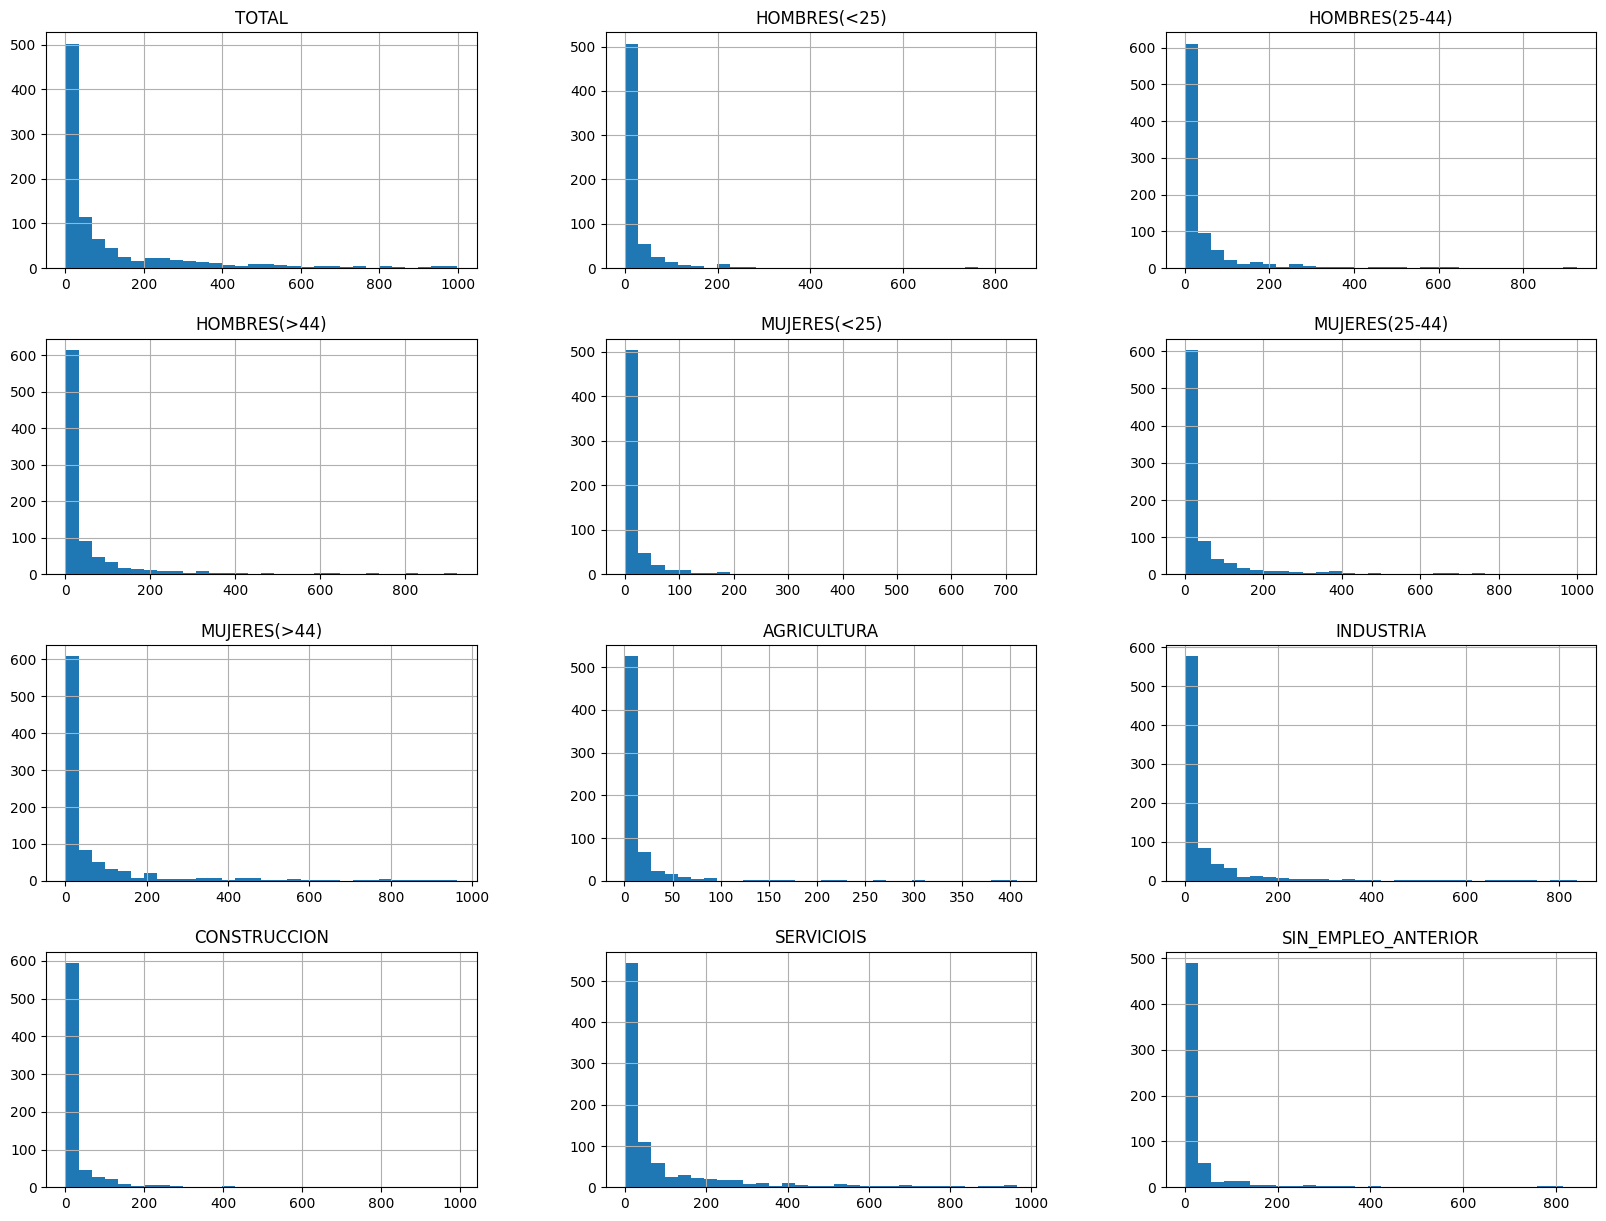

In [49]:
# Histograma
paro_num.hist(bins=30, figsize=(20, 15))
plt.show()

Boxplot

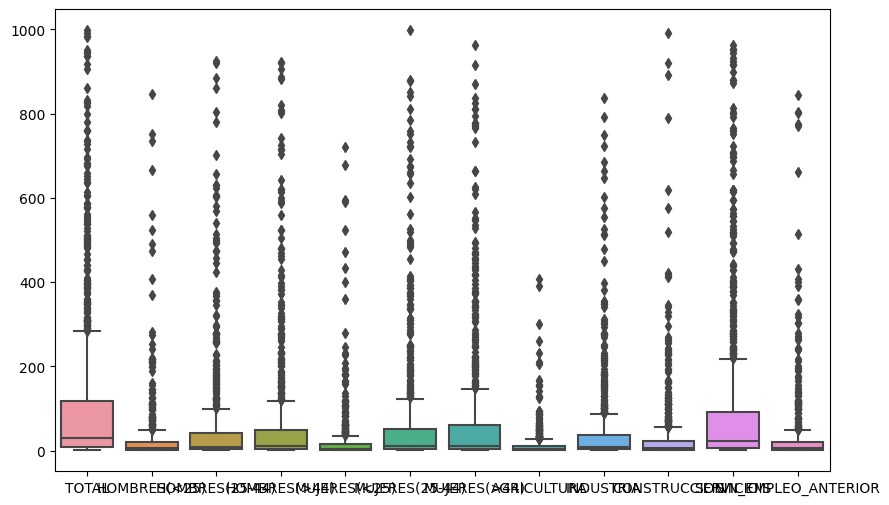

In [50]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=paro_num)
plt.show()

Correlaciones

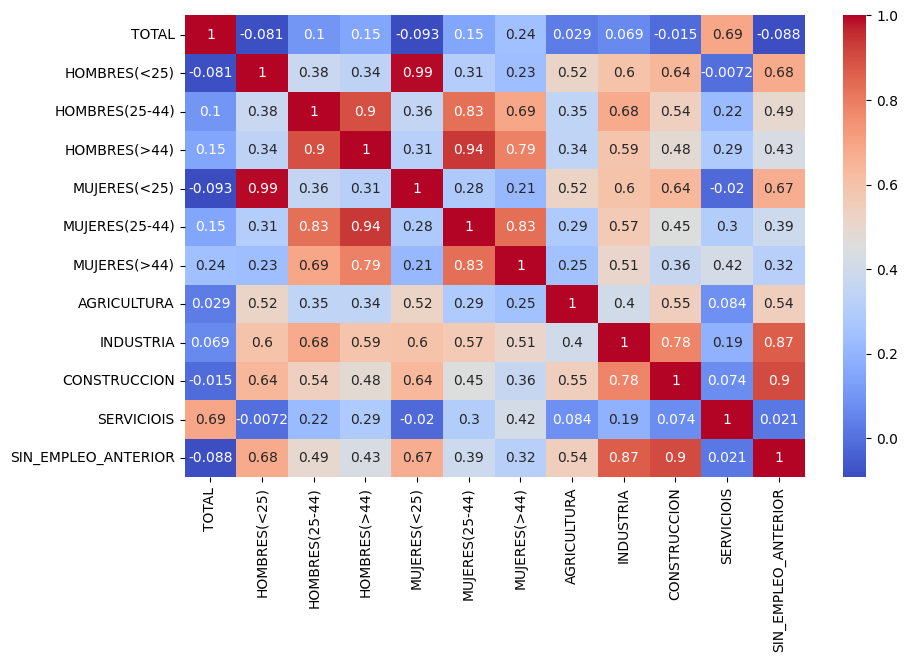

In [51]:
plt.figure(figsize=(10, 6))
sns.heatmap(paro_num.corr(), annot=True, cmap='coolwarm')
plt.show()

In [52]:
correlación_pearson = paro_num.corr(method='pearson')
correlación_spearman = paro_num.corr(method='spearman')
print(correlación_pearson)
print(correlación_spearman)

                        TOTAL  HOMBRES(<25)  HOMBRES(25-44)  HOMBRES(>44)  \
TOTAL                1.000000     -0.080828        0.099530      0.149059   
HOMBRES(<25)        -0.080828      1.000000        0.375280      0.335559   
HOMBRES(25-44)       0.099530      0.375280        1.000000      0.896270   
HOMBRES(>44)         0.149059      0.335559        0.896270      1.000000   
MUJERES(<25)        -0.092746      0.994496        0.356038      0.314007   
MUJERES(25-44)       0.146742      0.305674        0.828171      0.936745   
MUJERES(>44)         0.241969      0.232002        0.691899      0.786991   
AGRICULTURA          0.029081      0.517203        0.345515      0.343840   
INDUSTRIA            0.069091      0.598709        0.679038      0.592566   
CONSTRUCCION        -0.015479      0.640574        0.543133      0.480052   
SERVICIOIS           0.690219     -0.007168        0.219800      0.287431   
SIN_EMPLEO_ANTERIOR -0.088177      0.675860        0.493442      0.430994   

Anova

In [53]:
paro_bcn.groupby('MUNICIPIOS').agg(['mean', 'std'])

TOTAL     HOMBRES(<25)     HOMBRES(25-44)      \
                     mean std         mean std           mean std   
MUNICIPIOS                                                          
ABELLA DE LA CONCA   10.0 NaN          NaN NaN            1.0 NaN   
ABRERA              680.0 NaN         33.0 NaN          122.0 NaN   
AGER                 25.0 NaN          2.0 NaN            5.0 NaN   
AGRAMUNT            281.0 NaN         13.0 NaN           37.0 NaN   
AGUILAR DE SEGARRA   12.0 NaN          NaN NaN            1.0 NaN   
...                   ...  ..          ...  ..            ...  ..   
VINAIXA              22.0 NaN          NaN NaN            4.0 NaN   
VINEBRE              31.0 NaN          1.0 NaN            9.0 NaN   
VINYOLS I ELS ARCS  119.0 NaN         11.0 NaN           14.0 NaN   
VIVER I SERRATEIX     2.0 NaN          NaN NaN            NaN NaN   
XERTA                73.0 NaN          5.0 NaN           13.0 NaN   

                   HOMBRES(>44)     MUJERES(<25)     MUJERES(25-44)      \
                           mean std         mean std           mean std   
MUNICIPIOS                                                                
ABELLA DE LA CONCA          5.0 NaN          NaN NaN            NaN NaN   
ABRERA                    136.0 NaN         34.0 NaN          152.0 NaN   
AGER                        3.0 NaN          1.0 NaN            8.0 NaN   
AGRAMUNT                   65.0 NaN         13.0 NaN           67.0 NaN   
AGUILAR DE SEGARRA          3.0 NaN          NaN NaN            1.0 NaN   
...                         ...  ..          ...  ..            ...  ..   
VINAIXA                     6.0 NaN          1.0 NaN            1.0 NaN   
VINEBRE                     4.0 NaN          1.0 NaN            8.0 NaN   
VINYOLS I ELS ARCS         28.0 NaN          5.0 NaN           28.0 NaN   
VIVER I SERRATEIX           NaN NaN          NaN NaN            NaN NaN   
XERTA                      23.0 NaN          3.0 NaN            9.0 NaN   

                   MUJERES(>44)     AGRICULTURA     INDUSTRIA      \
                           mean std        mean std      mean std   
MUNICIPIOS                                                          
ABELLA DE LA CONCA          4.0 NaN         NaN NaN       3.0 NaN   
ABRERA                    203.0 NaN         6.0 NaN      92.0 NaN   
AGER                        6.0 NaN         3.0 NaN       1.0 NaN   
AGRAMUNT                   86.0 NaN        34.0 NaN      74.0 NaN   
AGUILAR DE SEGARRA          7.0 NaN         NaN NaN       NaN NaN   
...                         ...  ..         ...  ..       ...  ..   
VINAIXA                    10.0 NaN         2.0 NaN       5.0 NaN   
VINEBRE                     8.0 NaN         8.0 NaN       1.0 NaN   
VINYOLS I ELS ARCS         33.0 NaN         8.0 NaN       7.0 NaN   
VIVER I SERRATEIX           2.0 NaN         NaN NaN       2.0 NaN   
XERTA                      20.0 NaN         6.0 NaN       7.0 NaN   

                   CONSTRUCCION     SERVICIOIS     SIN_EMPLEO_ANTERIOR      
                           mean std       mean std                mean std  
MUNICIPIOS                                                                  
ABELLA DE LA CONCA          NaN NaN        7.0 NaN                 NaN NaN  
ABRERA                     41.0 NaN      516.0 NaN                25.0 NaN  
AGER                        1.0 NaN       19.0 NaN                 1.0 NaN  
AGRAMUNT                   27.0 NaN      127.0 NaN                19.0 NaN  
AGUILAR DE SEGARRA          1.0 NaN       11.0 NaN                 NaN NaN  
...                         ...  ..        ...  ..                 ...  ..  
VINAIXA                     1.0 NaN       12.0 NaN                 2.0 NaN  
VINEBRE                     3.0 NaN       17.0 NaN                 2.0 NaN  
VINYOLS I ELS ARCS         10.0 NaN       84.0 NaN                10.0 NaN  
VIVER I SERRATEIX           NaN NaN        NaN NaN                 NaN NaN  
XERTA                       7.0 Na

In [54]:
formula = 'TOTAL ~ AGRICULTURA + INDUSTRIA + CONSTRUCCION + SERVICIOIS + SIN_EMPLEO_ANTERIOR'

# Ajustar el modelo usando OLS (Ordinary Least Squares)
model = ols(formula, data=paro_bcn).fit()

# Realizar el ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                           sum_sq     df           F        PR(>F)
AGRICULTURA          2.566076e+03    1.0    0.079507  7.780883e-01
INDUSTRIA            1.921985e+03    1.0    0.059551  8.073121e-01
CONSTRUCCION         4.639384e+03    1.0    0.143746  7.047527e-01
SERVICIOIS           8.617239e+06    1.0  266.995884  5.047039e-48
SIN_EMPLEO_ANTERIOR  5.894903e+04    1.0    1.826472  1.771827e-01
Residual             1.545963e+07  479.0         NaN           NaN


## 1.5 Dataset Consumo Gas por Municipio

In [55]:
consumo_gas.head()

ANY PROVINCIA   COMARCA  CDMUN    MUNICIPI          SECTOR  \
0  2022    GIRONA   GIRONES  17002   AIGUAVIVA      INDUSTRIAL   
1  2022    GIRONA   GIRONES  17002   AIGUAVIVA        TERCIARI   
2  2022    GIRONA   GIRONES  17002   AIGUAVIVA  USOS DOMESTICS   
3  2022    GIRONA  GARROTXA  17010  ARGELAGUER      INDUSTRIAL   
4  2022    GIRONA  GARROTXA  17010  ARGELAGUER         PRIMARI   

   Consum [kWh PCS]                          Observacions  
0        23539402.0                                   NaN  
1          761879.0                                   NaN  
2         1049126.0                                   NaN  
3               NaN  Dades subjectes a secret estadístic.  
4               NaN  Dades subjectes a secret estadístic.

In [56]:
consumo_gas.describe()

ANY         CDMUN  Consum [kWh PCS]
count  9606.000000   9606.000000      7.561000e+03
mean   2017.596502  17148.292213      5.065841e+07
std       2.853896  12194.033298      3.112921e+08
min    2013.000000   8001.000000      6.900000e+01
25%    2015.000000   8147.000000      2.075472e+06
50%    2018.000000   8294.000000      7.054274e+06
75%    2020.000000  25023.000000      2.418713e+07
max    2022.000000  43907.000000      8.641686e+09

In [57]:
consumo_gas

ANY  PROVINCIA            COMARCA  CDMUN               MUNICIPI  \
0     2022     GIRONA            GIRONES  17002              AIGUAVIVA   
1     2022     GIRONA            GIRONES  17002              AIGUAVIVA   
2     2022     GIRONA            GIRONES  17002              AIGUAVIVA   
3     2022     GIRONA           GARROTXA  17010             ARGELAGUER   
4     2022     GIRONA           GARROTXA  17010             ARGELAGUER   
...    ...        ...                ...    ...                    ...   
9601  2013  BARCELONA  VALLES OCCIDENTAL   8904       BADIA DEL VALLES   
9602  2013  BARCELONA  VALLES OCCIDENTAL   8904       BADIA DEL VALLES   
9603  2013  BARCELONA     BAIX LLOBREGAT   8905  PALMA DE CERVELLO, LA   
9604  2013  BARCELONA     BAIX LLOBREGAT   8905  PALMA DE CERVELLO, LA   
9605  2013  BARCELONA     BAIX LLOBREGAT   8905  PALMA DE CERVELLO, LA   

              SECTOR  Consum [kWh PCS]                          Observacions  
0         INDUSTRIAL        23539402.0                                   NaN  
1           TERCIARI          761879.0                                   NaN  
2     USOS DOMESTICS         1049126.0                                   NaN  
3         INDUSTRIAL               NaN  Dades subjectes a secret estadístic.  
4            PRIMARI               NaN  Dades subjectes a secret estadístic.  
...              ...               ...                                   ...  
9601        TERCIARI         3512465.0                                   NaN  
9602  USOS DOMESTICS        16857702.0                                   NaN  
9603      INDUSTRIAL               NaN  Dades subjectes a secret estadístic.  
9604        TERCIARI          519172.0                                   NaN  
9605  USOS DOMESTICS         4277140.0                                   NaN  

[9606 rows x 8 columns]

In [58]:
consumo_gas.dtypes

ANY                   int64
PROVINCIA            object
COMARCA              object
CDMUN                 int64
MUNICIPI             object
SECTOR               object
Consum [kWh PCS]    float64
Observacions         object
dtype: object

In [59]:
len(consumo_gas)

9606

##### 1.5.2 Análisis estadístico

In [60]:
gas_num = consumo_gas.select_dtypes(include=['float64', 'int64'])

Asimetrias

In [61]:
# Asimetría y curtosis
asimetría = gas_num.skew()
curtosis = gas_num.kurt()
print(asimetría)
print(curtosis)

ANY                 -0.040428
CDMUN                1.222103
Consum [kWh PCS]    18.363853
dtype: float64
ANY                  -1.207465
CDMUN                 0.163998
Consum [kWh PCS]    418.933823
dtype: float64


Histograma

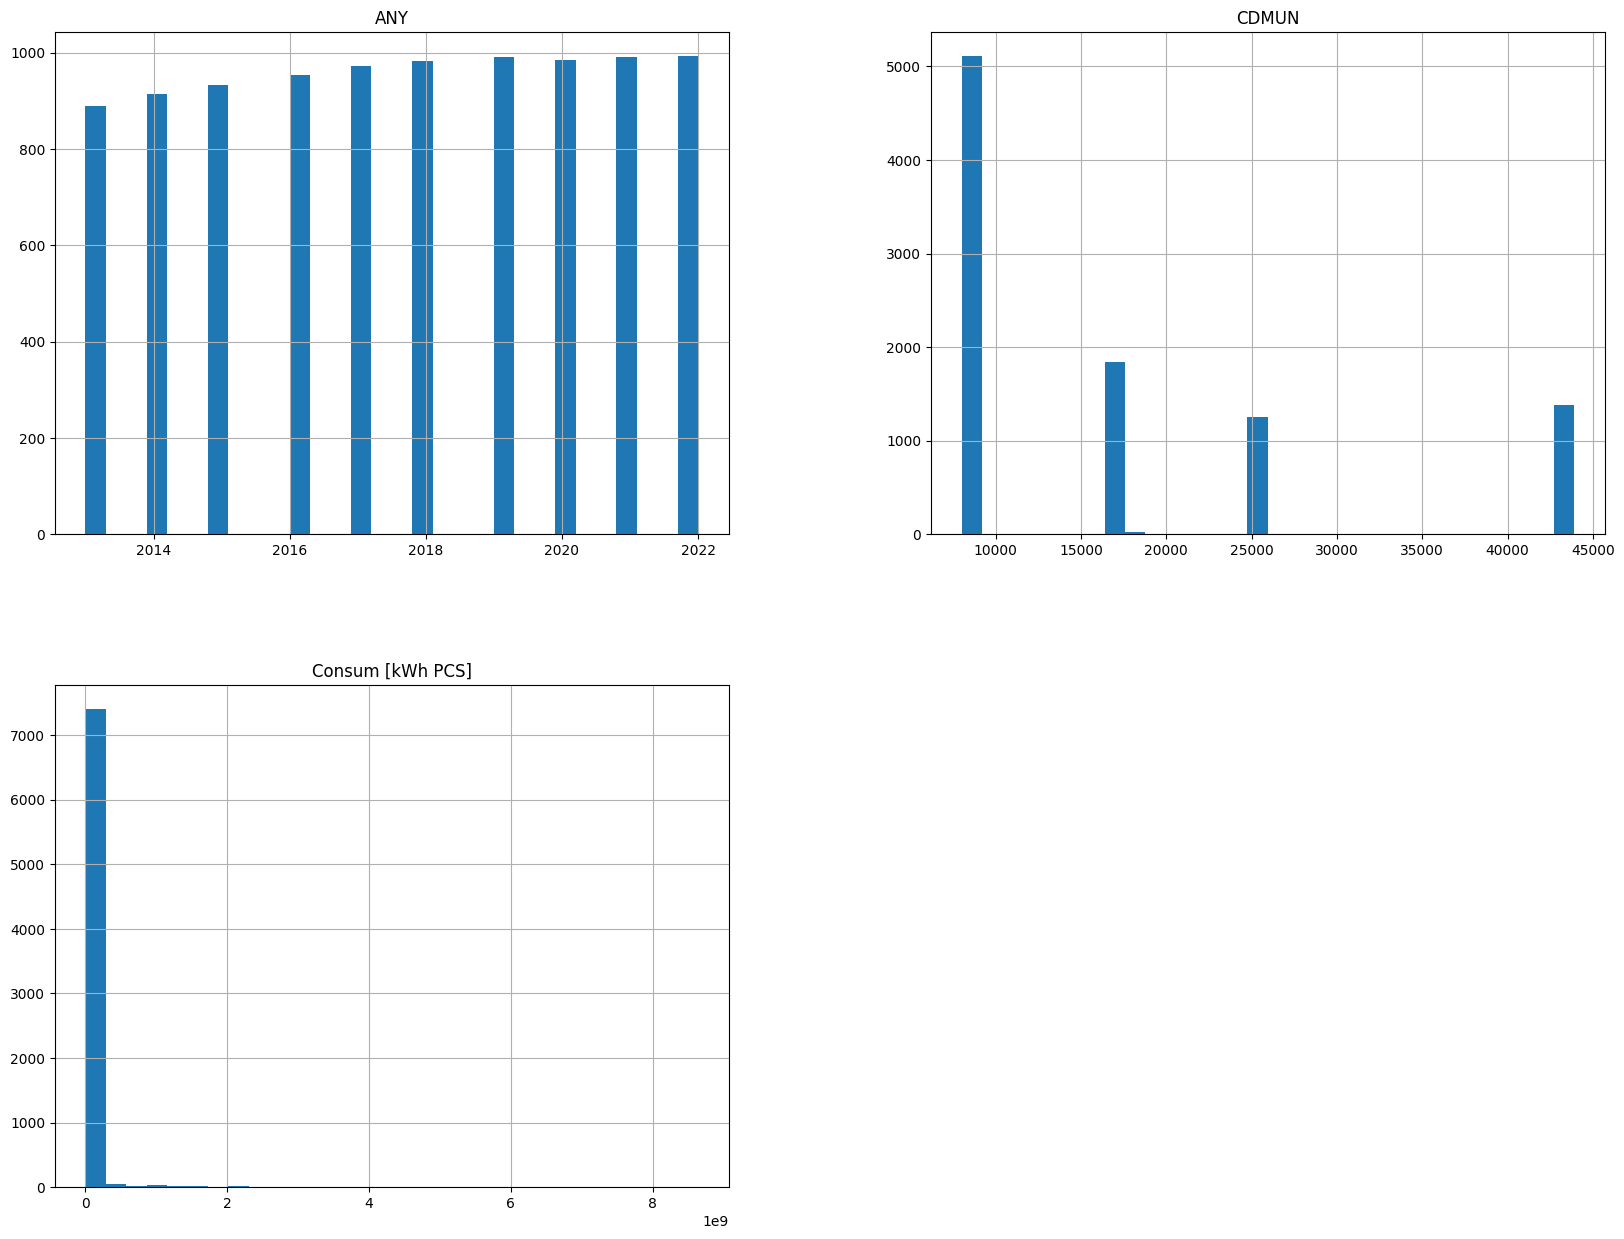

In [62]:
# Histograma
gas_num.hist(bins=30, figsize=(20, 15))
plt.show()

Boxplot

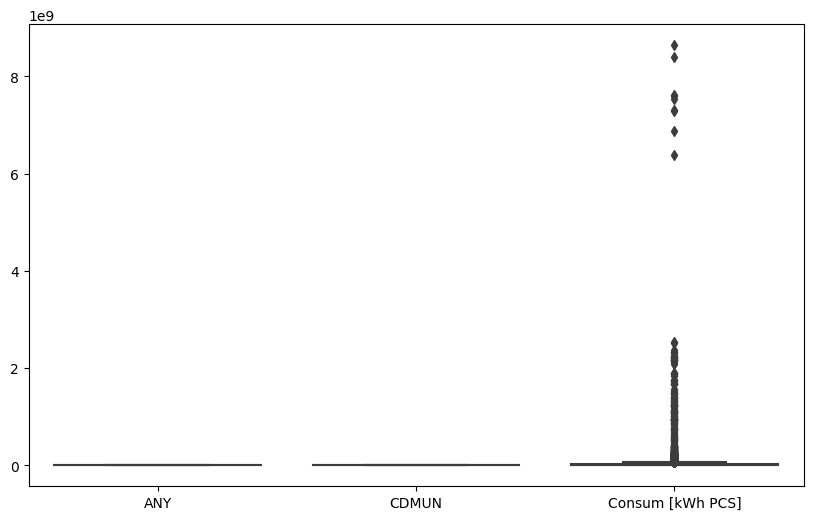

In [63]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=gas_num)
plt.show()

Correlaciones

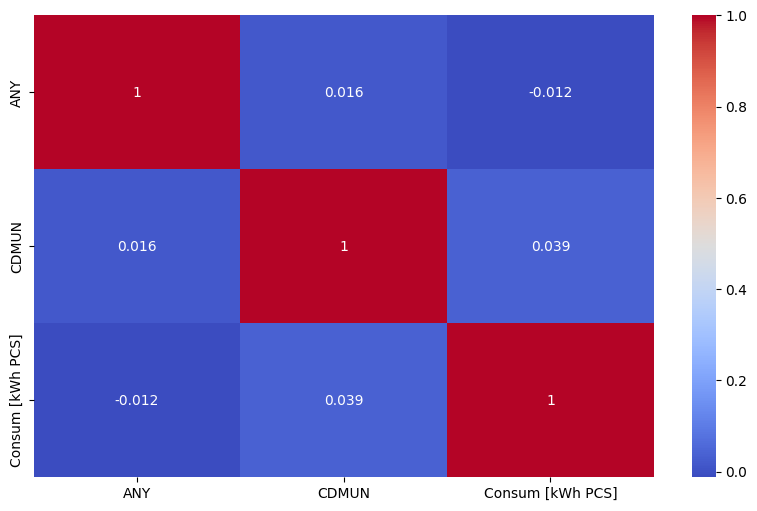

In [64]:
plt.figure(figsize=(10, 6))
sns.heatmap(gas_num.corr(), annot=True, cmap='coolwarm')
plt.show()

In [65]:
correlación_pearson = gas_num.corr(method='pearson')
correlación_spearman = gas_num.corr(method='spearman')
print(correlación_pearson)
print(correlación_spearman)

                       ANY     CDMUN  Consum [kWh PCS]
ANY               1.000000  0.016032         -0.012078
CDMUN             0.016032  1.000000          0.039291
Consum [kWh PCS] -0.012078  0.039291          1.000000
                       ANY     CDMUN  Consum [kWh PCS]
ANY               1.000000  0.015768         -0.011309
CDMUN             0.015768  1.000000         -0.244673
Consum [kWh PCS] -0.011309 -0.244673          1.000000


Anova

In [66]:
gas_num.columns

Index(['ANY', 'CDMUN', 'Consum [kWh PCS]'], dtype='object')

In [67]:
gas_num = gas_num.rename(columns={'Consum [kWh PCS]': 'Consumo'})
formula = 'Consumo ~ CDMUN + ANY'

# Ajustar el modelo usando OLS (Ordinary Least Squares)
model = ols(formula, data=gas_num).fit()

# Realizar el ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                sum_sq      df          F    PR(>F)
CDMUN     1.138112e+18     1.0  11.761767  0.000608
ANY       1.140251e+17     1.0   1.178387  0.277719
Residual  7.313401e+20  7558.0        NaN       NaN


## 1.6 Dataset Consumo Energia por Municipio

In [68]:
consumo_energia.head()

Any  Provincia         Comarca  CDMUN Municipi  Codi_Sector  \
0  2013  BARCELONA  BAIX LLOBREGAT   8001   ABRERA            1   
1  2013  BARCELONA  BAIX LLOBREGAT   8001   ABRERA            3   
2  2013  BARCELONA  BAIX LLOBREGAT   8001   ABRERA            4   
3  2013  BARCELONA  BAIX LLOBREGAT   8001   ABRERA            5   
4  2013  BARCELONA  BAIX LLOBREGAT   8001   ABRERA            6   

               Descripcio_Sector  Consum [kWh]  \
0                        PRIMARI      237755.0   
1                     INDUSTRIAL    66604371.0   
2  CONSTRUCCIO I OBRES PUBLIQUES      710769.0   
3                      TRANSPORT           NaN   
4                       TERCIARI   100629015.0   

                         Observacions  
0                                 NaN  
1                                 NaN  
2                                 NaN  
3  Dada subjecta a secret estadístic.  
4                                 NaN

In [69]:
consumo_energia.describe()

Any         CDMUN   Codi_Sector  Consum [kWh]
count  45079.000000  45079.000000  45079.000000  3.692300e+04
mean    2017.508840  20971.731139      4.297256  1.067083e+07
std        2.878048  12582.828731      2.147211  8.368524e+07
min     2013.000000   8001.000000      1.000000  4.500000e+01
25%     2015.000000   8231.000000      3.000000  1.348640e+05
50%     2018.000000  17162.000000      4.000000  5.894400e+05
75%     2020.000000  25205.000000      6.000000  3.389954e+06
max     2022.000000  43907.000000      7.000000  3.985953e+09

In [70]:
len(consumo_energia)

45079

##### 1.6.2 Análisis estadístico

In [71]:
ene_num = consumo_energia.select_dtypes(include=['float64', 'int64'])

Asimetria

In [72]:
# Asimetría y curtosis
asimetría = ene_num.skew()
curtosis = ene_num.kurt()
print(asimetría)
print(curtosis)

Any             -0.004753
CDMUN            0.699078
Codi_Sector     -0.224808
Consum [kWh]    30.905327
dtype: float64
Any               -1.229319
CDMUN             -0.770277
Codi_Sector       -1.278096
Consum [kWh]    1222.616756
dtype: float64


Histograma

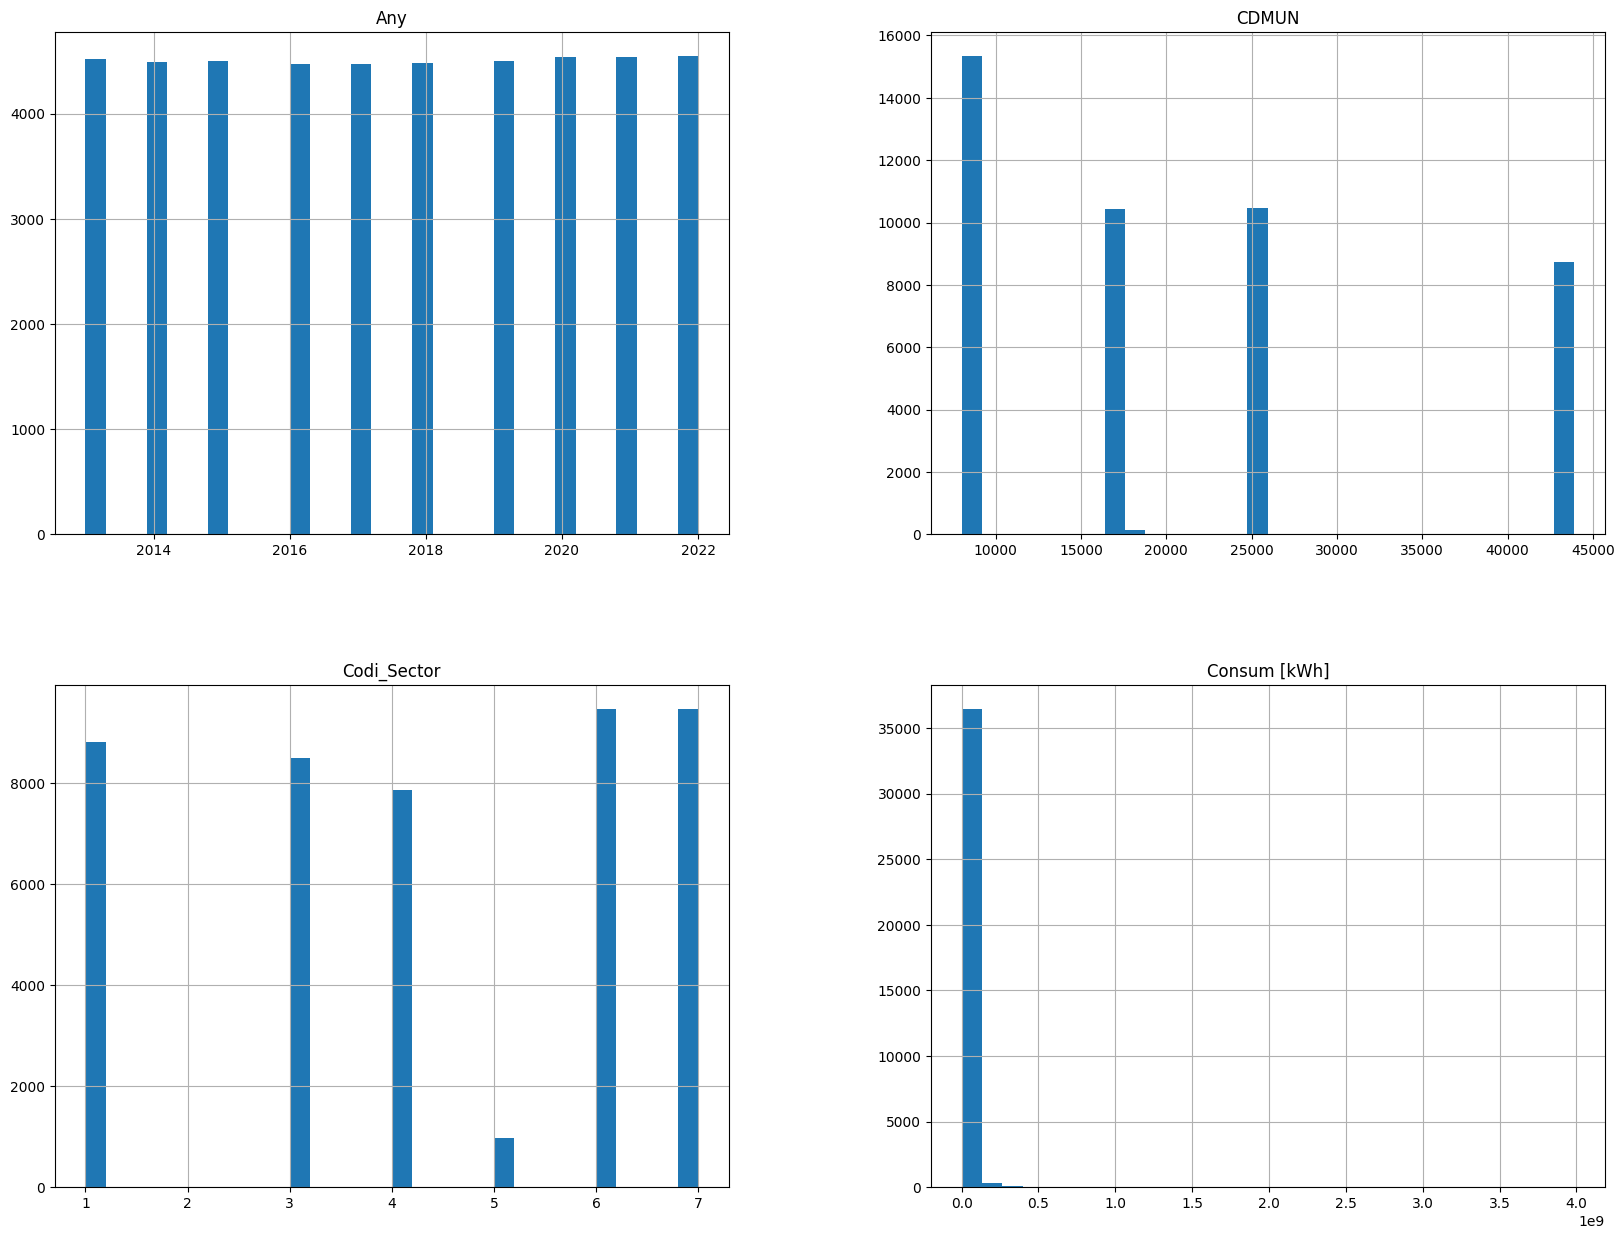

In [73]:
# Histograma
ene_num.hist(bins=30, figsize=(20, 15))
plt.show()

Boxplot

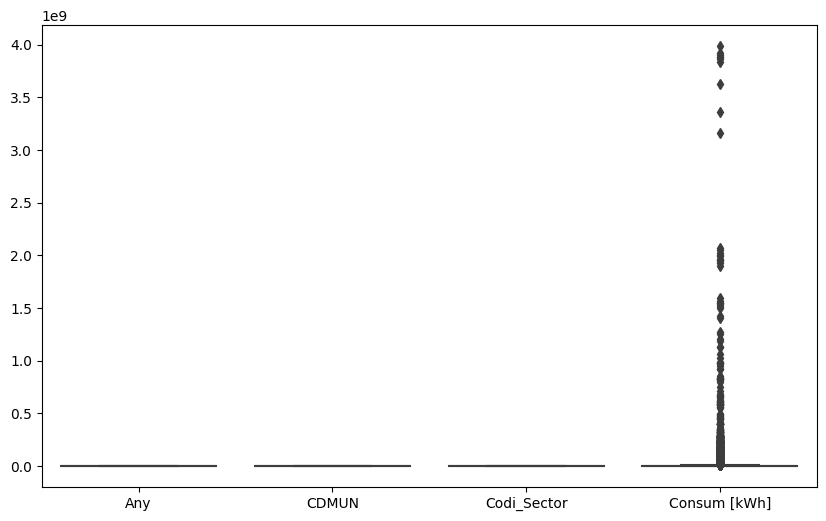

In [74]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=ene_num)
plt.show()

Correlaciones

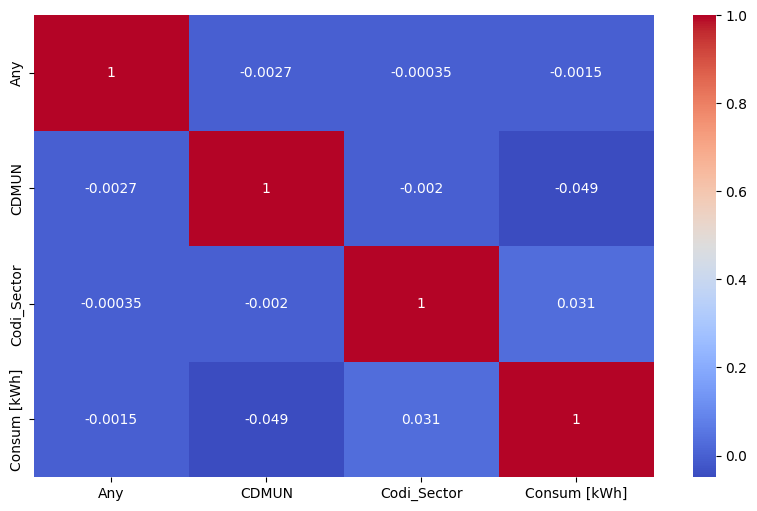

In [75]:
plt.figure(figsize=(10, 6))
sns.heatmap(ene_num.corr(), annot=True, cmap='coolwarm')
plt.show()

In [76]:
correlación_pearson = ene_num.corr(method='pearson')
correlación_spearman = ene_num.corr(method='spearman')
print(correlación_pearson)
print(correlación_spearman)

                   Any     CDMUN  Codi_Sector  Consum [kWh]
Any           1.000000 -0.002680    -0.000350     -0.001527
CDMUN        -0.002680  1.000000    -0.002018     -0.048959
Codi_Sector  -0.000350 -0.002018     1.000000      0.030887
Consum [kWh] -0.001527 -0.048959     0.030887      1.000000
                   Any     CDMUN  Codi_Sector  Consum [kWh]
Any           1.000000 -0.002667    -0.000701      0.010571
CDMUN        -0.002667  1.000000    -0.000228     -0.129179
Codi_Sector  -0.000701 -0.000228     1.000000      0.429213
Consum [kWh]  0.010571 -0.129179     0.429213      1.000000


Anova

In [77]:
ene_num = ene_num.rename(columns={'Consum [kWh]': 'Consumo'})
formula = 'Consumo ~ CDMUN + Any + Codi_Sector'

# Ajustar el modelo usando OLS (Ordinary Least Squares)
model = ols(formula, data=ene_num).fit()

# Realizar el ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                   sum_sq       df          F        PR(>F)
CDMUN        6.250089e+17      1.0  89.540750  3.175008e-21
Any          6.101369e+14      1.0   0.087410  7.674975e-01
Codi_Sector  2.519040e+17      1.0  36.088563  1.903112e-09
Residual     2.577006e+20  36919.0        NaN           NaN


## 1.7 Dataset talleres de vehiculos por código postal

In [78]:
talleres_cp.head()

Número de RASIC Data alta titular actual  \
0  RASIC-TRA-000300017               05/06/2006   
1  RASIC-TRA-000300018               05/06/2006   
2  RASIC-TRA-000300042               07/06/2006   
3  RASIC-TRA-000300062               08/06/2006   
4  RASIC-TRA-000300067               09/06/2006   

  Tallers amb canvi de propietari           Nom titular actual  \
0                              No               SALA MOTORS SA   
1                              No        PNEUMATICS MORILLA SL   
2                              No               CICOVA 2005 SL   
3                              No  JOAN SAN JOSE AUTOMOBILS SL   
4                              No              STOP AND GO SCP   

  Número d'identificació del titular Estat Data de baixa activitat  \
0                          A58539735  Alta                     NaN   
1                          B25571126  Alta                     NaN   
2                          B63987879  Alta                     NaN   
3                          B62427588  Alta                     NaN   
4                          J63750020  Alta                     NaN   

                                     Adreça           Població  \
0                            Carretera N II             Lleida   
1                             Polígon Sores  Pont de Suert, el   
2                           Ronda Iberica 3                NaN   
3                         Polígon Las Comes           Igualada   
4  Gran Via de les Corts Catalanes núm. 717          Barcelona   

               Municipi  Codi municipi Codi postal         Comarca  \
0                Lleida         251207       25191          Segrià   
1      El Pont de Suert         251734       25520  Alta Ribagorça   
2  Vilanova i la Geltrú          83073       08800          Garraf   
3              Igualada          81022       08700           Anoia   
4             Barcelona          80193       08013      Barcelonès   

   Codi comarca  Província Email Web de l'establiment Carrosseria  \
0            33     Lleida   NaN                  NaN          No   
1             5     Lleida   NaN                  NaN          No   
2            17  Barcelona   NaN                  NaN          No   
3             6  Barcelona   NaN                  NaN          Sí   
4            13  Barcelona   NaN                  NaN          No   

  Electricitat Mecànica Pintura  Manipulacio Gas  \
0           Sí       Sí      No              NaN   
1           No       Sí      No              NaN   
2           Sí       Sí      No              NaN   
3           Sí       Sí      No              NaN   
4           No       No      No              NaN   

  Especialitat Motos i Ciclomotors Especialitat Reparació Pneumàtics  \
0                               No                                No   
1                               No                                Sí   
2                               No                                No   
3                               No                                Sí   
4                               Sí                                Sí   

  Especialitat radiadors Especialitat equips d'injecció  
0                     No                             No  
1                     No                             No  
2                     No                             No  
3                     No                             No  
4                     No                             No

In [79]:
talleres_cp.describe()

Codi municipi  Codi comarca  Manipulacio Gas
count   14026.000000  14026.000000              0.0
mean   159244.785684     21.164052              NaN
std    124326.729252     12.570445              NaN
min     80018.000000      1.000000              NaN
25%     80961.000000     11.000000              NaN
50%     82114.000000     17.000000              NaN
75%    172266.000000     34.000000              NaN
max    439076.000000     42.000000              NaN

In [80]:
talleres_cp.columns

Index(['Número de RASIC', 'Data alta titular actual',
       'Tallers amb canvi de propietari', 'Nom titular actual',
       'Número d'identificació del titular', 'Estat',
       'Data de baixa activitat', 'Adreça', 'Població', 'Municipi',
       'Codi municipi', 'Codi postal', 'Comarca', 'Codi comarca', 'Província',
       'Email', 'Web de l'establiment', 'Carrosseria', 'Electricitat',
       'Mecànica', 'Pintura', 'Manipulacio Gas',
       'Especialitat Motos i Ciclomotors', 'Especialitat Reparació Pneumàtics',
       'Especialitat radiadors', 'Especialitat equips d'injecció'],
      dtype='object')

In [81]:
talleres_cp["Email"].unique()

array([nan, 'adiaz@salateam.com', 'mrautomocio@yahoo.es', ...,
       'vidalservisl@fenarnet.com', 'andrea@cambrescat.es',
       'autosauret@confortauto.com'], dtype=object)

In [82]:
talleres_cp["Web de l'establiment"].unique()

array([nan, 'adiaz@salateam.com', 'mrautomocio@yahoo.es', ...,
       'vidalservisl@fenarnet.com', 'andrea@cambrescat.es',
       'autosauret@confortauto.com'], dtype=object)

In [83]:
talleres_cp["Manipulacio Gas"].unique()

array([nan])

In [84]:
len(talleres_cp)

14026

In [85]:
talleres_cp["Codi postal"]

0        25191
1        25520
2        08800
3        08700
4        08013
         ...  
14021    43850
14022    43470
14023    43206
14024    43006
14025    43720
Name: Codi postal, Length: 14026, dtype: object

##### 1.7.2 Análisis estadístico

In [86]:
tal_num = talleres_cp.select_dtypes(include=['float64', 'int64'])

In [87]:
tal_num.describe()

Codi municipi  Codi comarca  Manipulacio Gas
count   14026.000000  14026.000000              0.0
mean   159244.785684     21.164052              NaN
std    124326.729252     12.570445              NaN
min     80018.000000      1.000000              NaN
25%     80961.000000     11.000000              NaN
50%     82114.000000     17.000000              NaN
75%    172266.000000     34.000000              NaN
max    439076.000000     42.000000              NaN

Asimetria

In [88]:
# Asimetría y curtosis
asimetría = tal_num.skew()
curtosis = tal_num.kurt()
print(asimetría)
print(curtosis)

Codi municipi      1.396831
Codi comarca       0.376861
Manipulacio Gas         NaN
dtype: float64
Codi municipi      0.445588
Codi comarca      -1.303518
Manipulacio Gas         NaN
dtype: float64


Histograma

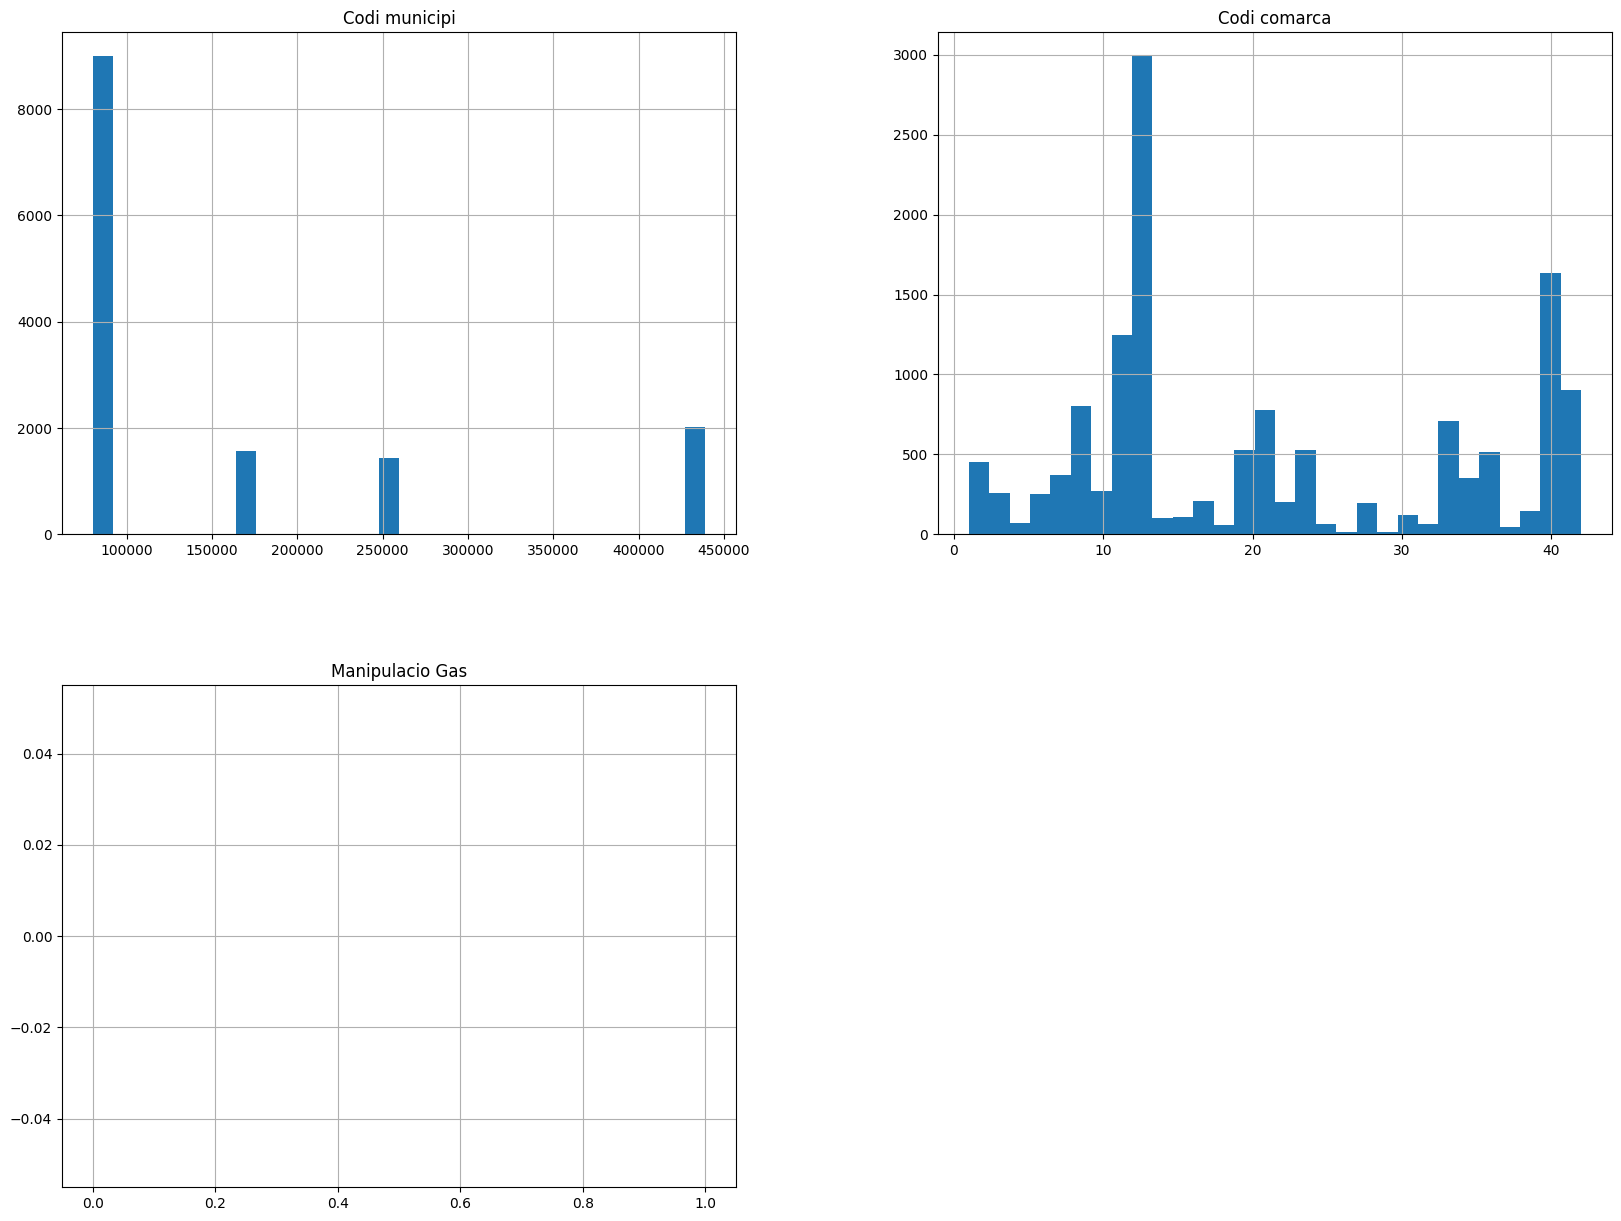

In [89]:
# Histograma
tal_num.hist(bins=30, figsize=(20, 15))
plt.show()

Boxplot

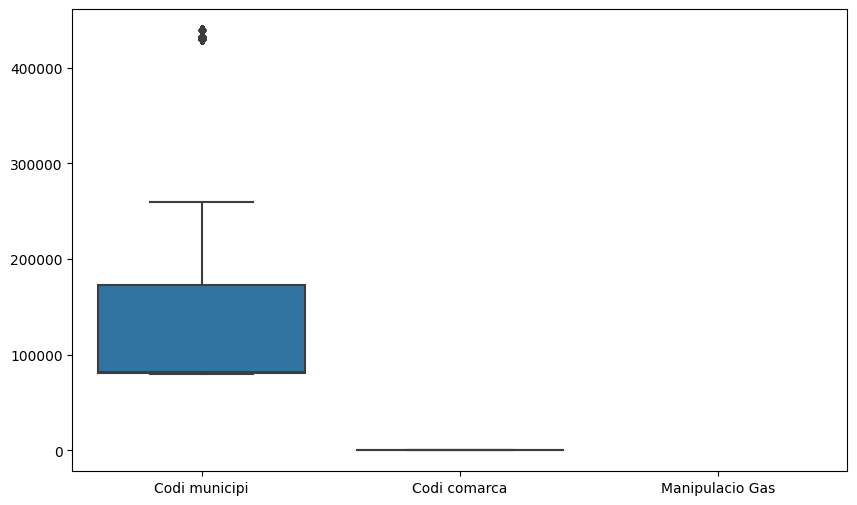

In [90]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=tal_num)
plt.show()

Correlaciones

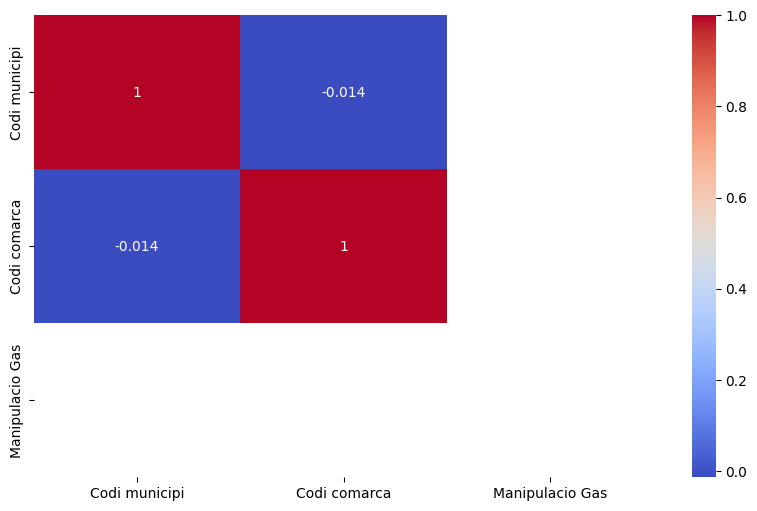

In [91]:
plt.figure(figsize=(10, 6))
sns.heatmap(tal_num.corr(), annot=True, cmap='coolwarm')
plt.show()

In [92]:
correlación_pearson = tal_num.corr(method='pearson')
correlación_spearman = tal_num.corr(method='spearman')
print(correlación_pearson)
print(correlación_spearman)

                 Codi municipi  Codi comarca  Manipulacio Gas
Codi municipi         1.000000     -0.013879              NaN
Codi comarca         -0.013879      1.000000              NaN
Manipulacio Gas            NaN           NaN              NaN
                 Codi municipi  Codi comarca  Manipulacio Gas
Codi municipi          1.00000       0.04848              NaN
Codi comarca           0.04848       1.00000              NaN
Manipulacio Gas            NaN           NaN              NaN


Anova

In [93]:
tal_num = tal_num.rename(columns={'Codi municipi': 'municipi'})
tal_num = tal_num.rename(columns={'Codi comarca': 'comarca'})
tal_num = tal_num.rename(columns={'Manipulacio Gas': 'gas'})
formula = 'municipi ~ comarca'

# Ajustar el modelo usando OLS (Ordinary Least Squares)
model = ols(formula, data=tal_num).fit()

# Realizar el ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                sum_sq       df         F    PR(>F)
comarca   4.176174e+10      1.0  2.702106  0.100238
Residual  2.167446e+14  14024.0       NaN       NaN


## 1.8 Dataset Entidades Deportivas por código postal

In [94]:
entitats_esportives_cp.head()

NÚM_REGISTRE                                    NOM_ENTITAT  \
0        19227               CLUB ESPORTIU VINCLES LA GARRIGA   
1        19226                  CLUB ESCACS RIUDOMS MINDGAMES   
2        04353                           FUTBOL CLUB PERAFORT   
3        17886              ASSOCIACIO ESPORTIVA XAVI ESTRADA   
4        09649  CLUB ESPORTIU VELA ADAPTADA CATALUNYA (CEVAC)   

                                    ADREÇA     CP     MUNICIPI  \
0                       c/ Consell, núm. 9  08530  Garriga, la   
1  Carretera de Riudoms a Cambrils, núm.21  43330      Riudoms   
2                                  Nou, 51  43152     Perafort   
3                     Onze de setembre, 32  25199       Lleida   
4       TRAVESSERA DE GRACIA,334  ATIC  2º  08025    Barcelona   

           COMARCA     TELÈFON_FAX             CORREU_ELECTRÒNIC  \
0  Vallès Oriental     635801209 /         laiariera82@gmail.com   
1        Baix Camp     693725752 /      escacs.riudoms@gmail.com   
2       Tarragonès  660 13 59 50 /  futbolclubperafort@gmail.com   
3           Segrià     629080826 /          x.estrada@icloud.com   
4       Barcelonès    93-3481673 /                           NaN   

                     TIPUS_ENTITAT                MODALITATS  
0  Clubs i Associacions Esportives                   Triatló  
1  Clubs i Associacions Esportives                    Escacs  
2  Clubs i Associacions Esportives                    Futbol  
3  Clubs i Associacions Esportives                    Futbol  
4  Clubs i Associacions Esportives  Vela Discapacitat Física

In [95]:
entitats_esportives_cp.describe()

NÚM_REGISTRE           NOM_ENTITAT    ADREÇA     CP   MUNICIPI  \
count         20679                 20679     20679  20671      20679   
unique        20679                 20673     19069   1071        903   
top           19866  CASINO DE LA GARRIGA  Major, 1  08800  Barcelona   
freq              1                     2        36    169       2839   

           COMARCA TELÈFON_FAX           CORREU_ELECTRÒNIC  \
count        20679       20679                        8913   
unique          54       16885                        8790   
top     Barcelonès           /  ramonmayenchcots@gmail.com   
freq          4015        3281                          11   

                          TIPUS_ENTITAT MODALITATS  
count                             20679      20674  
unique                               32       4491  
top     Clubs i Associacions Esportives     Futbol  
freq                              17718       2374

In [96]:
entitats_esportives_cp.columns

Index(['NÚM_REGISTRE', 'NOM_ENTITAT', 'ADREÇA', 'CP', 'MUNICIPI', 'COMARCA',
       'TELÈFON_FAX', 'CORREU_ELECTRÒNIC', 'TIPUS_ENTITAT', 'MODALITATS'],
      dtype='object')

In [97]:
entitats_esportives_cp["CP"]

0        08530
1        43330
2        43152
3        25199
4        08025
         ...  
20674    25500
20675    17172
20676    17246
20677    08700
20678    08395
Name: CP, Length: 20679, dtype: object

In [98]:
len(entitats_esportives_cp)

20679

In [99]:
entitats_esportives_cp.dtypes

NÚM_REGISTRE         object
NOM_ENTITAT          object
ADREÇA               object
CP                   object
MUNICIPI             object
COMARCA              object
TELÈFON_FAX          object
CORREU_ELECTRÒNIC    object
TIPUS_ENTITAT        object
MODALITATS           object
dtype: object

In [100]:
entitats_esportives_cp['NÚM_REGISTRE'] = pd.to_numeric(entitats_esportives_cp['NÚM_REGISTRE'], errors='coerce')
entitats_esportives_cp['CP'] = pd.to_numeric(entitats_esportives_cp['CP'], errors='coerce')

##### 1.8.2 Análisis estadístico

In [101]:
ed_num = entitats_esportives_cp.select_dtypes(include=['float64', 'int64'])

In [102]:
ed_num.describe()

NÚM_REGISTRE            CP
count  18572.000000  20657.000000
mean   10086.541891  16357.727986
std     5733.882026  12266.395015
min        1.000000    812.000000
25%     5118.750000   8241.000000
50%    10121.500000   8812.000000
75%    15074.250000  17867.000000
max    19872.000000  97272.000000

Asimetria

In [103]:
# Asimetría y curtosis
asimetría = ed_num.skew()
curtosis = ed_num.kurt()
print(asimetría)
print(curtosis)

NÚM_REGISTRE   -0.019825
CP              1.393485
dtype: float64
NÚM_REGISTRE   -1.200833
CP              0.567991
dtype: float64


Histograma

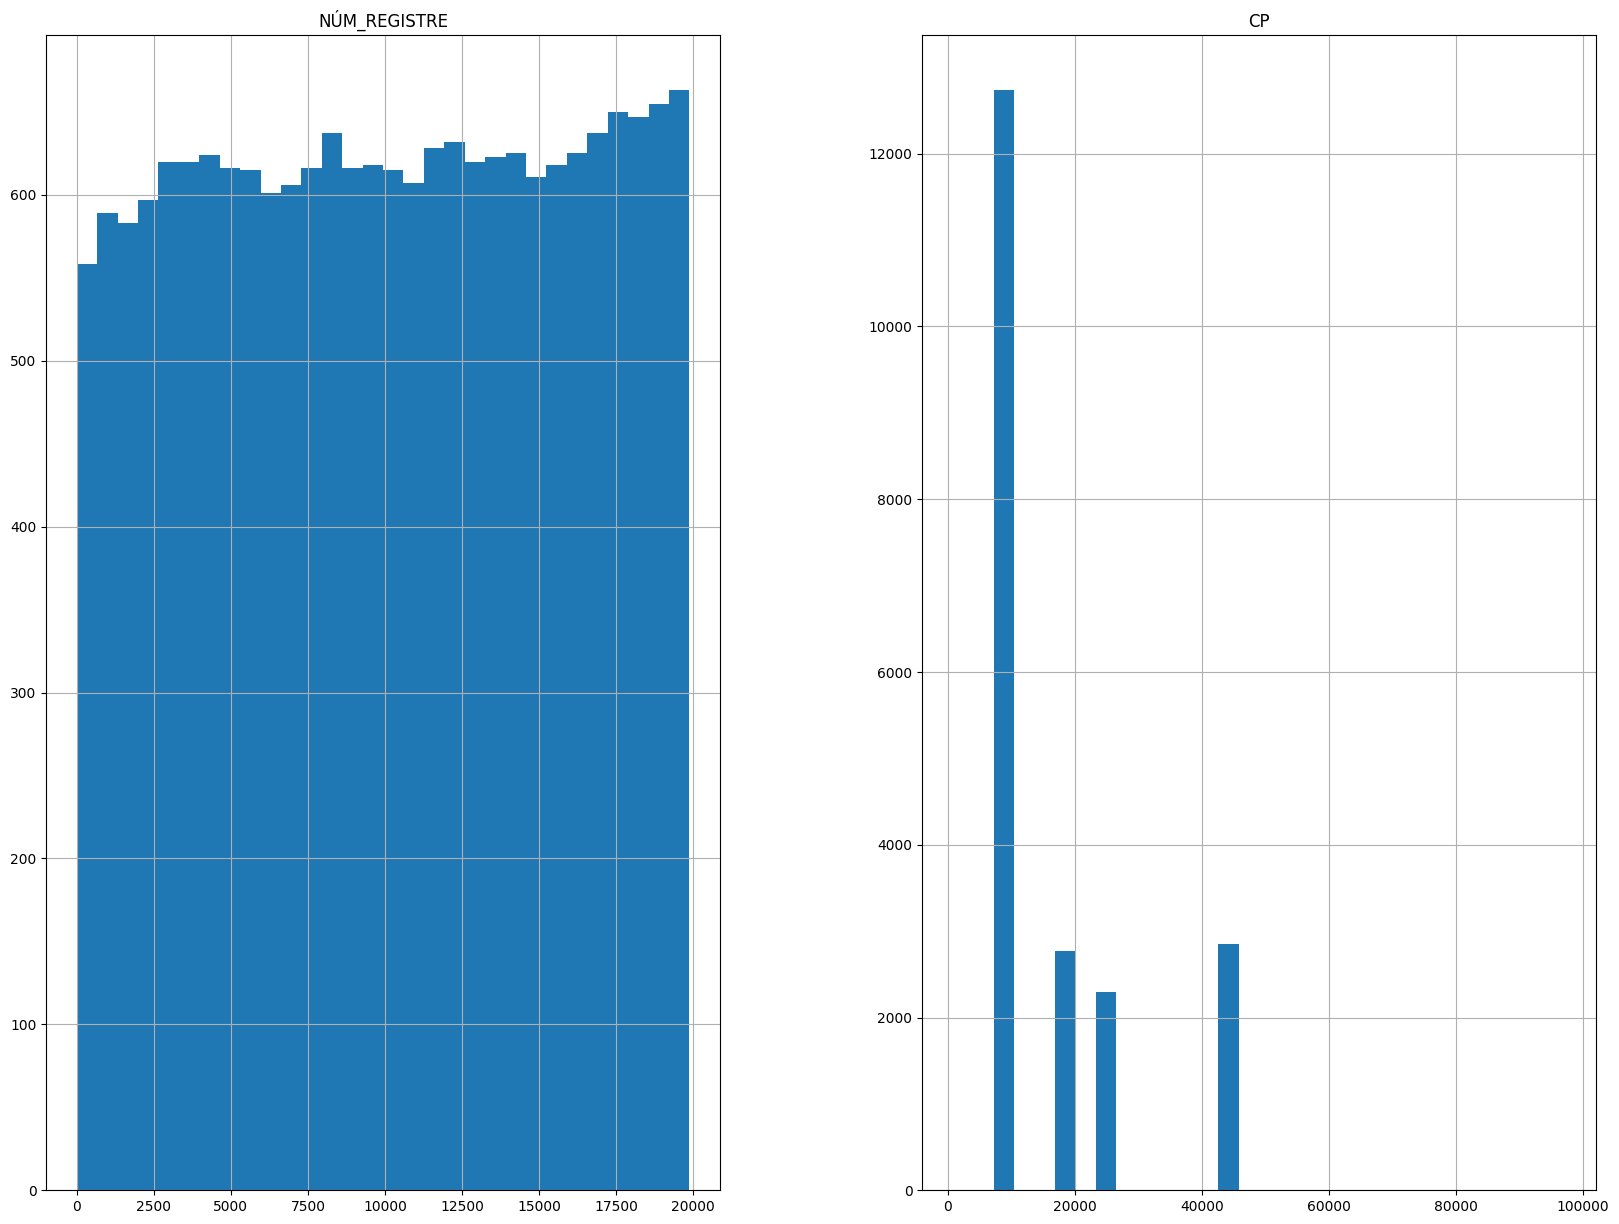

In [104]:
# Histograma
ed_num.hist(bins=30, figsize=(20, 15))
plt.show()

Boxplot

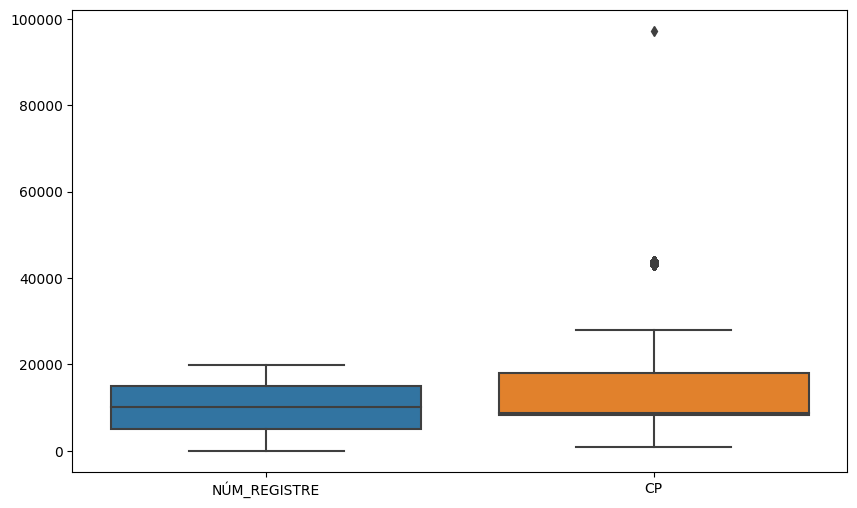

In [105]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=ed_num)
plt.show()

Correlaciones

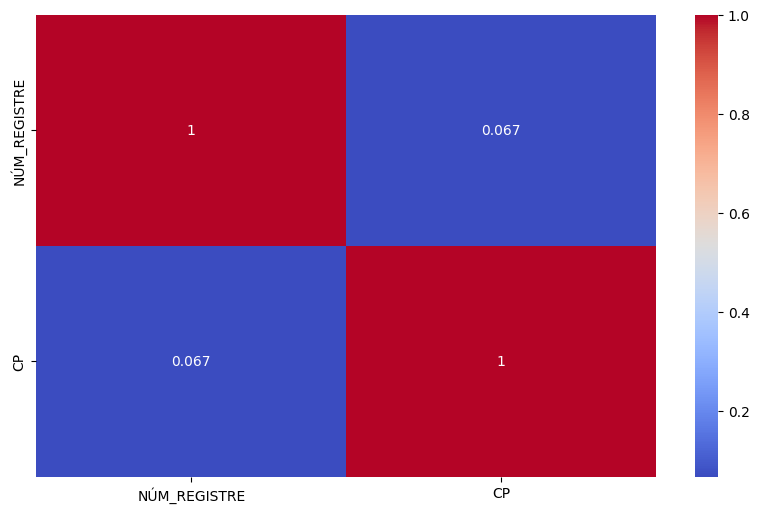

In [106]:
plt.figure(figsize=(10, 6))
sns.heatmap(ed_num.corr(), annot=True, cmap='coolwarm')
plt.show()

In [107]:
correlación_pearson = ed_num.corr(method='pearson')
correlación_spearman = ed_num.corr(method='spearman')
print(correlación_pearson)
print(correlación_spearman)

              NÚM_REGISTRE        CP
NÚM_REGISTRE      1.000000  0.066622
CP                0.066622  1.000000
              NÚM_REGISTRE        CP
NÚM_REGISTRE      1.000000  0.082828
CP                0.082828  1.000000


Anova

In [108]:
#tal_num = tal_num.rename(columns={'Manipulacio Gas': 'gas'})
formula = 'NÚM_REGISTRE ~ CP'

# Ajustar el modelo usando OLS (Ordinary Least Squares)
model = ols(formula, data=ed_num).fit()

# Realizar el ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                sum_sq       df          F        PR(>F)
CP        2.703293e+09      1.0  82.696167  1.051289e-19
Residual  6.063568e+11  18549.0        NaN           NaN


## 1.9 Dataset Centros Sanitarios por Código Postal

In [109]:
sanitarios_cp.head()

Número registre              Nom establiment Codi tipus establiment  \
0       R25000226                        MALDA                      R   
1       A08556020              ORTOPEDIA COLÓN                      A   
2       V43544970                 ÒPTICA SALAS                      V   
3       F17002470  TABERNER MUNDET, M. LOURDES                      F   
4       V43554714                HERRERO ÒPTIC                      V   

  Tipus establiment Codi establiment pare                   Titular  \
0        Farmaciola             F25004421                       NaN   
1      Audiopròtesi                   NaN     Joan Vivas Ballabriga   
2            Òptica                   NaN        OPTICA SALAS, S.L.   
3          Farmàcia                   NaN  TABERNER MUNDET, LOURDES   
4            Òptica                   NaN                       NaN   

     Telèfon Codi tipus de via Tipus de via  Nom de la via Número de la via  \
0        NaN                CR       CARRER          JESUS               26   
1  607585831                AV     AVINGUDA         ROMANI               65   
2  977781306                CR       CARRER  JAUME MERCADE                1   
3  972511266                CR       CARRER  SANTA LLOGAIA            15-17   
4        NaN                CR       CARRER      CERVANTES                9   

   Quilòmetre Bloc Portal Escala  Pis Porta  Codi postal  Codi municipi  \
0         NaN  NaN    NaN    NaN  NaN   NaN        25266          25130   
1         NaN  NaN    NaN    NaN  NaN   NaN         8370           8035   
2         NaN  NaN    NaN    NaN  NaN   NaN        43800          43161   
3         NaN  NaN    NaN    NaN  NaN   NaN        17600          17066   
4         NaN  NaN    NaN    NaN   BX   NaN        43500          43155   

   Municipi Article municipi  Codi comarca      Comarca  Codi província  \
0     MALDÀ              NaN          38.0       URGELL              25   
1   CALELLA              NaN          21.0      MARESME               8   
2     VALLS              NaN           1.0     ALT CAMP              43   
3  FIGUERES              NaN           2.0  ALT EMPORDA              17   
4   TORTOSA              NaN           9.0    BAIX EBRE              43   

   Província  Codi ABS              ABS  Codi sector sanitari  \
0     LLEIDA      81.0         Bellpuig                6156.0   
1  BARCELONA      90.0          Calella                6462.0   
2  TARRAGONA     263.0       Valls urbà                6257.0   
3     GIRONA     119.0         Figueres                6461.0   
4  TARRAGONA     255.0  Tortosa - 1 Est                6360.0   

               Sector sanitari  Codi regió sanitària    Regió sanitària  \
0                       Lleida                  61.0             Lleida   
1                   Girona Sud                  64.0             Girona   
2  Alt Camp - Conca de Barberà                  62.0  Camp de Tarragona   
3                  Girona Nord                  64.0             Girona   
4             Terres de l'Ebre                  63.0   Terres de l'Ebre   

   Longitud    Latitud                     Georeferència  
0  1.039757  41.550738  POINT (1.039757013 41.550737554)  
1  2.657592  41.614257    POINT (2.657592148 41.6142565)  
2  1.251002  41.285821   POINT (1.251002448 41.28582096)  
3  2.960615  42.262723   POINT (2.96061544 42.262723368)  
4  0.523203  40.858553  POINT (0.523203157 40.858552925)

In [110]:
sanitarios_cp.describe()

Quilòmetre   Codi postal  Codi municipi  Codi comarca  Codi província  \
count    8.000000   5743.000000    5743.000000   5742.000000     5743.000000   
mean   111.125000  14011.822915   14026.920773     19.469349       13.924081   
std    223.551488  11347.869742   11288.399960     11.702089       11.305369   
min      4.000000      0.000000    8001.000000      1.000000        8.000000   
25%      5.000000   8032.000000    8019.000000     13.000000        8.000000   
50%     11.500000   8490.000000    8167.000000     13.000000        8.000000   
75%     65.500000  17195.000000   17066.000000     30.000000       17.000000   
max    644.000000  43897.000000   43907.000000     42.000000       81.000000   

          Codi ABS  Codi sector sanitari  Codi regió sanitària     Longitud  \
count  5733.000000           5733.000000           5733.000000  5673.000000   
mean    177.277167           7165.996686             71.124891     2.000308   
std     120.265559           1299.225738             12.934875     0.562981   
min       0.000000              0.000000              0.000000     0.251100   
25%      65.000000           6462.000000             64.000000     1.895007   
50%     168.000000           7844.000000             78.000000     2.141727   
75%     279.000000           7853.000000             78.000000     2.206590   
max     406.000000           7867.000000             78.000000     3.277838   

           Latitud  
count  5673.000000  
mean     41.512756  
std       0.292254  
min      40.542175  
25%      41.380023  
50%      41.437790  
75%      41.612930  
max      42.811201

In [111]:
sanitarios_cp.columns

Index(['Número registre', 'Nom establiment', 'Codi tipus establiment',
       'Tipus establiment', 'Codi establiment pare', 'Titular', 'Telèfon',
       'Codi tipus de via', 'Tipus de via', 'Nom de la via',
       'Número de la via', 'Quilòmetre', 'Bloc', 'Portal', 'Escala', 'Pis',
       'Porta', 'Codi postal', 'Codi municipi', 'Municipi', 'Article municipi',
       'Codi comarca', 'Comarca', 'Codi província', 'Província', 'Codi ABS',
       'ABS', 'Codi sector sanitari', 'Sector sanitari',
       'Codi regió sanitària', 'Regió sanitària', 'Longitud', 'Latitud',
       'Georeferència'],
      dtype='object')

In [112]:
print(sanitarios_cp["Quilòmetre"].unique())
print(sanitarios_cp["Bloc"].unique())
print(sanitarios_cp["Portal"].unique())
print(sanitarios_cp["Escala"].unique())
print(sanitarios_cp["Pis"].unique())
print(sanitarios_cp["Porta"].unique())
print(sanitarios_cp["Article municipi"].unique())

[ nan 181.  17.   4.   5. 644.   6.  27.]
[nan '1' '15' 'A' 'IV' '24' 'G' 'E' '49' 'B' 'A3' '9' 'L8' 'LA' 'L2' '4'
 'C']
[nan 'L' 'BX' '20' '3' '6' 'B' '1' '5' 'LC' '8' '2' '10' 'D' 'C' '4B' 'B-'
 'o']
[nan 'D' 'B' 'A' '2D' '1' 'ES' 'DR' '5' '2' 'E' 'C']
[nan 'BX' '4T' 'BA' 'A' 'PR' '1R' 'EN' '3r' 'B' 'LC' '11' '1' '15' '4t'
 '2A' '8' '1r' 'T' '7A' 'PL' 'R' 'PB' '4R' 'AT' 'N' '1A' 'bx' '2N' 'Bx'
 'A,' '2n']
[nan 'A' '2' 'B' '35' '1' '2A' '04' '4a' '3' '6' '2N' 'T' '1A' '1.' 'L5'
 '5' '3a' '1a' '52' 'E' '4' '2a' '7' '2ª' '11' 'L' '5a' '4B' '32' 'I' '8'
 '6A' '10' '27' '76' '3A' '4A']
[nan "L'"]


In [113]:
sanitarios_cp["Codi postal"]

0       25266
1        8370
2       43800
3       17600
4       43500
        ...  
5738     8001
5739     8024
5740     8006
5741    17121
5742    43560
Name: Codi postal, Length: 5743, dtype: int64

In [114]:
len(sanitarios_cp)

5743

In [115]:
sanitarios_cp.dtypes

Número registre            object
Nom establiment            object
Codi tipus establiment     object
Tipus establiment          object
Codi establiment pare      object
Titular                    object
Telèfon                    object
Codi tipus de via          object
Tipus de via               object
Nom de la via              object
Número de la via           object
Quilòmetre                float64
Bloc                       object
Portal                     object
Escala                     object
Pis                        object
Porta                      object
Codi postal                 int64
Codi municipi               int64
Municipi                   object
Article municipi           object
Codi comarca              float64
Comarca                    object
Codi província              int64
Província                  object
Codi ABS                  float64
ABS                        object
Codi sector sanitari      float64
Sector sanitari            object
Codi regió san

##### 1.9.2 Análisis estadístico

In [116]:
san_num = sanitarios_cp.select_dtypes(include=['float64', 'int64'])

Asimetria

In [117]:
# Asimetría y curtosis
asimetría = san_num.skew()
curtosis = san_num.kurt()
print(asimetría)
print(curtosis)

Quilòmetre              2.479714
Codi postal             1.821301
Codi municipi           1.848107
Codi comarca            0.744447
Codi província          1.864018
Codi ABS                0.224520
Codi sector sanitari   -3.881745
Codi regió sanitària   -3.847130
Longitud               -0.907494
Latitud                 0.723705
dtype: float64
Quilòmetre               6.259490
Codi postal              2.030661
Codi municipi            1.989254
Codi comarca            -0.831620
Codi província           2.135177
Codi ABS                -1.194662
Codi sector sanitari    18.595652
Codi regió sanitària    18.336499
Longitud                 1.001367
Latitud                  1.960220
dtype: float64


Histograma

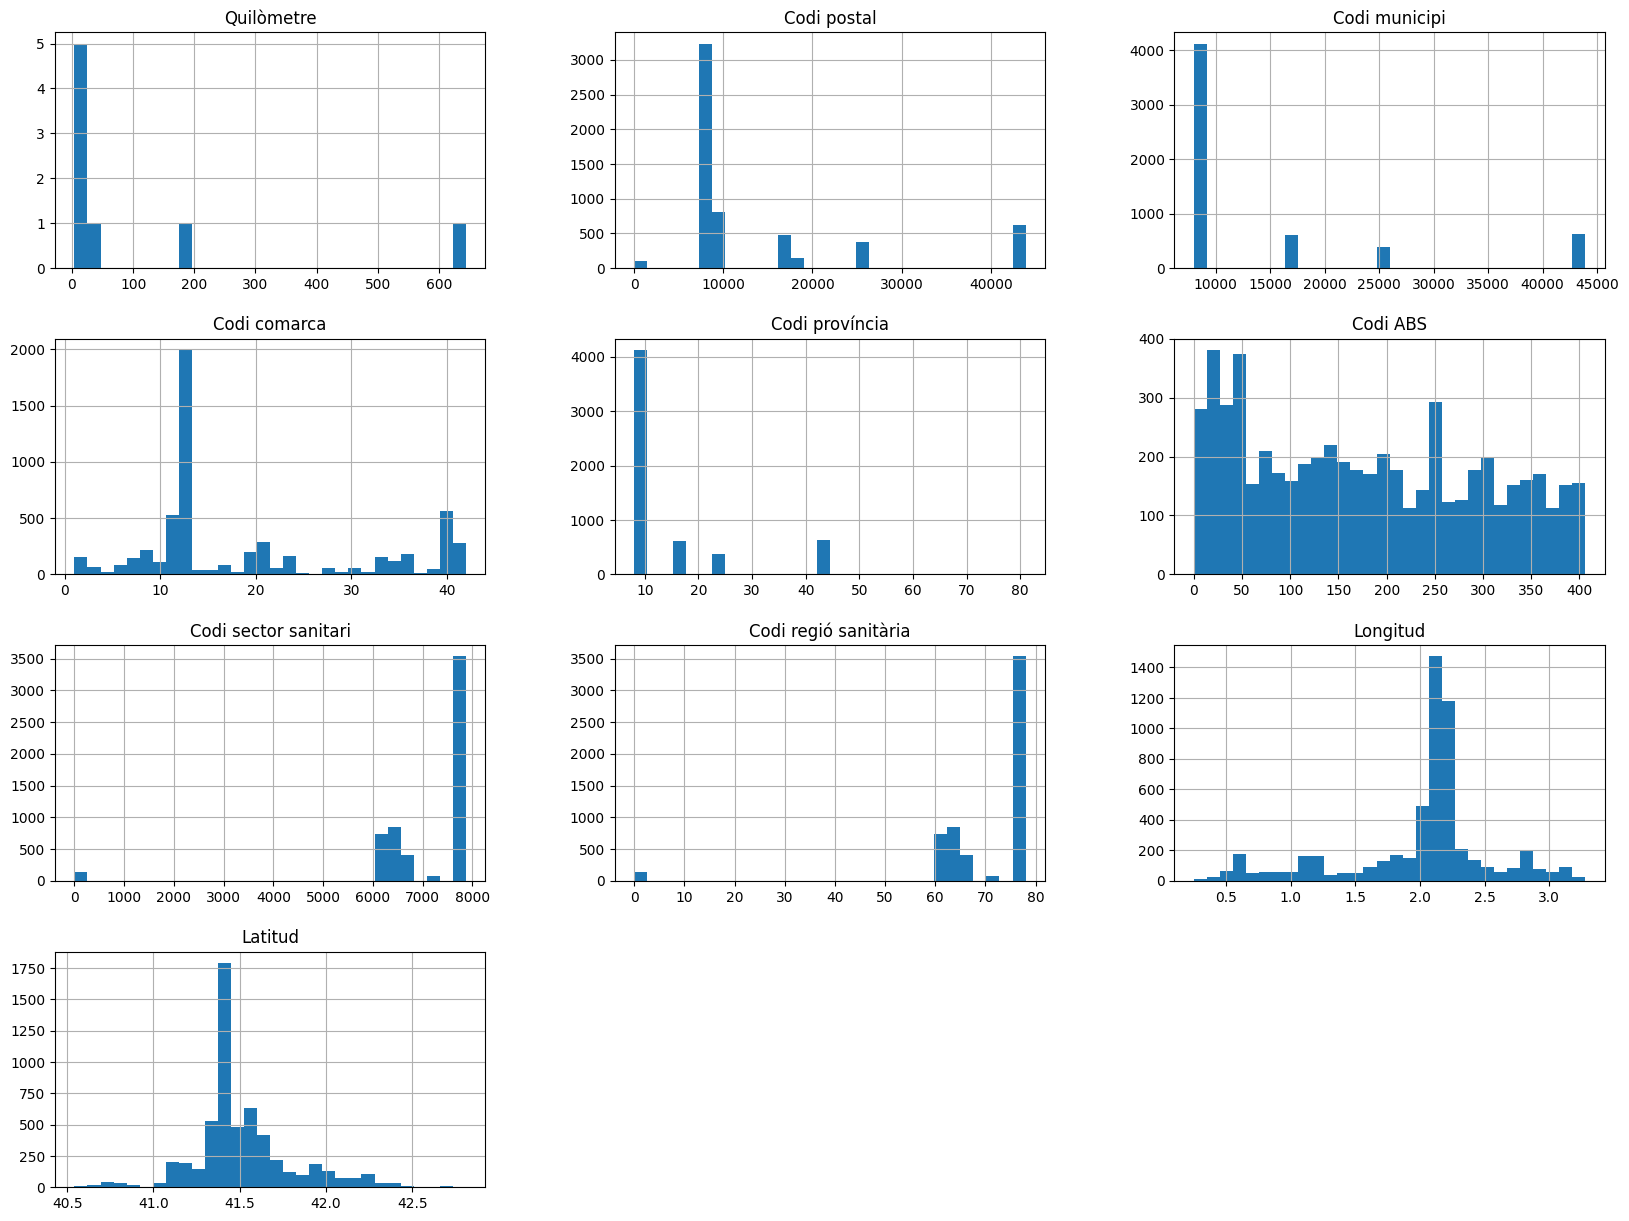

In [118]:
# Histograma
san_num.hist(bins=30, figsize=(20, 15))
plt.show()

Boxplot

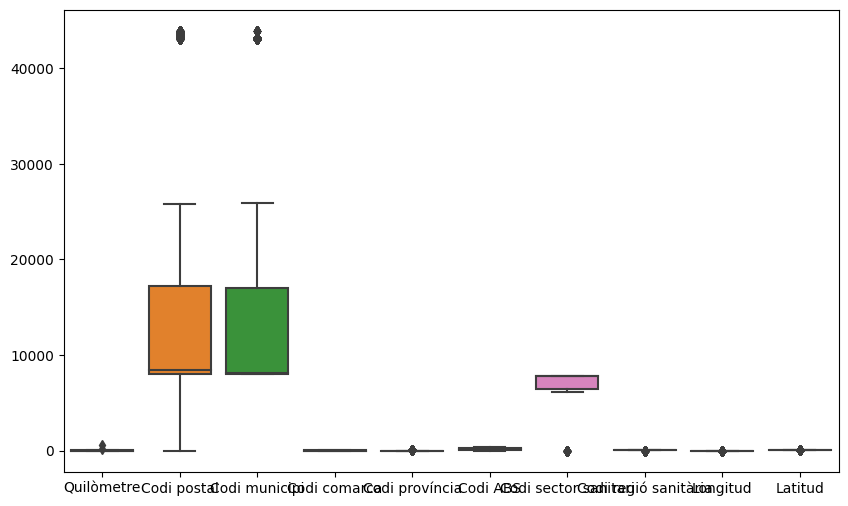

In [119]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=san_num)
plt.show()

Correlaciones

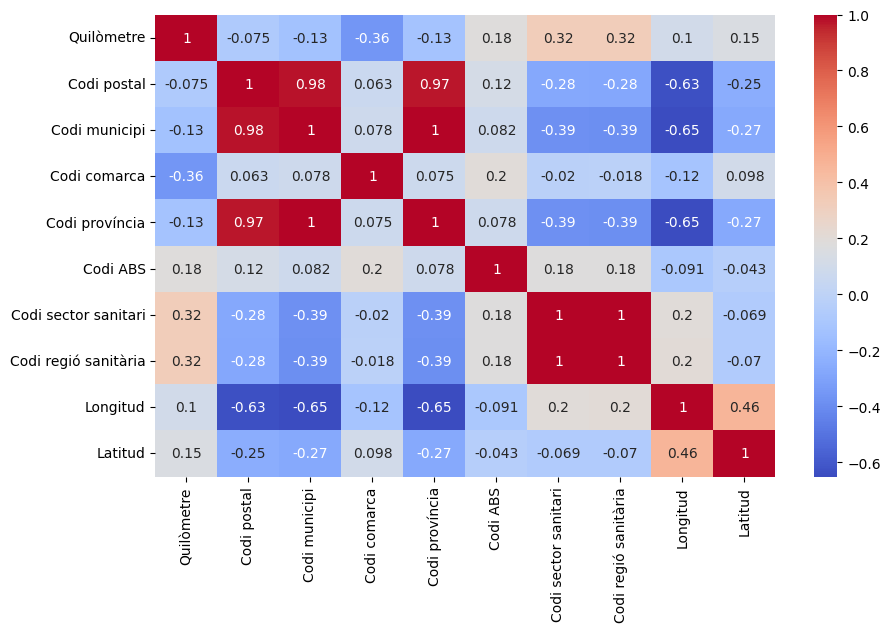

In [120]:
plt.figure(figsize=(10, 6))
sns.heatmap(san_num.corr(), annot=True, cmap='coolwarm')
plt.show()

In [121]:
correlación_pearson = san_num.corr(method='pearson')
correlación_spearman = san_num.corr(method='spearman')
print(correlación_pearson)
print(correlación_spearman)

                      Quilòmetre  Codi postal  Codi municipi  Codi comarca  \
Quilòmetre              1.000000    -0.075399      -0.130244     -0.358895   
Codi postal            -0.075399     1.000000       0.975163      0.063120   
Codi municipi          -0.130244     0.975163       1.000000      0.077669   
Codi comarca           -0.358895     0.063120       0.077669      1.000000   
Codi província         -0.126289     0.970797       0.996317      0.074854   
Codi ABS                0.182055     0.117323       0.081952      0.198333   
Codi sector sanitari    0.324668    -0.275945      -0.386468     -0.020132   
Codi regió sanitària    0.323370    -0.279622      -0.389728     -0.017799   
Longitud                0.099937    -0.634540      -0.651812     -0.117668   
Latitud                 0.149202    -0.250552      -0.266168      0.098418   

                      Codi província  Codi ABS  Codi sector sanitari  \
Quilòmetre                 -0.126289  0.182055              0.324668 

Anova

In [122]:
san_num = san_num.rename(columns={'Codi postal': 'CP'})
san_num = san_num.rename(columns={'Codi municipi': 'CMUN'})
san_num = san_num.rename(columns={'Codi comarca': 'CCOM'})
san_num = san_num.rename(columns={'Codi província': 'CPRO'})
san_num = san_num.rename(columns={'Codi ABS': 'ABS'})
san_num = san_num.rename(columns={'Codi sector sanitari': 'CSS'})
san_num = san_num.rename(columns={'Codi regió sanitària': 'CRS'})
formula = 'CP ~ CMUN + CCOM + CPRO + ABS + CSS + CRS + Longitud + Latitud'

# Ajustar el modelo usando OLS (Ordinary Least Squares)
model = ols(formula, data=san_num).fit()

# Realizar el ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                sum_sq      df           F        PR(>F)
CMUN      4.127073e+06     1.0    1.039868  3.078959e-01
CCOM      9.798696e+06     1.0    2.468904  1.161748e-01
CPRO      3.627702e+07     1.0    9.140448  2.511411e-03
ABS       8.826192e+07     1.0   22.238693  2.465559e-06
CSS       8.282058e+08     1.0  208.676795  1.780148e-46
CRS       7.896933e+08     1.0  198.973103  1.968620e-44
Longitud  9.678481e+07     1.0   24.386142  8.109931e-07
Latitud   4.377662e+08     1.0  110.300673  1.445713e-25
Residual  2.244382e+10  5655.0         NaN           NaN


## 1.10 Dataset equipamiento por código postal

In [123]:
#equipamiento_cp.head()

In [124]:
#equipamiento_cp.describe()

In [125]:
#equipamiento_cp.columns

In [126]:
#equipamiento_cp["CPOSTAL"]

## 1.11 Dataset Comisarias por código postal

In [127]:
comisarias_cp.head()

Codi d'Informació                                      Unitat  \
0              17833          Policia Local de Parets del Vallès   
1              17737                   Policia Local de Banyoles   
2              17879       Policia Local de Sant Sadurní d'Anoia   
3              17739                 Guàrdia Urbana de Barcelona   
4              17863  Policia Local de Sant Climent de Llobregat   

                        Adreça  Codi postal                   Municipi  \
0    Av. de Lluís Companys, 19         8150          Parets del Vallès   
1          Pg. de la Farga, 84        17820                   Banyoles   
2      Pl. de l' Ajuntament, 1         8770       Sant Sadurní d'Anoia   
3   C. de la Guàrdia Urbana, 3         8004                  Barcelona   
4  Trv. de Prat de la Riba, 31         8849  Sant Climent de Llobregat   

   Codi municipi          Utm_x         Utm_y    Latitud  Longitud  \
0          81593  435914.525735  4.602574e+06  41.572276  2.231314   
1         170157  481476.832000  4.662614e+06  42.115407  2.775933   
2          82401  398620.375312  4.586547e+06  41.424089  1.786758   
3          80193  429247.446048  4.580386e+06  41.371978  2.153990   
4          82042  416141.467239  4.576763e+06  41.337990  1.997759   

                      Georeferència  
0  POINT (2.231314474 41.572275591)  
1  POINT (2.775932582 42.115406543)  
2  POINT (1.786758362 41.424089412)  
3  POINT (2.153989965 41.371977557)  
4  POINT (1.997758643 41.337990343)

In [128]:
comisarias_cp.describe()

Codi d'Informació   Codi postal  Codi municipi          Utm_x  \
count         217.000000    217.000000     217.000000     217.000000   
mean        17882.732719  16041.990783  157229.732719  419319.324641   
std           441.582699  12268.011478  122233.440765   55132.909701   
min         17717.000000   8004.000000   80018.000000  270358.279869   
25%         17771.000000   8358.000000   81252.000000  397132.059903   
50%         17826.000000   8770.000000   82606.000000  425381.394157   
75%         17881.000000  17487.000000  171479.000000  450011.155641   
max         21651.000000  43895.000000  439060.000000  523215.324680   

              Utm_y     Latitud    Longitud  
count  2.170000e+02  217.000000  217.000000  
mean   4.601730e+06   41.561467    2.034817  
std    3.790484e+04    0.345839    0.656453  
min    4.491087e+06   40.543090    0.284478  
25%    4.582371e+06   41.388675    1.771990  
50%    4.600991e+06   41.557498    2.107798  
75%    4.622427e+06   41.744755    2.400465  
max    4.698320e+06   42.432175    3.281610

In [129]:
comisarias_cp["Codi postal"]

0       8150
1      17820
2       8770
3       8004
4       8849
       ...  
212     8130
213     8570
214     8392
215    43700
216     8192
Name: Codi postal, Length: 217, dtype: int64

In [130]:
len(comisarias_cp)

217

##### 1.11.2 Análisis estadístico

In [131]:
com_num = comisarias_cp.select_dtypes(include=['float64', 'int64'])

Asimetria

In [132]:
# Asimetría y curtosis
asimetría = com_num.skew()
curtosis = com_num.kurt()
print(asimetría)
print(curtosis)

Codi d'Informació    7.378551
Codi postal          1.532382
Codi municipi        1.527162
Utm_x               -0.628902
Utm_y               -0.192410
Latitud             -0.237554
Longitud            -0.607654
dtype: float64
Codi d'Informació    55.825844
Codi postal           0.870755
Codi municipi         0.854781
Utm_x                 0.172026
Utm_y                 0.917224
Latitud               0.960839
Longitud              0.139853
dtype: float64


Histograma

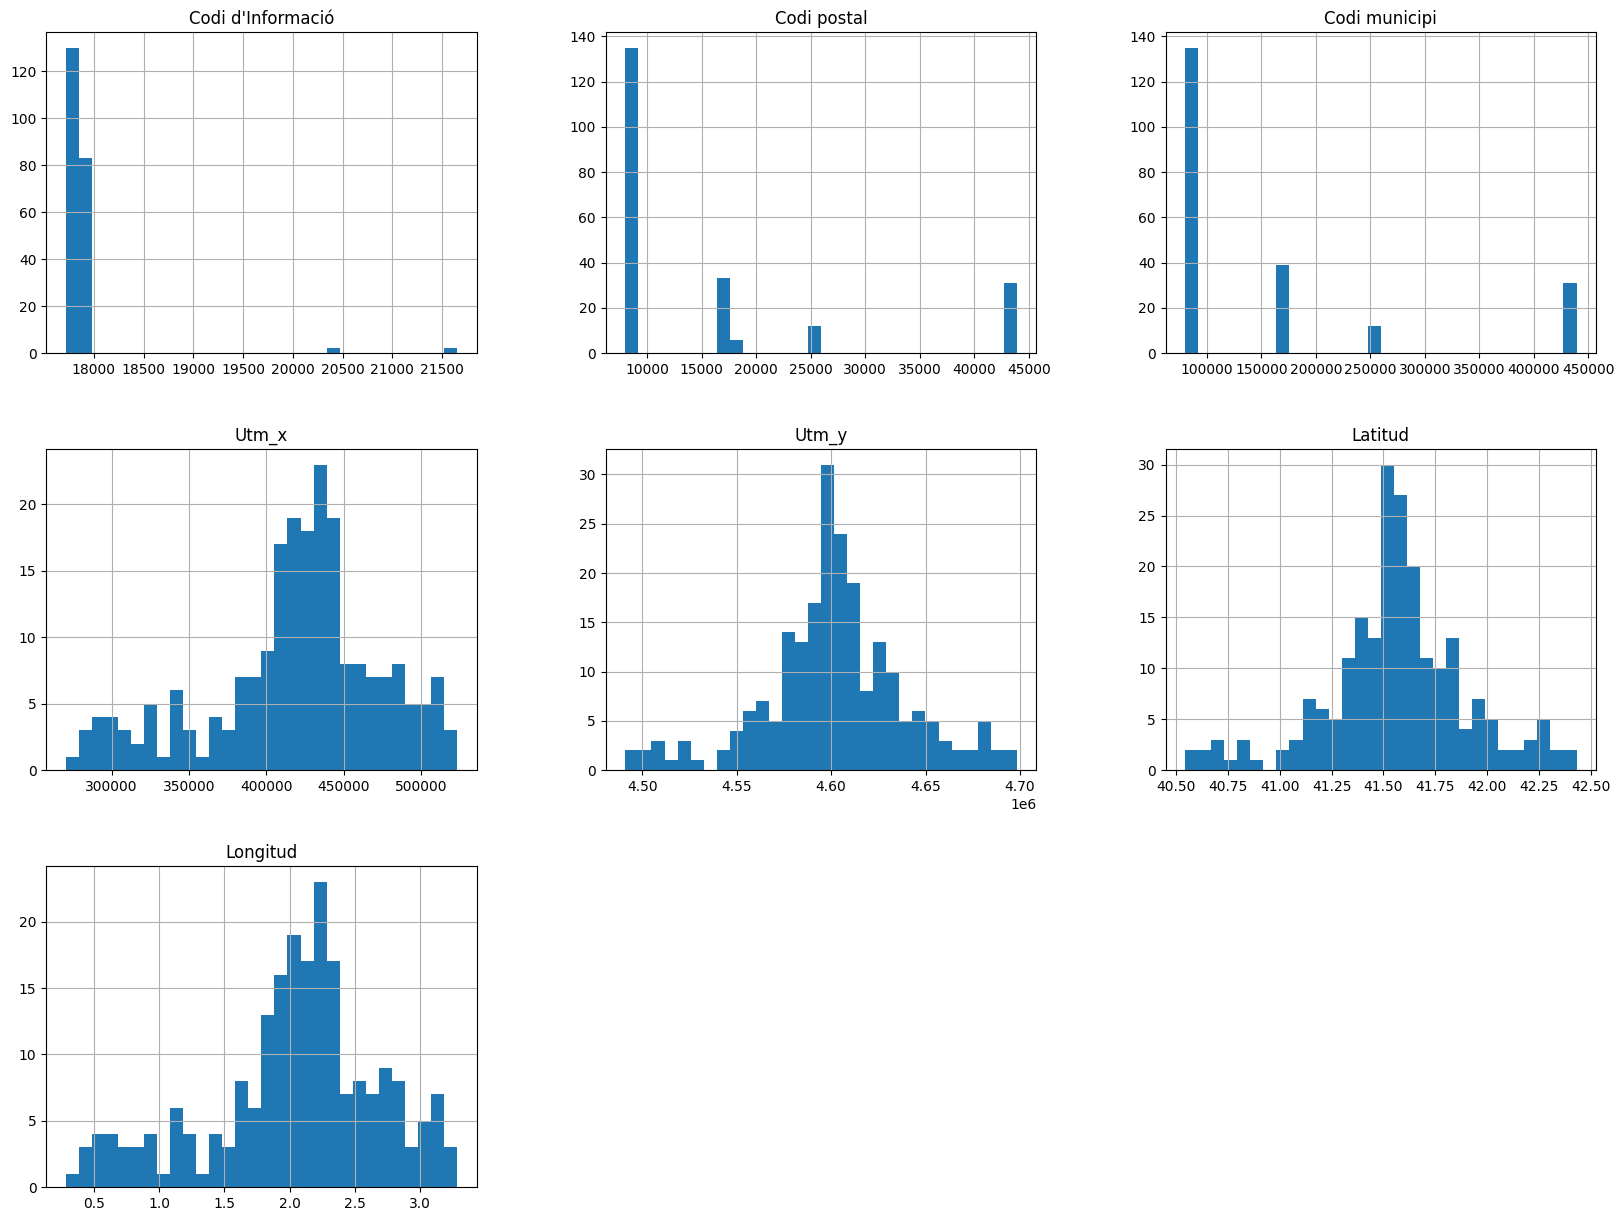

In [133]:
# Histograma
com_num.hist(bins=30, figsize=(20, 15))
plt.show()

Boxplot

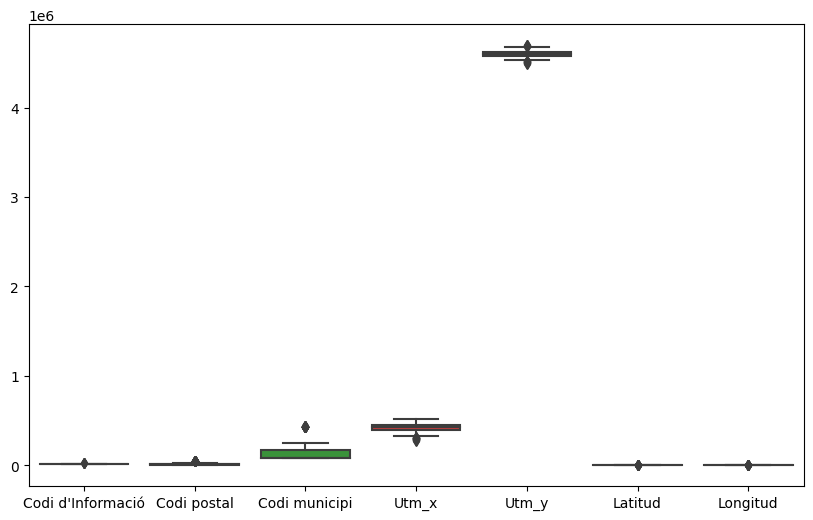

In [134]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=com_num)
plt.show()

Correlaciones

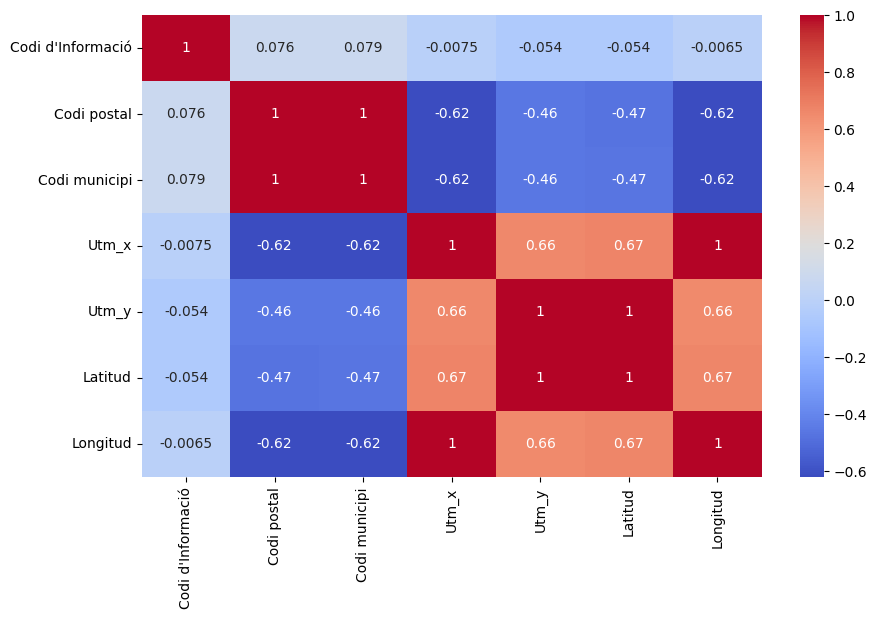

In [135]:
plt.figure(figsize=(10, 6))
sns.heatmap(com_num.corr(), annot=True, cmap='coolwarm')
plt.show()

In [136]:
correlación_pearson = com_num.corr(method='pearson')
correlación_spearman = com_num.corr(method='spearman')
print(correlación_pearson)
print(correlación_spearman)

                   Codi d'Informació  Codi postal  Codi municipi     Utm_x  \
Codi d'Informació           1.000000     0.075603       0.078608 -0.007521   
Codi postal                 0.075603     1.000000       0.999727 -0.621080   
Codi municipi               0.078608     0.999727       1.000000 -0.619449   
Utm_x                      -0.007521    -0.621080      -0.619449  1.000000   
Utm_y                      -0.054134    -0.460200      -0.457932  0.662462   
Latitud                    -0.054075    -0.469675      -0.467438  0.673469   
Longitud                   -0.006516    -0.616948      -0.615319  0.999942   

                      Utm_y   Latitud  Longitud  
Codi d'Informació -0.054134 -0.054075 -0.006516  
Codi postal       -0.460200 -0.469675 -0.616948  
Codi municipi     -0.457932 -0.467438 -0.615319  
Utm_x              0.662462  0.673469  0.999942  
Utm_y              1.000000  0.999865  0.656368  
Latitud            0.999865  1.000000  0.667418  
Longitud           0.6563

Anova

In [137]:
com_num = com_num.rename(columns={'Codi postal': 'CP'})
com_num = com_num.rename(columns={'Codi municipi': 'CMUN'})
formula = 'CP ~ CMUN + Utm_x + Utm_y + Latitud + Longitud'

# Ajustar el modelo usando OLS (Ordinary Least Squares)
model = ols(formula, data=com_num).fit()

# Realizar el ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                sum_sq     df              F         PR(>F)
CMUN      1.112336e+10    1.0  141219.126466  3.708778e-300
Utm_x     2.292526e+05    1.0       2.910527   8.947456e-02
Utm_y     8.733855e+05    1.0      11.088259   1.025328e-03
Latitud   8.684474e+05    1.0      11.025566   1.058789e-03
Longitud  2.182184e+05    1.0       2.770440   9.750404e-02
Residual  1.661977e+07  211.0            NaN            NaN


## 1.12 Dataset Certificados por código postal

In [138]:
#certificats_cp.head()

In [139]:
#certificats_cp.describe()

In [140]:
#certificats_cp.columns

## 1.13 Dataset Renta per cápita por código postal

In [141]:
renta_capita_cp.head()

Año Periodo                                          Parámetro  \
0  2018     Año  02001-San Antonio Abad- La Pajarita- Polígono ...   
1  2018     Año        02002-Parque Sur-Huerta de Marzo (Albacete)   
2  2018     Año                      02003-Franciscanos (Albacete)   
3  2018     Año              02004-Fátima- Villacerrada (Albacete)   
4  2018     Año  02005-Industria- El Pilar- Feria- Ntra. Sra. d...   

   Renta bruta media  Renta disponible media  
0             32.036                  25.823  
1             30.426                  24.615  
2             26.866                  22.145  
3             23.072                  19.449  
4             25.098                  20.822

In [142]:
renta_capita_cp.describe()

Año  Renta bruta media  Renta disponible media
count   598.0         598.000000              598.000000
mean   2018.0          31.811895               25.624446
std       0.0          14.370573               10.033102
min    2018.0          15.776000               14.013000
25%    2018.0          23.872250               20.039500
50%    2018.0          28.280500               23.125500
75%    2018.0          34.584000               27.659500
max    2018.0         214.276000              150.312000

In [143]:
len(renta_capita_cp)

598

In [144]:
renta_capita_cp_num = renta_capita_cp.select_dtypes(include=['float64', 'int64'])

In [145]:
# Asimetría y curtosis
asimetría = renta_capita_cp_num.skew()
curtosis = renta_capita_cp_num.kurt()
print(asimetría)
print(curtosis)

Año                       0.000000
Renta bruta media         4.960383
Renta disponible media    4.764829
dtype: float64
Año                        0.000000
Renta bruta media         46.903136
Renta disponible media    43.410293
dtype: float64


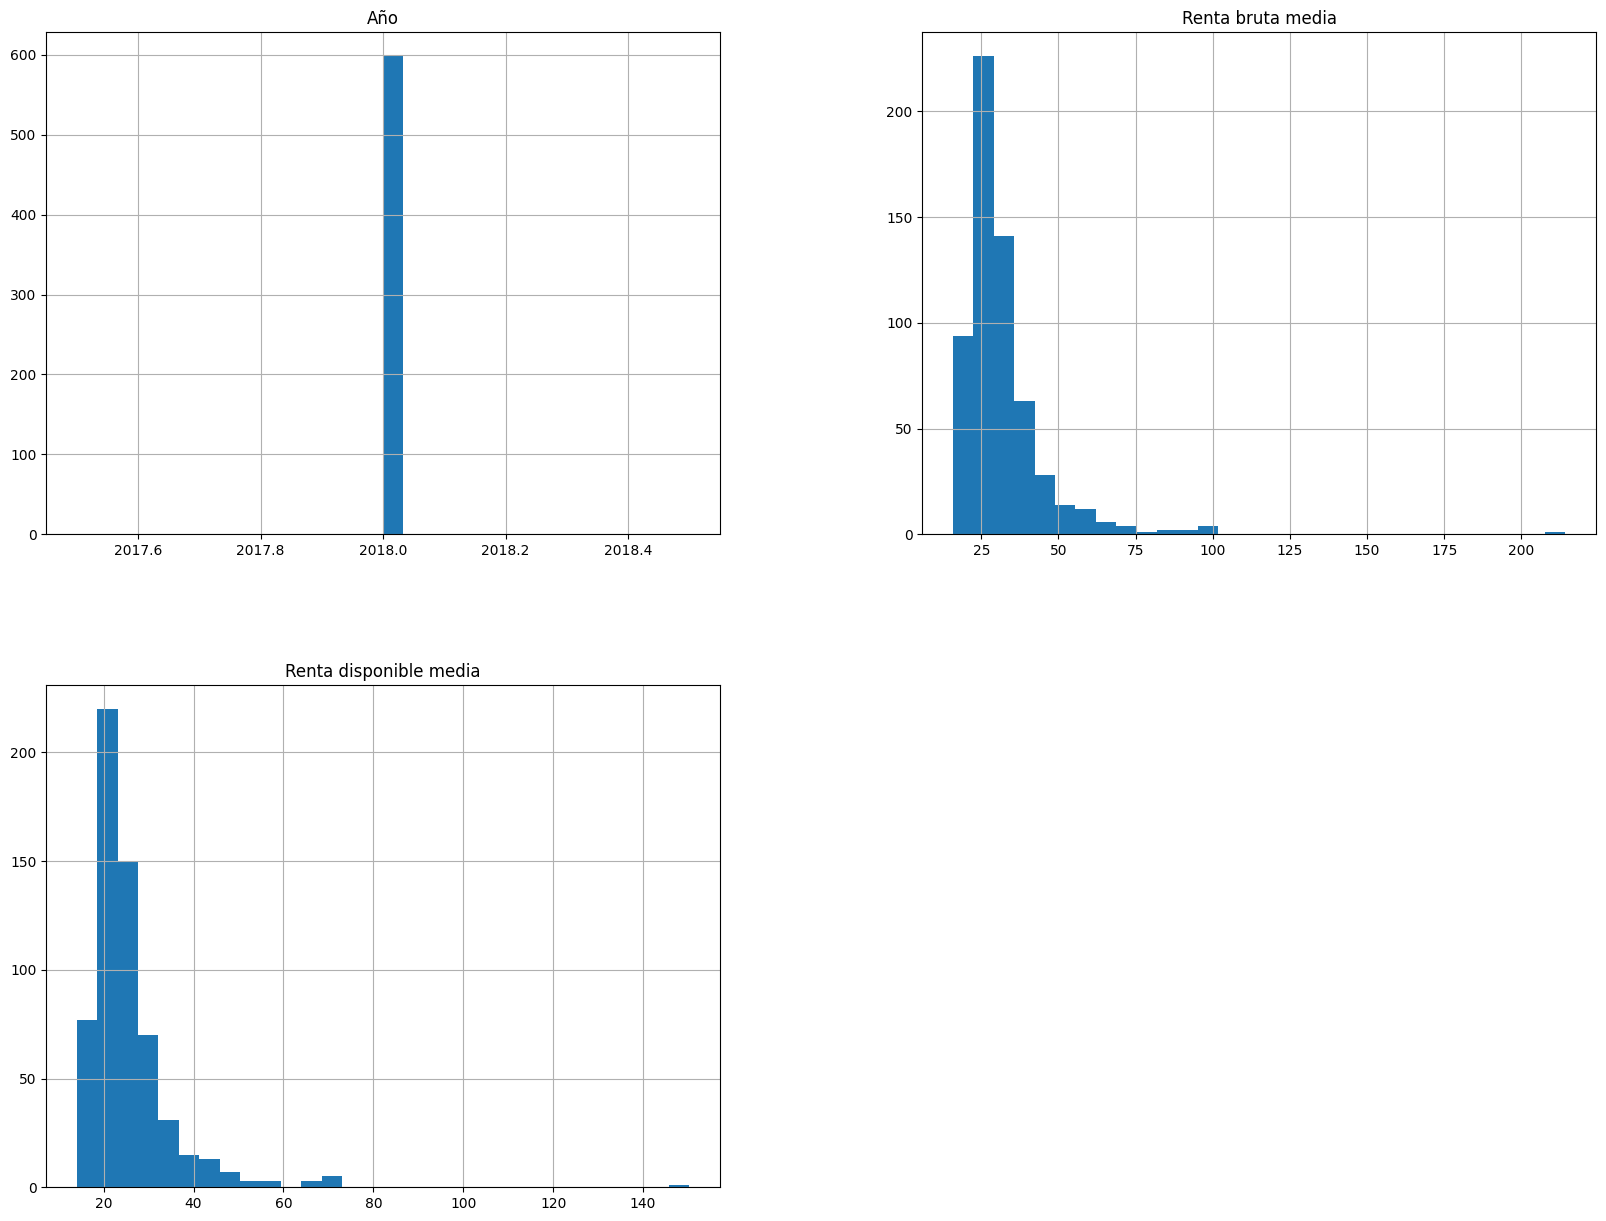

In [146]:
# Histograma
renta_capita_cp_num.hist(bins=30, figsize=(20, 15))
plt.show()

# 2. Data Cleaning

## 2.1. Filtrado en cada dataset

### 2.1.1 Filtrado cataluña dataset principal

In [147]:
#Filtramos para que solo utilice los datos de viviendas en Cataluña
df_cat = df[df['NCA'] == 'Cataluña']

### 2.1.2 Filtrado renta per capita municipio

La idea es quedarse con un dataset con solo el nombre del municipio y la renta media

In [148]:
renta_capita = renta_capita[renta_capita["indicador"] == "per habitant (€)"]

In [149]:
renta_capita

any            municipi                         concepte  \
1     2020              Abrera  renda familiar disponible bruta   
4     2020            Agramunt  renda familiar disponible bruta   
7     2020          Aiguafreda  renda familiar disponible bruta   
10    2020              Aitona  renda familiar disponible bruta   
13    2020          Albatàrrec  renda familiar disponible bruta   
...    ...                 ...                              ...   
1369  2020      Vilobí d'Onyar  renda familiar disponible bruta   
1372  2020  Vilobí del Penedès  renda familiar disponible bruta   
1375  2020  Vinyols i els Arcs  renda familiar disponible bruta   
1378  2020               Xerta  renda familiar disponible bruta   
1381  2020           Catalunya  renda familiar disponible bruta   

             indicador estat    valor  
1     per habitant (€)     p  17925.0  
4     per habitant (€)     p  15374.0  
7     per habitant (€)     p  18721.0  
10    per habitant (€)     p  11996.0  
13    per habitant (€)     p  12861.0  
...                ...   ...      ...  
1369  per habitant (€)     p  17487.0  
1372  per habitant (€)     p  17114.0  
1375  per habitant (€)     p  15346.0  
1378  per habitant (€)     p  14582.0  
1381  per habitant (€)     p  17553.0  

[461 rows x 6 columns]

In [150]:
talleres_cp = talleres_cp[talleres_cp["Estat"] == "Alta"]

### 2.1.3 Filtrado paro por municipio

In [151]:
paro_2021 = paro_bcn[['MUNICIPIOS','TOTAL']].rename(columns={'TOTAL': 'PARO_TOTAL'})
paro_2021.head()

MUNICIPIOS  PARO_TOTAL
0              ABRERA       680.0
1  AGUILAR DE SEGARRA        12.0
2          AIGUAFREDA       129.0
3              ALELLA       296.0
4              ALPENS         9.0

### 2.1.4 Filtrado renta per capita por código postal

Se elimina el nombre en la columna parámetro

In [152]:
renta_capita_cp

Año Periodo                                          Parámetro  \
0    2018     Año  02001-San Antonio Abad- La Pajarita- Polígono ...   
1    2018     Año        02002-Parque Sur-Huerta de Marzo (Albacete)   
2    2018     Año                      02003-Franciscanos (Albacete)   
3    2018     Año              02004-Fátima- Villacerrada (Albacete)   
4    2018     Año  02005-Industria- El Pilar- Feria- Ntra. Sra. d...   
..    ...     ...                                                ...   
593  2018     Año                     50190-Garrapinillos (Zaragoza)   
594  2018     Año               50194-Movera-Torre Larraz (Zaragoza)   
595  2018     Año                           50620-Casetas (Zaragoza)   
596  2018     Año                      50720-Cartuja Baja (Zaragoza)   
597  2018     Año            50820-San Juan de Mozarrifar (Zaragoza)   

     Renta bruta media  Renta disponible media  
0               32.036                  25.823  
1               30.426                  24.615  
2               26.866                  22.145  
3               23.072                  19.449  
4               25.098                  20.822  
..                 ...                     ...  
593             29.913                  24.229  
594             27.976                  22.941  
595             22.356                  18.812  
596             26.286                  21.398  
597             29.530                  23.976  

[598 rows x 5 columns]

In [153]:
def extraer_codigo_postal(texto):
    codigo_postal = re.match(r'^(\d+)-', texto)
    if codigo_postal:
        return codigo_postal.group(1)
    else:
        return None

renta_capita_cp["CP"] = renta_capita_cp["Parámetro"].apply(extraer_codigo_postal)
renta_capita_cp

Año Periodo                                          Parámetro  \
0    2018     Año  02001-San Antonio Abad- La Pajarita- Polígono ...   
1    2018     Año        02002-Parque Sur-Huerta de Marzo (Albacete)   
2    2018     Año                      02003-Franciscanos (Albacete)   
3    2018     Año              02004-Fátima- Villacerrada (Albacete)   
4    2018     Año  02005-Industria- El Pilar- Feria- Ntra. Sra. d...   
..    ...     ...                                                ...   
593  2018     Año                     50190-Garrapinillos (Zaragoza)   
594  2018     Año               50194-Movera-Torre Larraz (Zaragoza)   
595  2018     Año                           50620-Casetas (Zaragoza)   
596  2018     Año                      50720-Cartuja Baja (Zaragoza)   
597  2018     Año            50820-San Juan de Mozarrifar (Zaragoza)   

     Renta bruta media  Renta disponible media     CP  
0               32.036                  25.823  02001  
1               30.426                  24.615  02002  
2               26.866                  22.145  02003  
3               23.072                  19.449  02004  
4               25.098                  20.822  02005  
..                 ...                     ...    ...  
593             29.913                  24.229  50190  
594             27.976                  22.941  50194  
595             22.356                  18.812  50620  
596             26.286                  21.398  50720  
597             29.530                  23.976  50820  

[598 rows x 6 columns]

## 2.2 Eliminación de valores nulos

In [154]:
#Limpieza de filas con valores nulos en el nombre del municipio y en el código postal
df_cat = df_cat.dropna(subset=['NMUN'])
df_cat = df_cat.dropna(subset=['CodigoPostal'])
entitats_esportives_cp = entitats_esportives_cp.dropna(subset = ["CP"])
consumo_gas = consumo_gas.dropna(subset=["Consum [kWh PCS]"])
consumo_energia = consumo_energia.dropna(subset=["Consum [kWh]"])

## 2.3 Estandarización de variables

### 2.3.1 Estandarización de los nombres de los municipios

In [155]:
df_cat['NMUN'].head()

3001         Gavà
3002     Sabadell
3003    Tarragona
3004          Vic
3005        Navàs
Name: NMUN, dtype: object

In [156]:
#Normalizar columna municipio en dataset principal
df_cat['NMUN'] = df_cat['NMUN'].apply(lambda x: unidecode(x).lower())
df_cat['NMUN'] = df_cat['NMUN'].str.strip()

In [157]:
df_cat['NMUN'].head()

3001         gava
3002     sabadell
3003    tarragona
3004          vic
3005        navas
Name: NMUN, dtype: object

In [158]:
#Normalizar columna municipio en dataset renta per capita
renta_capita['municipi'] = renta_capita['municipi'].apply(lambda x: unidecode(x).lower())
renta_capita['municipi'] = renta_capita['municipi'].str.strip()
#df_merged = pd.merge(df_cat, renta_capita_2021, left_on='NMUN_normalized', right_on='Municipio_normalized', how='left')

In [159]:
renta_capita.head()

any    municipi                         concepte         indicador estat  \
1   2020      abrera  renda familiar disponible bruta  per habitant (€)     p   
4   2020    agramunt  renda familiar disponible bruta  per habitant (€)     p   
7   2020  aiguafreda  renda familiar disponible bruta  per habitant (€)     p   
10  2020      aitona  renda familiar disponible bruta  per habitant (€)     p   
13  2020  albatarrec  renda familiar disponible bruta  per habitant (€)     p   

      valor  
1   17925.0  
4   15374.0  
7   18721.0  
10  11996.0  
13  12861.0

In [160]:
#Normalizar columna municipio en dataset paro
paro_2021['MUNICIPIOS'] = paro_2021['MUNICIPIOS'].apply(lambda x: unidecode(x).lower())
paro_2021['MUNICIPIOS'] = paro_2021['MUNICIPIOS'].str.strip()
paro_2021.head()

MUNICIPIOS  PARO_TOTAL
0              abrera       680.0
1  aguilar de segarra        12.0
2          aiguafreda       129.0
3              alella       296.0
4              alpens         9.0

In [161]:
consumo_gas['MUNICIPI']=consumo_gas['MUNICIPI'].apply(lambda x: unidecode(x).lower())
consumo_gas['MUNICIPI']=consumo_gas['MUNICIPI'].str.strip()
consumo_gas.head()

/tmp/ipykernel_34/154299859.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consumo_gas['MUNICIPI']=consumo_gas['MUNICIPI'].apply(lambda x: unidecode(x).lower())
/tmp/ipykernel_34/154299859.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consumo_gas['MUNICIPI']=consumo_gas['MUNICIPI'].str.strip()


ANY PROVINCIA   COMARCA  CDMUN    MUNICIPI          SECTOR  \
0  2022    GIRONA   GIRONES  17002   aiguaviva      INDUSTRIAL   
1  2022    GIRONA   GIRONES  17002   aiguaviva        TERCIARI   
2  2022    GIRONA   GIRONES  17002   aiguaviva  USOS DOMESTICS   
5  2022    GIRONA  GARROTXA  17010  argelaguer        TERCIARI   
6  2022    GIRONA  GARROTXA  17010  argelaguer  USOS DOMESTICS   

   Consum [kWh PCS] Observacions  
0        23539402.0          NaN  
1          761879.0          NaN  
2         1049126.0          NaN  
5          271872.0          NaN  
6          931331.0          NaN

In [162]:
consumo_energia['Municipi'] = consumo_energia['Municipi'].apply(lambda x: unidecode(x).lower())
consumo_energia['Municipi'] = consumo_energia['Municipi'].str.strip()
consumo_energia.head()

Any  Provincia         Comarca  CDMUN Municipi  Codi_Sector  \
0  2013  BARCELONA  BAIX LLOBREGAT   8001   abrera            1   
1  2013  BARCELONA  BAIX LLOBREGAT   8001   abrera            3   
2  2013  BARCELONA  BAIX LLOBREGAT   8001   abrera            4   
4  2013  BARCELONA  BAIX LLOBREGAT   8001   abrera            6   
5  2013  BARCELONA  BAIX LLOBREGAT   8001   abrera            7   

               Descripcio_Sector  Consum [kWh] Observacions  
0                        PRIMARI      237755.0          NaN  
1                     INDUSTRIAL    66604371.0          NaN  
2  CONSTRUCCIO I OBRES PUBLIQUES      710769.0          NaN  
4                       TERCIARI   100629015.0          NaN  
5                 USOS DOMESTICS    17612504.0          NaN

### 2.3.2 Estandarización de los códigos postales

In [163]:
def normalizar_codigo_postal(cp):
    if isinstance(cp, str):  # Verificar si es una cadena de texto
        if '.' in cp:  # Si la cadena contiene un punto decimal
            cp = cp.split('.')[0]  # Tomar la parte antes del punto decimal
        if len(cp) < 5:
            cp = '0' * (5 - len(cp)) + cp  # Agregar ceros a la izquierda si es necesario
        return cp
    else:
        # Convertir el valor a entero y luego a cadena de texto
        cp_str = str(int(cp))
        if len(cp_str) < 5:
            cp_str = '0' * (5 - len(cp_str)) + cp_str  # Agregar ceros a la izquierda si es necesario
        return cp_str

In [164]:
df_cat['CodigoPostal'].head()

3001     8850.0
3002     8201.0
3003    43001.0
3004     8500.0
3005     8670.0
Name: CodigoPostal, dtype: object

In [165]:
# Normalización del código postal del dataset principal
df_cat['CodigoPostal'] = df_cat['CodigoPostal'].apply(normalizar_codigo_postal)
df_cat['CodigoPostal'] = df_cat['CodigoPostal'].str.strip()

In [166]:
df_cat['CodigoPostal'].head()

3001    08850
3002    08201
3003    43001
3004    08500
3005    08670
Name: CodigoPostal, dtype: object

In [167]:
# Normalización del código postal del dataset de renta per capita
renta_capita_cp["CP"] = renta_capita_cp["CP"].apply(normalizar_codigo_postal)
renta_capita_cp["CP"] = renta_capita_cp["CP"].str.strip()
renta_capita_cp["CP"].head()

0    02001
1    02002
2    02003
3    02004
4    02005
Name: CP, dtype: object

In [168]:
# Normalización del código postal del dataset de talleres
talleres_cp["Codi postal"] = talleres_cp["Codi postal"].apply(normalizar_codigo_postal)
talleres_cp["Codi postal"] = talleres_cp["Codi postal"].str.strip()
talleres_cp["Codi postal"].head()

0    25191
1    25520
2    08800
3    08700
4    08013
Name: Codi postal, dtype: object

In [169]:
# Normalización del código postal del dataset de entidades
entitats_esportives_cp["CP"] = entitats_esportives_cp["CP"].apply(normalizar_codigo_postal)
entitats_esportives_cp["CP"] = entitats_esportives_cp["CP"].str.strip()
entitats_esportives_cp["CP"].head()

0    08530
1    43330
2    43152
3    25199
4    08025
Name: CP, dtype: object

In [170]:
# Normalización del código postal del dataset de sanitarios
sanitarios_cp["Codi postal"] = sanitarios_cp["Codi postal"].apply(normalizar_codigo_postal)
sanitarios_cp["Codi postal"] = sanitarios_cp["Codi postal"].str.strip()
sanitarios_cp["Codi postal"].head()

0    25266
1    08370
2    43800
3    17600
4    43500
Name: Codi postal, dtype: object

In [171]:
# Normalización del código postal del dataset de comisarias
comisarias_cp["Codi postal"] = comisarias_cp["Codi postal"].apply(normalizar_codigo_postal)
comisarias_cp["Codi postal"] = comisarias_cp["Codi postal"].str.strip()
comisarias_cp["Codi postal"].head()

0    08150
1    17820
2    08770
3    08004
4    08849
Name: Codi postal, dtype: object

## 2.4 Otros

In [172]:
renta_capita.loc[renta_capita["municipi"] == "rapita, la", "municipi"] = "sant carles de la rapita"
renta_capita.loc[renta_capita["municipi"] == "castell d'aro, platja d'aro i s'agaro", "municipi"] = "castell-platja d'aro"
renta_capita.loc[renta_capita["municipi"] == "bigues i riells del fai", "municipi"] = "bigues i riells"

In [173]:
# Agrupando el total del consumo de gas de cada municipio
consumo_gas_agrupado = consumo_gas.groupby(["MUNICIPI"]).agg({"Consum [kWh PCS]": "sum"}).reset_index()

# Renombrar la columna para reflejar que es el consumo total
consumo_gas_agrupado = consumo_gas_agrupado.rename(columns={"Consum [kWh PCS]": "Consumo total [kWh PCS]"})

# Mostrar el nuevo dataframe
consumo_gas_agrupado

MUNICIPI  Consumo total [kWh PCS]
0                  abrera             3.640369e+08
1                agramunt             3.648002e+07
2              aiguafreda             8.525506e+07
3               aiguaviva             2.316108e+08
4                  aitona             4.884105e+06
..                    ...                      ...
381   vilanova del valles             7.040385e+07
382  vilanova i la geltru             1.630132e+09
383      vilassar de dalt             2.444859e+08
384       vilassar de mar             4.966412e+08
385    vinyols i els arcs             8.052107e+06

[386 rows x 2 columns]

In [174]:
# Agrupando el total del consumo de energia de cada municipio
consumo_energia_agrupado = consumo_energia.groupby(["Municipi"]).agg({"Consum [kWh]": "sum"}).reset_index()

# Renombrar la columna para reflejar que es el consumo total
consumo_energia_agrupado = consumo_energia_agrupado.rename(columns={"Consum [kWh]": "Consumo total [kWh]"})

# Mostrar el nuevo dataframe
consumo_energia_agrupado

Municipi  Consumo total [kWh]
0    abella de la conca         6.772332e+06
1                abrera         2.098152e+09
2                  ager         2.574681e+07
3              agramunt         3.146147e+08
4    aguilar de segarra         6.835714e+06
..                  ...                  ...
942             vinaixa         1.609832e+07
943             vinebre         2.136292e+07
944  vinyols i els arcs         1.327401e+08
945   viver i serrateix         8.918027e+06
946               xerta         3.414226e+07

[947 rows x 2 columns]

In [175]:
# Transformando dataset de talleres a un dataset con el número de talleres para cada código postal
talleres_x_cp = talleres_cp.groupby("Codi postal").size().reset_index(name='Num Talleres')
talleres_x_cp

Codi postal  Num Talleres
0         000No             1
1         08000             1
2         08001            14
3         08002             2
4         08003             5
..          ...           ...
774       43893             3
775       43894            14
776       43895             4
777       43896            24
778       43897             7

[779 rows x 2 columns]

In [176]:
# Transformando dataset de talleres a un dataset con el número de entidades deportivas para cada código postal
entidades_x_cp = entitats_esportives_cp.groupby("CP").size().reset_index(name='Num entidades')
entidades_x_cp

CP  Num entidades
0     00812              1
1     01784              1
2     04380              1
3     08001             72
4     08002             30
...     ...            ...
1054  43897              5
1055  43980              1
1056  43981              1
1057  43987              1
1058  97272              1

[1059 rows x 2 columns]

In [177]:
# Transformando dataset de talleres a un dataset con el número de entidades deportivas para cada código postal
sanitarios_x_cp = sanitarios_cp.groupby("Codi postal").size().reset_index(name='Num centros sanitarios')
sanitarios_x_cp

Codi postal  Num centros sanitarios
0         00000                     103
1         08001                      38
2         08002                      29
3         08003                      37
4         08004                      22
..          ...                     ...
780       43893                       3
781       43894                       3
782       43895                       2
783       43896                       3
784       43897                       1

[785 rows x 2 columns]

In [178]:
# Transformando dataset de comisarias a un dataset con el número de comisarias para cada código postal
comisarias_x_cp = comisarias_cp.groupby("Codi postal").size().reset_index(name='Num comisarias')
comisarias_x_cp

Codi postal  Num comisarias
0         08004               1
1         08100               1
2         08105               1
3         08107               1
4         08110               1
..          ...             ...
212       43890               1
213       43892               1
214       43893               1
215       43894               1
216       43895               1

[217 rows x 2 columns]

## 2.5 Mergeado

### 2.5.1 Merge de la renta per capita

In [179]:
renta_capita_x_cp = renta_capita_cp[['CP', "Renta bruta media"]]
renta_capita_x_cp

CP  Renta bruta media
0    02001             32.036
1    02002             30.426
2    02003             26.866
3    02004             23.072
4    02005             25.098
..     ...                ...
593  50190             29.913
594  50194             27.976
595  50620             22.356
596  50720             26.286
597  50820             29.530

[598 rows x 2 columns]

In [180]:
renta_capita.head()

any    municipi                         concepte         indicador estat  \
1   2020      abrera  renda familiar disponible bruta  per habitant (€)     p   
4   2020    agramunt  renda familiar disponible bruta  per habitant (€)     p   
7   2020  aiguafreda  renda familiar disponible bruta  per habitant (€)     p   
10  2020      aitona  renda familiar disponible bruta  per habitant (€)     p   
13  2020  albatarrec  renda familiar disponible bruta  per habitant (€)     p   

      valor  
1   17925.0  
4   15374.0  
7   18721.0  
10  11996.0  
13  12861.0

In [181]:
renta_capita = renta_capita.rename(columns={"valor":"Renta bruta media"})

In [182]:
renta_capita.head()

any    municipi                         concepte         indicador estat  \
1   2020      abrera  renda familiar disponible bruta  per habitant (€)     p   
4   2020    agramunt  renda familiar disponible bruta  per habitant (€)     p   
7   2020  aiguafreda  renda familiar disponible bruta  per habitant (€)     p   
10  2020      aitona  renda familiar disponible bruta  per habitant (€)     p   
13  2020  albatarrec  renda familiar disponible bruta  per habitant (€)     p   

    Renta bruta media  
1             17925.0  
4             15374.0  
7             18721.0  
10            11996.0  
13            12861.0

In [183]:
renta_capita_x_mun = renta_capita[["municipi", "Renta bruta media"]]

In [184]:
renta_capita_x_mun

municipi  Renta bruta media
1                 abrera            17925.0
4               agramunt            15374.0
7             aiguafreda            18721.0
10                aitona            11996.0
13            albatarrec            12861.0
...                  ...                ...
1369      vilobi d'onyar            17487.0
1372  vilobi del penedes            17114.0
1375  vinyols i els arcs            15346.0
1378               xerta            14582.0
1381           catalunya            17553.0

[461 rows x 2 columns]

In [185]:
# Se hace merge primero con los códigos postales
df_merged = pd.merge(df_cat, renta_capita_x_cp, left_on='CodigoPostal', right_on="CP", how="left")

In [186]:
df_merged[["NMUN","CodigoPostal","Renta bruta media"]]

NMUN CodigoPostal  Renta bruta media
0           gava        08850                NaN
1       sabadell        08201             40.277
2      tarragona        43001                NaN
3            vic        08500                NaN
4          navas        08670                NaN
...          ...          ...                ...
89171     lleida        25003                NaN
89172  alcoletge        25660                NaN
89173     lleida        25008                NaN
89174     lleida        25006                NaN
89175     lleida        25008                NaN

[89176 rows x 3 columns]

In [187]:
# Suponiendo que df_merged es tu dataframe combinado y que la columna se llama "Renta disponible media"
# Si no tienes df_merged, sustituye df_merged por el nombre de tu dataframe

# Contar valores nulos en la columna "Renta disponible media"
valores_nulos = df_merged["Renta bruta media"].isnull().sum()

# Contar valores no nulos en la columna "Renta disponible media"
valores_no_nulos = df_merged["Renta bruta media"].notnull().sum()

print("Valores nulos:", valores_nulos)
print("Valores no nulos:", valores_no_nulos)


Valores nulos: 66822
Valores no nulos: 22354


In [188]:
# Identificar filas que aún no tienen valor en la columna de renta per capit
filas_sin_renta = df_merged[df_merged["Renta bruta media"].isnull()]
filas_sin_renta = filas_sin_renta.drop("Renta bruta media", axis = 1) # Borramos la columna porque sino da problemas al hacer el merge
df_merged_sin_renta = pd.merge(filas_sin_renta, renta_capita_x_mun, left_on="NMUN", right_on="municipi", how="left")

In [189]:
resultado = renta_capita_x_mun[renta_capita_x_mun["municipi"] == "salou"]

# Imprimir el resultado
print(resultado)

    municipi  Renta bruta media
913    salou            12696.0


In [190]:
valores_nulos = df_merged_sin_renta["Renta bruta media"].isnull().sum()

# Contar valores no nulos en la columna "Renta disponible media"
valores_no_nulos = df_merged_sin_renta["Renta bruta media"].notnull().sum()

print("Valores nulos:", valores_nulos)
print("Valores no nulos:", valores_no_nulos)

Valores nulos: 3408
Valores no nulos: 63414


In [191]:
df_merged_sin_renta[["NMUN","CodigoPostal","Renta bruta media"]]

NMUN CodigoPostal  Renta bruta media
0           gava        08850            18904.0
1      tarragona        43001            15881.0
2            vic        08500            16493.0
3          navas        08670            17093.0
4        manresa        08242            16362.0
...          ...          ...                ...
66817     lleida        25003            16328.0
66818  alcoletge        25660            14791.0
66819     lleida        25008            16328.0
66820     lleida        25006            16328.0
66821     lleida        25008            16328.0

[66822 rows x 3 columns]

In [192]:
filas_sin_renta2 = df_merged_sin_renta[df_merged_sin_renta["Renta bruta media"].isnull()]
municipios_sin_asignar = filas_sin_renta2["NMUN"].unique()

In [193]:
len(municipios_sin_asignar)

372

In [194]:
resultado = renta_capita_x_mun[renta_capita_x_mun["municipi"].str.contains("maso")]
# Imprimir el resultado
print(resultado)

Empty DataFrame
Columns: [municipi, Renta bruta media]
Index: []


In [195]:
municipios_no = ["port de la selva, el", "sant mateu de bages", "vilalba sasserra", "sant pau de seguries", "talamanca", "campins", "llambilles", "sant feliu sasserra", "colera", "sarroca de bellera", "ribera d'ondara", "rasquera", "jafre", "vilaverd", "pau", "jorba", "fontanals de cerdanya", "sant boi de llucanes", "castellar de n'hug", "esterri d'aneu", "barbera de la conca", "montella i martinet", "figols i alinya", "sant mori", "cervia de ter", "sales de llierca", "canet d'adri", "bellcaire d'emporda", "sant aniol de finestres", "avellanes i santa linya, les", "torroella de fluvia", "omellons, els", "guardiola de bergueda", "vilalba dels arcs", "santa llogaia d'alguema", "pont de molins", "pinell de brai, el", "mas de barberans", "vilanova de segria", "pobla de cervoles, la", "alamus, els", "portella, la", "sant miquel de fluvia", "vilanova d'escornalbou", "sant llorenc de morunys", "castello de farfanya", "saus, camallera i llampaies", "torre de cabdella, la", "castellfollit de la roca", "coll de nargo", "guils de cerdanya", "pera, la", "santa maria de besora", "alt aneu", "torre de l'espanyol, la", "oluges, les", "masies de roda, les", "monistrol de calders", "rupit i pruit", "sant bartomeu del grau", "ribera d'urgellet", "prats i sansor", "sant ramon", "castellfollit del boix", "cornudella de montsant", "alfara de carles", "aleixar, l'", "garidells, els", "vimbodi i poblet", "coma i la pedra, la", "montoliu de lleida", "omells de na gaia, els", "vallfogona de ripolles", "sant quirze safaja", "pont de bar, el", "bordes, es" , "montagut i oix", "cervia de les garrigues", "salas de pallars", "sant jaume de llierca", "vallbona de les monges", "santa maria de martorelles", "vespella de gaia", "llacuna, la", "sant marti de llemena", "maia de montcal", "prats de rei, els", "figuerola del camp", "pont d'armentera, el", "valls de valira, les", "aguilar de segarra", "pacs del penedes", "sant feliu de buixalleu", "brull, el", "quar, la", "vilosell, el", "albiol, l'", "torrefeta i florejacs", "bellmunt del priorat", "vilanova de prades", "armentera, l'", "sant climent sescebes", "calonge de segarra", "riba, la", "cabanyes, les", "guingueta d'aneu, la", "galera, la", "sant jordi desvalls", "baix pallars", "alas i cerc", "vilallonga de ter", "macanet de cabrenys", "lles de cerdanya", "estany, l'", "rourell, el", "josa i tuixen", "boadella i les escaules", "sant marti sesgueioles", "castellar del riu", "albi, l'", "granyena de segarra", "vilanova de meia", "plans de sio, els", "sarroca de lleida", "ivars de noguera", "mollet de peralada", "conca de dalt", "castellfollit de riubregos", "fogars de montclus", "nou de gaia, la", "bellmunt d'urgell", "fatarella, la", "brunyola i sant marti sapresa", "tallada d'emporda, la", "piles, les", "palma d'ebre, la", "vilanova de sau", "albages, l'", "sentiu de sio, la", "selva de mar, la", "sant joan de mollet", "espluga calba, l'", "vall de cardos", "sant marti vell", "sant esteve de la sarga", "gavet de la conca", "castell de mur", "poal, el", "masroig, el", "argentera, l'", "floresta, la", "granyena de les garrigues", "soleras, el", "castellnou de seana", "granadella, la", "pobla de massaluca, la", "febro, la", "vilella alta, la", "granja d'escarp, la", "prat de comte", "figuera, la", "pradell de la teixeta", "molar, el", "guiamets, els", "cogul, el", "bisbal de falset, la", "morera de montsant, la", "vilella baixa, la", "savalla del comtat", "vallfogona de riucorb", "passanant i belltall", "rocafort de queralt", "sant marti de riucorb", "mila, el", "maso, la"]
municipios_si = ["sant carles de la rapita", "castell-platja d'aro", "bigues i riells"]

In [196]:
for x in municipios_sin_asignar:
  palabras = len(x.split())
  if palabras == 1 and x not in municipios_no:
    municipios_no.append(x)
  elif palabras > 1 and x not in municipios_si and x not in municipios_no:
    print(x)

os de balaguer


In [197]:
df_merged

Unnamed: 0       Fecha           ID  \
0           3001  28/01/2022  162446552.0   
1           3002  28/01/2022  162446537.0   
2           3003  28/01/2022  162446526.0   
3           3004  28/01/2022  162446353.0   
4           3005  28/01/2022  162446510.0   
...          ...         ...          ...   
89171  2760114.0  07/09/2021  160692350.0   
89172  2761114.0  07/09/2021  160943133.0   
89173  2763114.0  07/09/2021  160458395.0   
89174  2765114.0  07/09/2021  156802611.0   
89175  2781111.0  07/09/2021  146301070.0   

                                                     URL   ID_Cliente  \
0      https://www.fotocasa.es/es/comprar/vivienda/ga...  9,20275E+12   
1      https://www.fotocasa.es/es/comprar/vivienda/sa...  9,20276E+12   
2      https://www.fotocasa.es/es/comprar/vivienda/ta...  9,20276E+12   
3      https://www.fotocasa.es/es/comprar/vivienda/vi...  9,20277E+12   
4      https://www.fotocasa.es/es/comprar/vivienda/na...  9,20277E+12   
...                                                  ...          ...   
89171  https://www.fotocasa.es/es/alquiler/vivienda/l...  9,20276E+12   
89172  https://www.fotocasa.es/es/alquiler/vivienda/a...  9,20276E+12   
89173  https://www.fotocasa.es/es/alquiler/vivienda/l...  9,20276E+12   
89174  https://www.fotocasa.es/es/alquiler/vivienda/l...  9,20276E+12   
89175  https://www.fotocasa.es/es/alquiler/vivienda/l...  9,20275E+12   

                                             URL_Cliente Inmueble  \
0      https://www.fotocasa.es/es/inmobiliaria-fincas...     Flat   
1      https://www.fotocasa.es/es/inmobiliaria-inmobi...     Flat   
2      https://www.fotocasa.es/es/inmobiliaria-eiviss...     Flat   
3      https://www.fotocasa.es/es/comprar/inmuebles/e...     Flat   
4      https://www.fotocasa.es/es/inmobiliaria-zabala...     Flat   
...                                                  ...      ...   
89171  https://www.fotocasa.es/es/inmobiliaria-inmogi...     Flat   
89172  https://www.fotocasa.es/es/inmobiliaria-vivend...     Flat   
89173  https://www.fotocasa.es/es/inmobiliaria-inmogi...     Flat   
89174  https://www.fotocasa.es/es/inmobiliaria-vivend...     Flat   
89175  https://www.fotocasa.es/es/inmobiliaria-manel-...     Flat   

             Caracteristicas  Habitaciones  Aseos  Terraza  Piscina  Garaje  \
0                       Flat           3.0    2.0      1.0      0.0     0.0   
1                       Flat           4.0    3.0      0.0      0.0     0.0   
2                       Flat           4.0    1.0      0.0      0.0     0.0   
3                       Flat           5.0    3.0      1.0      0.0     0.0   
4      GroundFloorWithGarden           3.0    2.0      1.0      0.0     0.0   
...                      ...           ...    ...      ...      ...     ...   
89171                   Flat           4.0    1.0      0.0      0.0     0.0   
89172              Apartment           2.0    1.0      1.0      0.0     0.0   
89173                   Flat           3.0    1.0      1.0      0.0     0.0   
89174                   Flat           4.0    1.0      0.0      0.0     0.0   
89175                   Flat           5.0    2.0      0.0      0.0     0.0   

         Precio  Metros             Relacion CodigoPostal    Latitud  \
0      385000.0    76.0  506.578.947.368.421        08850     41.301   
1      477000.0   170.0  280.588.235.294.118        08201  4.155.113   
2      125000.0    86.0  145.348.837.209.302        43001  4.111.553   
3      175000.0   180.0  972.222.222.222.222        08500  4.192.246   
4      106000.0    70.0  151.428.571.428.571        08670  4.189.949   
...         ...     ...                  ...          ...        ...   
89171     450.0    90.0                    5        25003  4.161.381   
89172     450.0    55.0  818.181.818.181.818        25660    416.445   
89173     600.0    87.0  689.655.172.413.793        25008  4.162.532   
89174     750.0   100.0                  7.5        25006  4.161.827   
89175     800.0   

In [198]:
df_final = pd.concat([df_merged.dropna(subset=["Renta bruta media"]), df_merged_sin_renta])

In [199]:
df_final.head()

Unnamed: 0       Fecha           ID  \
1        3002  28/01/2022  162446537.0   
10       3011  28/01/2022  162446483.0   
11       3012  28/01/2022  162446468.0   
25       3026  28/01/2022  162446181.0   
27       3028  28/01/2022  162446327.0   

                                                  URL   ID_Cliente  \
1   https://www.fotocasa.es/es/comprar/vivienda/sa...  9,20276E+12   
10  https://www.fotocasa.es/es/comprar/vivienda/sa...  9,20277E+12   
11  https://www.fotocasa.es/es/comprar/vivienda/ba...  9,20275E+12   
25  https://www.fotocasa.es/es/comprar/vivienda/ba...  9,20277E+12   
27  https://www.fotocasa.es/es/comprar/vivienda/ba...  9,20275E+12   

                                          URL_Cliente Inmueble  \
1   https://www.fotocasa.es/es/inmobiliaria-inmobi...     Flat   
10  https://www.fotocasa.es/es/inmobiliaria-house-...     Flat   
11  https://www.fotocasa.es/es/inmobiliaria-nova-u...     Flat   
25  https://www.fotocasa.es/es/inmobiliaria-monica...     Flat   
27  https://www.fotocasa.es/es/inmobiliaria-sans-s...     Flat   

   Caracteristicas  Habitaciones  Aseos  Terraza  Piscina  Garaje    Precio  \
1             Flat           4.0    3.0      0.0      0.0     0.0  477000.0   
10            Flat           2.0    2.0      0.0      0.0     0.0  183000.0   
11            Flat           4.0    2.0      1.0      0.0     0.0  400000.0   
25            Flat           2.0    1.0      0.0      0.0     0.0  265000.0   
27            Flat           4.0    2.0      0.0      0.0     0.0  325000.0   

    Metros             Relacion CodigoPostal    Latitud   Longitud  Precision  \
1    170.0  280.588.235.294.118        08201  4.155.113  2.104.109        0.0   
10    70.0  261.428.571.428.571        08205  4.153.479  2.103.514        0.0   
11    81.0  493.827.160.493.827        08013  4.139.738  2.177.011        0.0   
25    65.0  407.692.307.692.308        08020  4.141.773    219.856        1.0   
27    99.0  328.282.828.282.828        08041    414.237  2.175.348        0.0   

     CMUN  CPRO  CCA     CUDIS       NPRO       NCA       NMUN     CP  \
1   187.0   8.0  9.0  818701.0  Barcelona  Cataluña   sabadell  08201   
10  187.0   8.0  9.0  818705.0  Barcelona  Cataluña   sabadell  08205   
11   19.0   8.0  9.0  801902.0  Barcelona  Cataluña  barcelona  08013   
25   19.0   8.0  9.0  801910.0  Barcelona  Cataluña  barcelona  08020   
27   19.0   8.0  9.0  801907.0  Barcelona  Cataluña  barcelona  08041   

    Renta bruta media municipi  
1              40.277      NaN  
10             29.461      NaN  
11             36.138      NaN  
25             27.012      NaN  
27             33.194      NaN

In [200]:
df_final = df_final.drop("CP", axis=1)
df_final = df_final.drop("municipi", axis=1)

In [201]:
df_final = pd.merge(df_final, paro_2021, left_on="NMUN", right_on="MUNICIPIOS", how="left")
df_final = df_final.drop("MUNICIPIOS", axis=1)

In [202]:
df_final.head()

Unnamed: 0       Fecha           ID  \
0       3002  28/01/2022  162446537.0   
1       3011  28/01/2022  162446483.0   
2       3012  28/01/2022  162446468.0   
3       3026  28/01/2022  162446181.0   
4       3028  28/01/2022  162446327.0   

                                                 URL   ID_Cliente  \
0  https://www.fotocasa.es/es/comprar/vivienda/sa...  9,20276E+12   
1  https://www.fotocasa.es/es/comprar/vivienda/sa...  9,20277E+12   
2  https://www.fotocasa.es/es/comprar/vivienda/ba...  9,20275E+12   
3  https://www.fotocasa.es/es/comprar/vivienda/ba...  9,20277E+12   
4  https://www.fotocasa.es/es/comprar/vivienda/ba...  9,20275E+12   

                                         URL_Cliente Inmueble Caracteristicas  \
0  https://www.fotocasa.es/es/inmobiliaria-inmobi...     Flat            Flat   
1  https://www.fotocasa.es/es/inmobiliaria-house-...     Flat            Flat   
2  https://www.fotocasa.es/es/inmobiliaria-nova-u...     Flat            Flat   
3  https://www.fotocasa.es/es/inmobiliaria-monica...     Flat            Flat   
4  https://www.fotocasa.es/es/inmobiliaria-sans-s...     Flat            Flat   

   Habitaciones  Aseos  Terraza  Piscina  Garaje    Precio  Metros  \
0           4.0    3.0      0.0      0.0     0.0  477000.0   170.0   
1           2.0    2.0      0.0      0.0     0.0  183000.0    70.0   
2           4.0    2.0      1.0      0.0     0.0  400000.0    81.0   
3           2.0    1.0      0.0      0.0     0.0  265000.0    65.0   
4           4.0    2.0      0.0      0.0     0.0  325000.0    99.0   

              Relacion CodigoPostal    Latitud   Longitud  Precision   CMUN  \
0  280.588.235.294.118        08201  4.155.113  2.104.109        0.0  187.0   
1  261.428.571.428.571        08205  4.153.479  2.103.514        0.0  187.0   
2  493.827.160.493.827        08013  4.139.738  2.177.011        0.0   19.0   
3  407.692.307.692.308        08020  4.141.773    219.856        1.0   19.0   
4  328.282.828.282.828        08041    414.237  2.175.348        0.0   19.0   

   CPRO  CCA     CUDIS       NPRO       NCA       NMUN  Renta bruta media  \
0   8.0  9.0  818701.0  Barcelona  Cataluña   sabadell             40.277   
1   8.0  9.0  818705.0  Barcelona  Cataluña   sabadell             29.461   
2   8.0  9.0  801902.0  Barcelona  Cataluña  barcelona             36.138   
3   8.0  9.0  801910.0  Barcelona  Cataluña  barcelona             27.012   
4   8.0  9.0  801907.0  Barcelona  Cataluña  barcelona             33.194   

   PARO_TOTAL  
0      15.356  
1      15.356  
2      96.227  
3      96.227  
4      96.227

In [203]:
df_final = pd.merge(df_final, consumo_gas_agrupado, left_on="NMUN", right_on="MUNICIPI", how="left")
df_final = df_final.drop("MUNICIPI", axis=1)

In [204]:
df_final = pd.merge(df_final, consumo_energia_agrupado, left_on="NMUN", right_on="Municipi", how="left")
df_final = df_final.drop("Municipi", axis=1)

In [205]:
df_final.head()

Unnamed: 0       Fecha           ID  \
0       3002  28/01/2022  162446537.0   
1       3011  28/01/2022  162446483.0   
2       3012  28/01/2022  162446468.0   
3       3026  28/01/2022  162446181.0   
4       3028  28/01/2022  162446327.0   

                                                 URL   ID_Cliente  \
0  https://www.fotocasa.es/es/comprar/vivienda/sa...  9,20276E+12   
1  https://www.fotocasa.es/es/comprar/vivienda/sa...  9,20277E+12   
2  https://www.fotocasa.es/es/comprar/vivienda/ba...  9,20275E+12   
3  https://www.fotocasa.es/es/comprar/vivienda/ba...  9,20277E+12   
4  https://www.fotocasa.es/es/comprar/vivienda/ba...  9,20275E+12   

                                         URL_Cliente Inmueble Caracteristicas  \
0  https://www.fotocasa.es/es/inmobiliaria-inmobi...     Flat            Flat   
1  https://www.fotocasa.es/es/inmobiliaria-house-...     Flat            Flat   
2  https://www.fotocasa.es/es/inmobiliaria-nova-u...     Flat            Flat   
3  https://www.fotocasa.es/es/inmobiliaria-monica...     Flat            Flat   
4  https://www.fotocasa.es/es/inmobiliaria-sans-s...     Flat            Flat   

   Habitaciones  Aseos  Terraza  Piscina  Garaje    Precio  Metros  \
0           4.0    3.0      0.0      0.0     0.0  477000.0   170.0   
1           2.0    2.0      0.0      0.0     0.0  183000.0    70.0   
2           4.0    2.0      1.0      0.0     0.0  400000.0    81.0   
3           2.0    1.0      0.0      0.0     0.0  265000.0    65.0   
4           4.0    2.0      0.0      0.0     0.0  325000.0    99.0   

              Relacion CodigoPostal    Latitud   Longitud  Precision   CMUN  \
0  280.588.235.294.118        08201  4.155.113  2.104.109        0.0  187.0   
1  261.428.571.428.571        08205  4.153.479  2.103.514        0.0  187.0   
2  493.827.160.493.827        08013  4.139.738  2.177.011        0.0   19.0   
3  407.692.307.692.308        08020  4.141.773    219.856        1.0   19.0   
4  328.282.828.282.828        08041    414.237  2.175.348        0.0   19.0   

   CPRO  CCA     CUDIS       NPRO       NCA       NMUN  Renta bruta media  \
0   8.0  9.0  818701.0  Barcelona  Cataluña   sabadell             40.277   
1   8.0  9.0  818705.0  Barcelona  Cataluña   sabadell             29.461   
2   8.0  9.0  801902.0  Barcelona  Cataluña  barcelona             36.138   
3   8.0  9.0  801910.0  Barcelona  Cataluña  barcelona             27.012   
4   8.0  9.0  801907.0  Barcelona  Cataluña  barcelona             33.194   

   PARO_TOTAL  Consumo total [kWh PCS]  Consumo total [kWh]  
0      15.356             5.563973e+09         5.985901e+09  
1      15.356             5.563973e+09         5.985901e+09  
2      96.227             5.067863e+10         6.642939e+10  
3      96.227             5.067863e+10         6.642939e+10  
4      96.227             5.067863e+10         6.642939e+10

In [206]:
df_final = pd.merge(df_final, talleres_x_cp, left_on="CodigoPostal", right_on="Codi postal", how="left")
df_final = df_final.drop("Codi postal", axis=1)

In [207]:
df_final = pd.merge(df_final, entidades_x_cp, left_on="CodigoPostal", right_on="CP", how="left")
df_final = df_final.drop("CP", axis=1)

In [208]:
df_final = pd.merge(df_final, sanitarios_x_cp, left_on="CodigoPostal", right_on="Codi postal", how="left")
df_final = df_final.drop("Codi postal", axis=1)

In [209]:
df_final = pd.merge(df_final, comisarias_x_cp, left_on="CodigoPostal", right_on="Codi postal", how="left")
df_final = df_final.drop("Codi postal", axis=1)

In [210]:
df_final.head()

Unnamed: 0       Fecha           ID  \
0       3002  28/01/2022  162446537.0   
1       3011  28/01/2022  162446483.0   
2       3012  28/01/2022  162446468.0   
3       3026  28/01/2022  162446181.0   
4       3028  28/01/2022  162446327.0   

                                                 URL   ID_Cliente  \
0  https://www.fotocasa.es/es/comprar/vivienda/sa...  9,20276E+12   
1  https://www.fotocasa.es/es/comprar/vivienda/sa...  9,20277E+12   
2  https://www.fotocasa.es/es/comprar/vivienda/ba...  9,20275E+12   
3  https://www.fotocasa.es/es/comprar/vivienda/ba...  9,20277E+12   
4  https://www.fotocasa.es/es/comprar/vivienda/ba...  9,20275E+12   

                                         URL_Cliente Inmueble Caracteristicas  \
0  https://www.fotocasa.es/es/inmobiliaria-inmobi...     Flat            Flat   
1  https://www.fotocasa.es/es/inmobiliaria-house-...     Flat            Flat   
2  https://www.fotocasa.es/es/inmobiliaria-nova-u...     Flat            Flat   
3  https://www.fotocasa.es/es/inmobiliaria-monica...     Flat            Flat   
4  https://www.fotocasa.es/es/inmobiliaria-sans-s...     Flat            Flat   

   Habitaciones  Aseos  Terraza  Piscina  Garaje    Precio  Metros  \
0           4.0    3.0      0.0      0.0     0.0  477000.0   170.0   
1           2.0    2.0      0.0      0.0     0.0  183000.0    70.0   
2           4.0    2.0      1.0      0.0     0.0  400000.0    81.0   
3           2.0    1.0      0.0      0.0     0.0  265000.0    65.0   
4           4.0    2.0      0.0      0.0     0.0  325000.0    99.0   

              Relacion CodigoPostal    Latitud   Longitud  Precision   CMUN  \
0  280.588.235.294.118        08201  4.155.113  2.104.109        0.0  187.0   
1  261.428.571.428.571        08205  4.153.479  2.103.514        0.0  187.0   
2  493.827.160.493.827        08013  4.139.738  2.177.011        0.0   19.0   
3  407.692.307.692.308        08020  4.141.773    219.856        1.0   19.0   
4  328.282.828.282.828        08041    414.237  2.175.348        0.0   19.0   

   CPRO  CCA     CUDIS       NPRO       NCA       NMUN  Renta bruta media  \
0   8.0  9.0  818701.0  Barcelona  Cataluña   sabadell             40.277   
1   8.0  9.0  818705.0  Barcelona  Cataluña   sabadell             29.461   
2   8.0  9.0  801902.0  Barcelona  Cataluña  barcelona             36.138   
3   8.0  9.0  801910.0  Barcelona  Cataluña  barcelona             27.012   
4   8.0  9.0  801907.0  Barcelona  Cataluña  barcelona             33.194   

   PARO_TOTAL  Consumo total [kWh PCS]  Consumo total [kWh]  Num Talleres  \
0      15.356             5.563973e+09         5.985901e+09          18.0   
1      15.356             5.563973e+09         5.985901e+09          85.0   
2      96.227             5.067863e+10         6.642939e+10          70.0   
3      96.227             5.067863e+10         6.642939e+10          52.0   
4      96.227             5.067863e+10         6.642939e+10          30.0   

   Num entidades  Num centros sanitarios  Num comisarias  
0           34.0                    22.0             NaN  
1           46.0                     9.0             1.0  
2           66.0                    46.0             NaN  
3          110.0                    49.0             NaN  
4           19.0                    26.0             NaN

In [211]:
columnas_a_reemplazar = ["Num Talleres", "Num entidades", "Num centros sanitarios", "Num comisarias"]

# Reemplazar los valores nulos en las columnas especificadas con 0
df_final[columnas_a_reemplazar] = df_final[columnas_a_reemplazar].fillna(0)

In [212]:
df_final.head()

Unnamed: 0       Fecha           ID  \
0       3002  28/01/2022  162446537.0   
1       3011  28/01/2022  162446483.0   
2       3012  28/01/2022  162446468.0   
3       3026  28/01/2022  162446181.0   
4       3028  28/01/2022  162446327.0   

                                                 URL   ID_Cliente  \
0  https://www.fotocasa.es/es/comprar/vivienda/sa...  9,20276E+12   
1  https://www.fotocasa.es/es/comprar/vivienda/sa...  9,20277E+12   
2  https://www.fotocasa.es/es/comprar/vivienda/ba...  9,20275E+12   
3  https://www.fotocasa.es/es/comprar/vivienda/ba...  9,20277E+12   
4  https://www.fotocasa.es/es/comprar/vivienda/ba...  9,20275E+12   

                                         URL_Cliente Inmueble Caracteristicas  \
0  https://www.fotocasa.es/es/inmobiliaria-inmobi...     Flat            Flat   
1  https://www.fotocasa.es/es/inmobiliaria-house-...     Flat            Flat   
2  https://www.fotocasa.es/es/inmobiliaria-nova-u...     Flat            Flat   
3  https://www.fotocasa.es/es/inmobiliaria-monica...     Flat            Flat   
4  https://www.fotocasa.es/es/inmobiliaria-sans-s...     Flat            Flat   

   Habitaciones  Aseos  Terraza  Piscina  Garaje    Precio  Metros  \
0           4.0    3.0      0.0      0.0     0.0  477000.0   170.0   
1           2.0    2.0      0.0      0.0     0.0  183000.0    70.0   
2           4.0    2.0      1.0      0.0     0.0  400000.0    81.0   
3           2.0    1.0      0.0      0.0     0.0  265000.0    65.0   
4           4.0    2.0      0.0      0.0     0.0  325000.0    99.0   

              Relacion CodigoPostal    Latitud   Longitud  Precision   CMUN  \
0  280.588.235.294.118        08201  4.155.113  2.104.109        0.0  187.0   
1  261.428.571.428.571        08205  4.153.479  2.103.514        0.0  187.0   
2  493.827.160.493.827        08013  4.139.738  2.177.011        0.0   19.0   
3  407.692.307.692.308        08020  4.141.773    219.856        1.0   19.0   
4  328.282.828.282.828        08041    414.237  2.175.348        0.0   19.0   

   CPRO  CCA     CUDIS       NPRO       NCA       NMUN  Renta bruta media  \
0   8.0  9.0  818701.0  Barcelona  Cataluña   sabadell             40.277   
1   8.0  9.0  818705.0  Barcelona  Cataluña   sabadell             29.461   
2   8.0  9.0  801902.0  Barcelona  Cataluña  barcelona             36.138   
3   8.0  9.0  801910.0  Barcelona  Cataluña  barcelona             27.012   
4   8.0  9.0  801907.0  Barcelona  Cataluña  barcelona             33.194   

   PARO_TOTAL  Consumo total [kWh PCS]  Consumo total [kWh]  Num Talleres  \
0      15.356             5.563973e+09         5.985901e+09          18.0   
1      15.356             5.563973e+09         5.985901e+09          85.0   
2      96.227             5.067863e+10         6.642939e+10          70.0   
3      96.227             5.067863e+10         6.642939e+10          52.0   
4      96.227             5.067863e+10         6.642939e+10          30.0   

   Num entidades  Num centros sanitarios  Num comisarias  
0           34.0                    22.0             0.0  
1           46.0                     9.0             1.0  
2           66.0                    46.0             0.0  
3          110.0                    49.0             0.0  
4           19.0                    26.0             0.0

## 3. Análisis exploratorio

### 3.1 Matriz de correlación

In [213]:
tipos_de_datos = df_final.dtypes

# Filtrar las columnas que son de tipo object (string)
columnas_string = tipos_de_datos[tipos_de_datos == 'object'].index.tolist()

# Mostrar las columnas que contienen valores string
print("Columnas con valores string:")
print(columnas_string)

Columnas con valores string:
['Unnamed: 0', 'Fecha', 'URL', 'ID_Cliente', 'URL_Cliente', 'Inmueble', 'Caracteristicas', 'Relacion', 'CodigoPostal', 'Latitud', 'Longitud', 'NPRO', 'NCA', 'NMUN']


In [214]:
df_final['CodigoPostal'] = pd.to_numeric(df_final['CodigoPostal'], errors='coerce')
df_final['Renta bruta media'] = pd.to_numeric(df_final['Renta bruta media'], errors='coerce')
df_final['PARO_TOTAL'] = pd.to_numeric(df_final['PARO_TOTAL'], errors='coerce')

In [215]:
valores_unicos = df_final["Caracteristicas"].unique()

# Crear un diccionario que mapee cada valor único a un entero
mapeo_valores = {valor: indice for indice, valor in enumerate(valores_unicos)}

# Mapear los valores en la columna string a enteros utilizando el diccionario de mapeo
df_final["Caracteristicas_int"] = df_final["Caracteristicas"].map(mapeo_valores)

In [216]:
df_final.columns

Index(['Unnamed: 0', 'Fecha', 'ID', 'URL', 'ID_Cliente', 'URL_Cliente',
       'Inmueble', 'Caracteristicas', 'Habitaciones', 'Aseos', 'Terraza',
       'Piscina', 'Garaje', 'Precio', 'Metros', 'Relacion', 'CodigoPostal',
       'Latitud', 'Longitud', 'Precision', 'CMUN', 'CPRO', 'CCA', 'CUDIS',
       'NPRO', 'NCA', 'NMUN', 'Renta bruta media', 'PARO_TOTAL',
       'Consumo total [kWh PCS]', 'Consumo total [kWh]', 'Num Talleres',
       'Num entidades', 'Num centros sanitarios', 'Num comisarias',
       'Caracteristicas_int'],
      dtype='object')

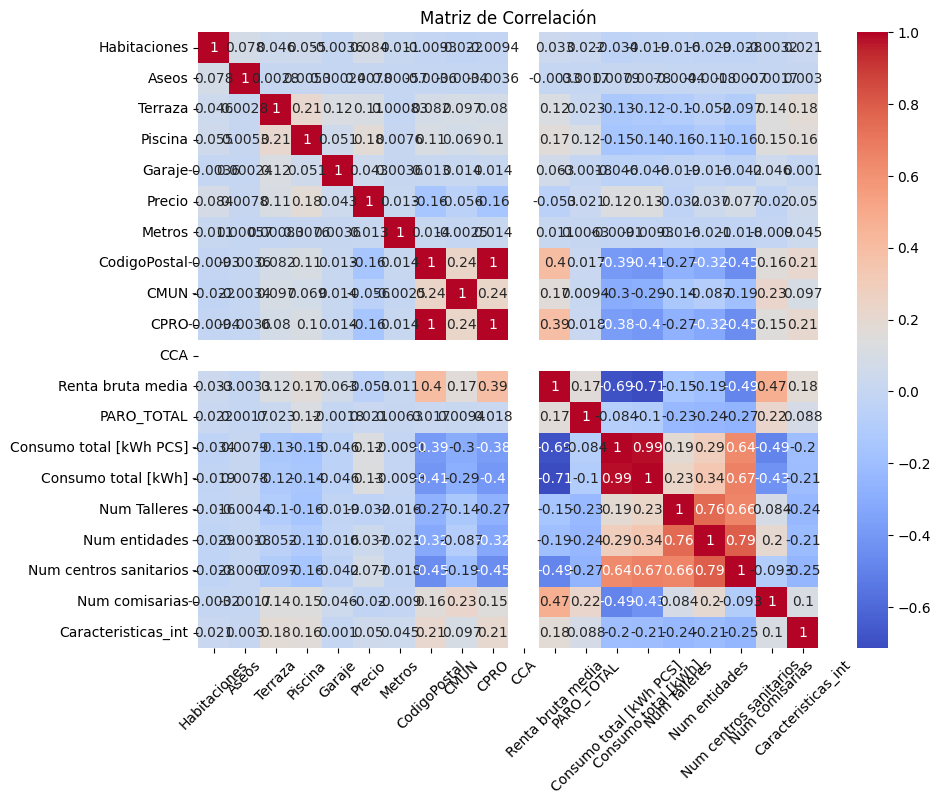

In [217]:
columnas_seleccionadas = ['Habitaciones', 'Aseos', 'Terraza',
       'Piscina', 'Garaje', 'Precio', 'Metros', 'CodigoPostal',
       'CMUN', 'CPRO', 'CCA', 'Renta bruta media', 'PARO_TOTAL',
       'Consumo total [kWh PCS]', 'Consumo total [kWh]', 'Num Talleres',
       'Num entidades', 'Num centros sanitarios', 'Num comisarias', 'Caracteristicas_int']

# Calcular la matriz de correlación entre las columnas seleccionadas
matriz_correlacion = df_final[columnas_seleccionadas].corr()

plt.figure(figsize=(10, 8))
# Crear un mapa de calor utilizando seaborn
sns.heatmap(matriz_correlacion, annot=True, cmap="coolwarm")

# Ajustar las etiquetas de los ejes
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Añadir un título
plt.title("Matriz de Correlación")

# Mostrar el mapa de calor
plt.show()

### 3.2 Gráficos exploratorios

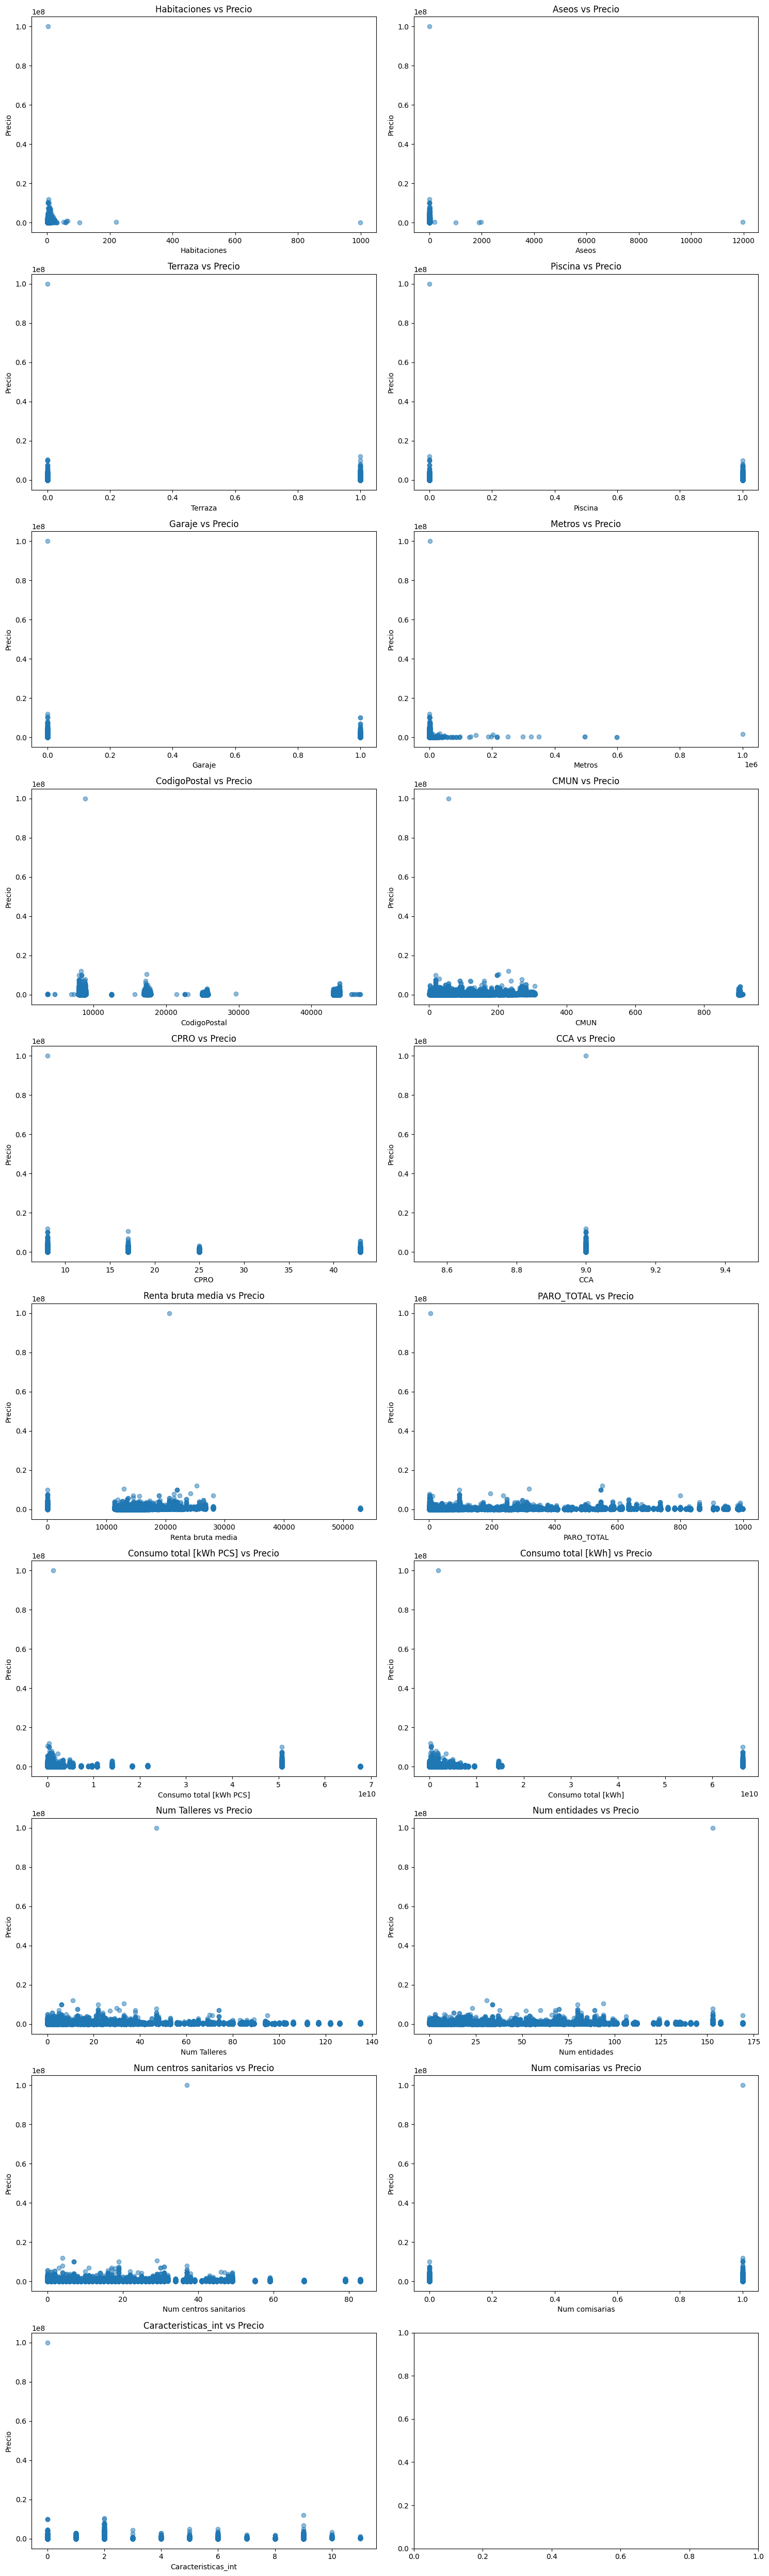

In [218]:
columnas_seleccionadas = ['Habitaciones', 'Aseos', 'Terraza',
       'Piscina', 'Garaje', 'Metros', 'CodigoPostal',
       'CMUN', 'CPRO', 'CCA', 'Renta bruta media', 'PARO_TOTAL',
       'Consumo total [kWh PCS]', 'Consumo total [kWh]', 'Num Talleres',
       'Num entidades', 'Num centros sanitarios', 'Num comisarias', 'Caracteristicas_int']

num_filas = len(columnas_seleccionadas) // 2 + len(columnas_seleccionadas) % 2
fig, axs = plt.subplots(num_filas, 2, figsize=(15, 5*num_filas))
axs = axs.flatten()

# Iterar sobre cada columna y crear el gráfico de dispersión
for i, columna in enumerate(columnas_seleccionadas):
    axs[i].scatter(df_final[columna], df_final['Precio'], alpha=0.5)
    axs[i].set_title(f'{columna} vs Precio')
    axs[i].set_xlabel(columna)
    axs[i].set_ylabel('Precio')

# Ajustar el espaciado entre subplots y mostrar el gráfico
plt.tight_layout()
plt.show()

## 4. Eliminación de outliers

In [219]:
df_final[df_final["Precio"]>50000000]

Unnamed: 0       Fecha           ID  \
44611    1971136  15/11/2021  161836653.0   

                                                     URL   ID_Cliente  \
44611  https://www.fotocasa.es/es/comprar/vivienda/ca...  9,20277E+12   

                                             URL_Cliente Inmueble  \
44611  https://www.fotocasa.es/es/comprar/inmuebles/e...     Flat   

      Caracteristicas  Habitaciones  Aseos  Terraza  Piscina  Garaje  \
44611            Flat           4.0    2.0      0.0      0.0     0.0   

            Precio  Metros Relacion  CodigoPostal    Latitud Longitud  \
44611  100000000.0  1000.0   100000        8860.0  4.127.604  198.871   

       Precision  CMUN  CPRO  CCA     CUDIS       NPRO       NCA  \
44611        1.0  56.0   8.0  9.0  805605.0  Barcelona  Cataluña   

                NMUN  Renta bruta media  PARO_TOTAL  Consumo total [kWh PCS]  \
44611  castelldefels            20597.0       3.769             1.262669e+09   

       Consumo total [kWh]  Num Talleres  Num entidades  \
44611         1.854162e+09          47.0          153.0   

       Num centros sanitarios  Num comisarias  Caracteristicas_int  
44611                    37.0             1.0                    0

In [220]:
umbral_precio = 50000000
df_final = df_final[(df_final['Precio'] < umbral_precio)]

In [221]:
df_final[df_final['Habitaciones']>30]

Unnamed: 0       Fecha           ID  \
8601     2387145  18/12/2021  162139215.0   
11249    2440144  26/11/2021  161943566.0   
20772     328927  23/09/2021  161345615.0   
30281     337569  13/01/2022  162313443.0   
34087    2171157  28/12/2021  162207136.0   
59107     714117  12/09/2021  161228762.0   
59135    1926109  11/09/2021  161228762.0   
61164      27463  08/09/2021  160801106.0   
70691      41089  08/09/2021  157876135.0   
72388    1729912  05/09/2021  157876135.0   
81847    1723751  05/09/2021  159836793.0   

                                                     URL   ID_Cliente  \
8601   https://www.fotocasa.es/es/comprar/vivienda/ba...  9,20276E+12   
11249  https://www.fotocasa.es/es/comprar/vivienda/ba...  9,20275E+12   
20772  https://www.fotocasa.es/es/comprar/vivienda/ba...  9,20276E+12   
30281  https://www.fotocasa.es/es/comprar/vivienda/sa...  9,20277E+12   
34087  https://www.fotocasa.es/es/comprar/vivienda/ar...  9,20276E+12   
59107  https://www.fotocasa.es/es/comprar/vivienda/be...  9,20275E+12   
59135  https://www.fotocasa.es/es/comprar/vivienda/be...  9,20275E+12   
61164  https://www.fotocasa.es/es/comprar/vivienda/al...  9,20275E+12   
70691  https://www.fotocasa.es/es/comprar/vivienda/la...  9,20277E+12   
72388  https://www.fotocasa.es/es/comprar/vivienda/la...  9,20277E+12   
81847  https://www.fotocasa.es/es/comprar/vivienda/ca...  9,20277E+12   

                                             URL_Cliente Inmueble  \
8601   https://www.fotocasa.es/es/inmobiliaria-la-cas...     Flat   
11249  https://www.fotocasa.es/es/inmobiliaria-la-cas...     Flat   
20772  https://www.fotocasa.es/es/inmobiliaria-la-cas...     Flat   
30281  https://www.fotocasa.es/es/inmobiliaria-isj-fi...     Flat   
34087  https://www.fotocasa.es/es/inmobiliaria-redwoo...     Flat   
59107  https://www.fotocasa.es/es/inmobiliaria-fincas...     Flat   
59135  https://www.fotocasa.es/es/inmobiliaria-fincas...     Flat   
61164  https://www.fotocasa.es/es/inmobiliaria-altami...     Flat   
70691  https://www.fotocasa.es/es/inmobiliaria-grup-i...     Flat   
72388  https://www.fotocasa.es/es/inmobiliaria-grup-i...     Flat   
81847  https://www.fotocasa.es/es/inmobiliaria-finque...     Flat   

         Caracteristicas  Habitaciones  Aseos  Terraza  Piscina  Garaje  \
8601                Flat         220.0    2.0      0.0      0.0     0.0   
11249               Flat          52.0    1.0      0.0      0.0     0.0   
20772               Flat          31.0    1.0      0.0      0.0     0.0   
30281  SemidetachedHouse          65.0    3.0      1.0      0.0     1.0   
34087               Flat         999.0  999.0      1.0      0.0     0.0   
59107       House_Chalet          31.0    1.0      0.0      1.0     1.0   
59135       House_Chalet          31.0    1.0      0.0      1.0     1.0   
61164               Flat         103.0    2.0      1.0      0.0     0.0   
70691               Flat          60.0    1.0      0.0      0.0     0.0   
72388               Flat          60.0    1.0      0.0      0.0     0.0   
81847       House_Chalet          63.0    3.0      1.0      0.0     0.0   

         Precio  Metros             Relacion  CodigoPostal    Latitud  \
8601   388000.0   110.0  352.727.272.727.273        8025.0  4.141.102   
11249  259500.0    52.0  499.038.461.538.462        8025.0     41.405   
20772  133000.0    76.0                 1750        8020.0  4.142.219   
30281  850000.0   220.0  386.363.636.363.636        8960.0  4.138.415   
34087   69500.0    67.0  103.731.343.283.582       17401.0  4.181.653   
59107  159900.0   135.0  118.444.444.444.444       43700.0  4.121.768   
59135  159900.0   135.0  118.444.444.444.444       43700.0  4.121.768   
61164   75000.0    96.0               781.25       25100.0  4.173.323   
70691   35500.0    77.0  461.038.961.038.961       43560.0  4.063.324   
72388   35500.0    77.0  461.038.961.038.961       43560.0  4.063.324   
81847  770000.0   302.0  254.966.887.417.219       4385

In [222]:
umbral_habitaciones = 30
df_final = df_final[(df_final['Habitaciones'] < umbral_habitaciones)]

In [223]:
df_final[df_final['Aseos']>20]

Unnamed: 0       Fecha           ID  \
32          3101  28/01/2022  162445732.0   
4411      278688  13/01/2022  162316884.0   
8253     2089150  20/12/2021  162155795.0   
14667    2949130  11/11/2021  161804651.0   
26285     673189  23/01/2022  162388897.0   
88360    2425941  05/09/2021  160632182.0   

                                                     URL   ID_Cliente  \
32     https://www.fotocasa.es/es/comprar/vivienda/ba...  9,20275E+12   
4411   https://www.fotocasa.es/es/comprar/vivienda/ba...  9,43003E+11   
8253   https://www.fotocasa.es/es/comprar/vivienda/ba...  9,20277E+12   
14667  https://www.fotocasa.es/es/comprar/vivienda/ba...  9,20277E+12   
26285  https://www.fotocasa.es/es/comprar/vivienda/la...  9,20275E+12   
88360  https://www.fotocasa.es/es/comprar/vivienda/el...  9,20276E+12   

                                             URL_Cliente Inmueble  \
32     https://www.fotocasa.es/es/inmobiliaria-centur...     Flat   
4411   https://www.fotocasa.es/es/inmobiliaria-finque...     Flat   
8253   https://www.fotocasa.es/es/inmobiliaria-la-cas...     Flat   
14667  https://www.fotocasa.es/es/inmobiliaria-euro-h...     Flat   
26285  https://www.fotocasa.es/es/inmobiliaria-garrot...     Flat   
88360  https://www.fotocasa.es/es/inmobiliaria-inmo-b...     Flat   

      Caracteristicas  Habitaciones    Aseos  Terraza  Piscina  Garaje  \
32               Flat           2.0    187.0      0.0      0.0     0.0   
4411            Study           1.0   1901.0      0.0      0.0     0.0   
8253             Flat           3.0  11963.0      0.0      0.0     0.0   
14667            Flat           3.0   1980.0      1.0      0.0     0.0   
26285    House_Chalet           8.0     24.0      0.0      0.0     0.0   
88360    House_Chalet           4.0     36.0      1.0      1.0     0.0   

         Precio  Metros             Relacion  CodigoPostal    Latitud  \
32     295000.0    78.0  378.205.128.205.128        8025.0  4.140.572   
4411   149000.0    37.0  402.702.702.702.703        8001.0  4.137.742   
8253   202000.0    91.0  221.978.021.978.022        8019.0  4.141.494   
14667  215000.0    52.0  413.461.538.461.538        8004.0  4.137.125   
26285  220000.0   780.0  282.051.282.051.282       17176.0  4.211.836   
88360  245900.0   155.0  158.645.161.290.323       43764.0    411.757   

        Longitud  Precision   CMUN  CPRO  CCA      CUDIS       NPRO       NCA  \
32       217.514        1.0   19.0   8.0  9.0   801902.0  Barcelona  Cataluña   
4411   2.167.362        0.0   19.0   8.0  9.0   801901.0  Barcelona  Cataluña   
8253   2.214.494        0.0   19.0   8.0  9.0   801910.0  Barcelona  Cataluña   
14667  2.164.709        0.0   19.0   8.0  9.0   801903.0  Barcelona  Cataluña   
26285  2.459.341        0.0  207.0  17.0  9.0  1720701.0     Girona  Cataluña   
88360  1.327.292        0.0   43.0  43.0  9.0  4304301.0  Tarragona  Cataluña   

                    NMUN  Renta bruta media  PARO_TOTAL  \
32             barcelona             34.626      96.227   
4411           barcelona             23.464      96.227   
8253           barcelona             37.387      96.227   
14667          barcelona             27.518      96.227   
26285  vall d'en bas, la          19175.000      83.000   
88360        catllar, el          18594.000     229.000   

       Consumo total [kWh PCS]  Consumo total [kWh]  Num Talleres  \
32                5.067863e+10         6.642939e+10          86.0   
4411              5.067863e+10         6.642939e+10          14.0   
8253              5.067863e+10         6.642939e+10          24.0   
14667             5.067863e+10         6.642939e+10          44.0   
26285             9.864953e+06         3.091201e+08           4.0   
88360             1.030406e+07         1.816071e+08           1.0   

       Num entidades  Num centros sanitarios  Num comisarias  \
32              84.0                    59.0             0.0   
4411            72.0                    38.0             0.0   
8253 

In [224]:
umbral_aseos = 20
df_final = df_final[(df_final['Aseos'] < umbral_aseos)]

In [225]:
df_final[df_final['Metros']>100000]

Unnamed: 0       Fecha           ID  \
2966     3322105  21/01/2022  162376362.0   
7524     1746165  23/12/2021  162189357.0   
7611     1989151  23/12/2021  162187282.0   
12027    2208137  20/11/2021  161883813.0   
24972    2975100  25/01/2022  162407566.0   
34362    1810170  27/12/2021  162200306.0   
47088     377036  11/11/2021  161795891.0   
55037    2696119  29/09/2021  161393579.0   
63527      29967  08/09/2021  160994635.0   
66814      33622  08/09/2021  159762701.0   
79219     323301  05/09/2021  156444685.0   
81082    2023491  05/09/2021  160994635.0   
82572     302394  05/09/2021  160401783.0   
82597    2524001  05/09/2021  160722214.0   

                                                     URL   ID_Cliente  \
2966   https://www.fotocasa.es/es/comprar/vivienda/l'...  9,20275E+12   
7524   https://www.fotocasa.es/es/comprar/vivienda/ba...  9,20276E+12   
7611   https://www.fotocasa.es/es/comprar/vivienda/ba...  9,20275E+12   
12027  https://www.fotocasa.es/es/comprar/vivienda/ba...  9,20276E+12   
24972  https://www.fotocasa.es/es/comprar/vivienda/ag...  9,20277E+12   
34362  https://www.fotocasa.es/es/comprar/vivienda/ll...  9,20277E+12   
47088  https://www.fotocasa.es/es/comprar/vivienda/pa...  9,20277E+12   
55037  https://www.fotocasa.es/es/comprar/vivienda/ar...  9,20276E+12   
63527  https://www.fotocasa.es/es/comprar/vivienda/bo...  9,20276E+12   
66814  https://www.fotocasa.es/es/comprar/vivienda/to...  9,20277E+12   
79219  https://www.fotocasa.es/es/comprar/vivienda/se...  9,20275E+12   
81082  https://www.fotocasa.es/es/comprar/vivienda/bo...  9,20276E+12   
82572  https://www.fotocasa.es/es/comprar/vivienda/re...  9,20276E+12   
82597  https://www.fotocasa.es/es/comprar/vivienda/la...  9,20277E+12   

                                             URL_Cliente Inmueble  \
2966   https://www.fotocasa.es/es/inmobiliaria-punt-s...     Flat   
7524   https://www.fotocasa.es/es/inmobiliaria-la-cas...     Flat   
7611   https://www.fotocasa.es/es/inmobiliaria-centur...     Flat   
12027  https://www.fotocasa.es/es/inmobiliaria-teva-c...     Flat   
24972  https://www.fotocasa.es/es/inmobiliaria-immost...     Flat   
34362  https://www.fotocasa.es/es/inmobiliaria-toro-i...     Flat   
47088  https://www.fotocasa.es/es/inmobiliaria-finque...     Flat   
55037  https://www.fotocasa.es/es/inmobiliaria-casa-x...     Flat   
63527  https://www.fotocasa.es/es/inmobiliaria-cm-fin...     Flat   
66814  https://www.fotocasa.es/es/inmobiliaria-vicenc...     Flat   
79219  https://www.fotocasa.es/es/inmobiliaria-juanma...     Flat   
81082  https://www.fotocasa.es/es/inmobiliaria-cm-fin...     Flat   
82572  https://www.fotocasa.es/es/inmobiliaria-unik-e...     Flat   
82597  https://www.fotocasa.es/es/inmobiliaria-eurofi...     Flat   

      Caracteristicas  Habitaciones  Aseos  Terraza  Piscina  Garaje  \
2966            Attic           2.0    1.0      0.0      0.0     0.0   
7524             Flat           3.0    1.0      0.0      0.0     0.0   
7611             Flat           3.0    1.0      1.0      0.0     0.0   
12027            Flat           3.0    1.0      0.0      0.0     0.0   
24972    CountryHouse           9.0    7.0      1.0      1.0     1.0   
34362    CountryHouse           6.0    3.0      1.0      0.0     0.0   
47088    House_Chalet           4.0    2.0      0.0      0.0     0.0   
55037    House_Chalet           4.0    3.0      1.0      0.0     0.0   
63527    House_Chalet           7.0    3.0      1.0      0.0     0.0   
66814          Duplex           4.0    3.0      1.0      0.0     1.0   
79219    CountryHouse           2.0    1.0      1.0      1.0     0.0   
81082    House_Chalet           7.0    3.0      1.0      0.0     0.0   
82572    CountryHouse          10.0    5.0      1.0      0.0     0.0   
82597    CountryHouse           2.0    1.0      0.0      0.0     0.0   

          Precio     Metros             Relacion  CodigoPostal    Latitud  \
2966    127000.0   127000.0             

In [226]:
umbral_metros = 100000
df_final = df_final[(df_final['Metros'] < umbral_metros)]

In [227]:
#Eliminación de valores nulos
df_final = df_final.dropna()
df_final

Unnamed: 0       Fecha           ID  \
0           3002  28/01/2022  162446537.0   
1           3011  28/01/2022  162446483.0   
2           3012  28/01/2022  162446468.0   
3           3026  28/01/2022  162446181.0   
4           3028  28/01/2022  162446327.0   
...          ...         ...          ...   
89171  2760114.0  07/09/2021  160692350.0   
89172  2761114.0  07/09/2021  160943133.0   
89173  2763114.0  07/09/2021  160458395.0   
89174  2765114.0  07/09/2021  156802611.0   
89175  2781111.0  07/09/2021  146301070.0   

                                                     URL   ID_Cliente  \
0      https://www.fotocasa.es/es/comprar/vivienda/sa...  9,20276E+12   
1      https://www.fotocasa.es/es/comprar/vivienda/sa...  9,20277E+12   
2      https://www.fotocasa.es/es/comprar/vivienda/ba...  9,20275E+12   
3      https://www.fotocasa.es/es/comprar/vivienda/ba...  9,20277E+12   
4      https://www.fotocasa.es/es/comprar/vivienda/ba...  9,20275E+12   
...                                                  ...          ...   
89171  https://www.fotocasa.es/es/alquiler/vivienda/l...  9,20276E+12   
89172  https://www.fotocasa.es/es/alquiler/vivienda/a...  9,20276E+12   
89173  https://www.fotocasa.es/es/alquiler/vivienda/l...  9,20276E+12   
89174  https://www.fotocasa.es/es/alquiler/vivienda/l...  9,20276E+12   
89175  https://www.fotocasa.es/es/alquiler/vivienda/l...  9,20275E+12   

                                             URL_Cliente Inmueble  \
0      https://www.fotocasa.es/es/inmobiliaria-inmobi...     Flat   
1      https://www.fotocasa.es/es/inmobiliaria-house-...     Flat   
2      https://www.fotocasa.es/es/inmobiliaria-nova-u...     Flat   
3      https://www.fotocasa.es/es/inmobiliaria-monica...     Flat   
4      https://www.fotocasa.es/es/inmobiliaria-sans-s...     Flat   
...                                                  ...      ...   
89171  https://www.fotocasa.es/es/inmobiliaria-inmogi...     Flat   
89172  https://www.fotocasa.es/es/inmobiliaria-vivend...     Flat   
89173  https://www.fotocasa.es/es/inmobiliaria-inmogi...     Flat   
89174  https://www.fotocasa.es/es/inmobiliaria-vivend...     Flat   
89175  https://www.fotocasa.es/es/inmobiliaria-manel-...     Flat   

      Caracteristicas  Habitaciones  Aseos  Terraza  Piscina  Garaje  \
0                Flat           4.0    3.0      0.0      0.0     0.0   
1                Flat           2.0    2.0      0.0      0.0     0.0   
2                Flat           4.0    2.0      1.0      0.0     0.0   
3                Flat           2.0    1.0      0.0      0.0     0.0   
4                Flat           4.0    2.0      0.0      0.0     0.0   
...               ...           ...    ...      ...      ...     ...   
89171            Flat           4.0    1.0      0.0      0.0     0.0   
89172       Apartment           2.0    1.0      1.0      0.0     0.0   
89173            Flat           3.0    1.0      1.0      0.0     0.0   
89174            Flat           4.0    1.0      0.0      0.0     0.0   
89175            Flat           5.0    2.0      0.0      0.0     0.0   

         Precio  Metros             Relacion  CodigoPostal    Latitud  \
0      477000.0   170.0  280.588.235.294.118        8201.0  4.155.113   
1      183000.0    70.0  261.428.571.428.571        8205.0  4.153.479   
2      400000.0    81.0  493.827.160.493.827        8013.0  4.139.738   
3      265000.0    65.0  407.692.307.692.308        8020.0  4.141.773   
4      325000.0    99.0  328.282.828.282.828        8041.0    414.237   
...         ...     ...                  ...           ...        ...   
89171     450.0    90.0                    5       25003.0  4.161.381   
89172     450.0    55.0  818.181.818.181.818       25660.0    416.445   
89173     600.0    87.0  689.655.172.413.793       25008.0  4.162.532   
89174     750.0   100.0                  7.5       25006.0  4.161.827   
89175     800.0   130.0  615.384.615.384.615       25008.0    416.227   

        Longitud 

### 4.1 Análisis exploratorio post eliminación de outliers

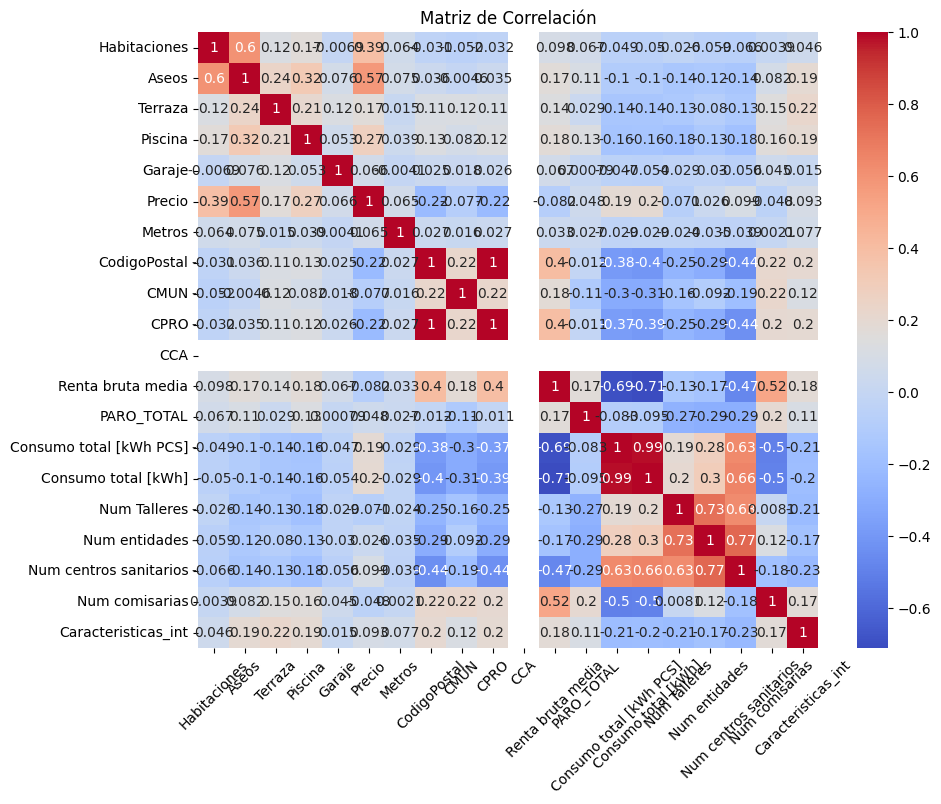

In [228]:
columnas_seleccionadas = ['Habitaciones', 'Aseos', 'Terraza',
       'Piscina', 'Garaje', 'Precio', 'Metros', 'CodigoPostal',
       'CMUN', 'CPRO', 'CCA', 'Renta bruta media', 'PARO_TOTAL',
       'Consumo total [kWh PCS]', 'Consumo total [kWh]', 'Num Talleres',
       'Num entidades', 'Num centros sanitarios', 'Num comisarias', 'Caracteristicas_int']

# Calcular la matriz de correlación entre las columnas seleccionadas
matriz_correlacion = df_final[columnas_seleccionadas].corr()

plt.figure(figsize=(10, 8))
# Crear un mapa de calor utilizando seaborn
sns.heatmap(matriz_correlacion, annot=True, cmap="coolwarm")

# Ajustar las etiquetas de los ejes
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Añadir un título
plt.title("Matriz de Correlación")

# Mostrar el mapa de calor
plt.show()

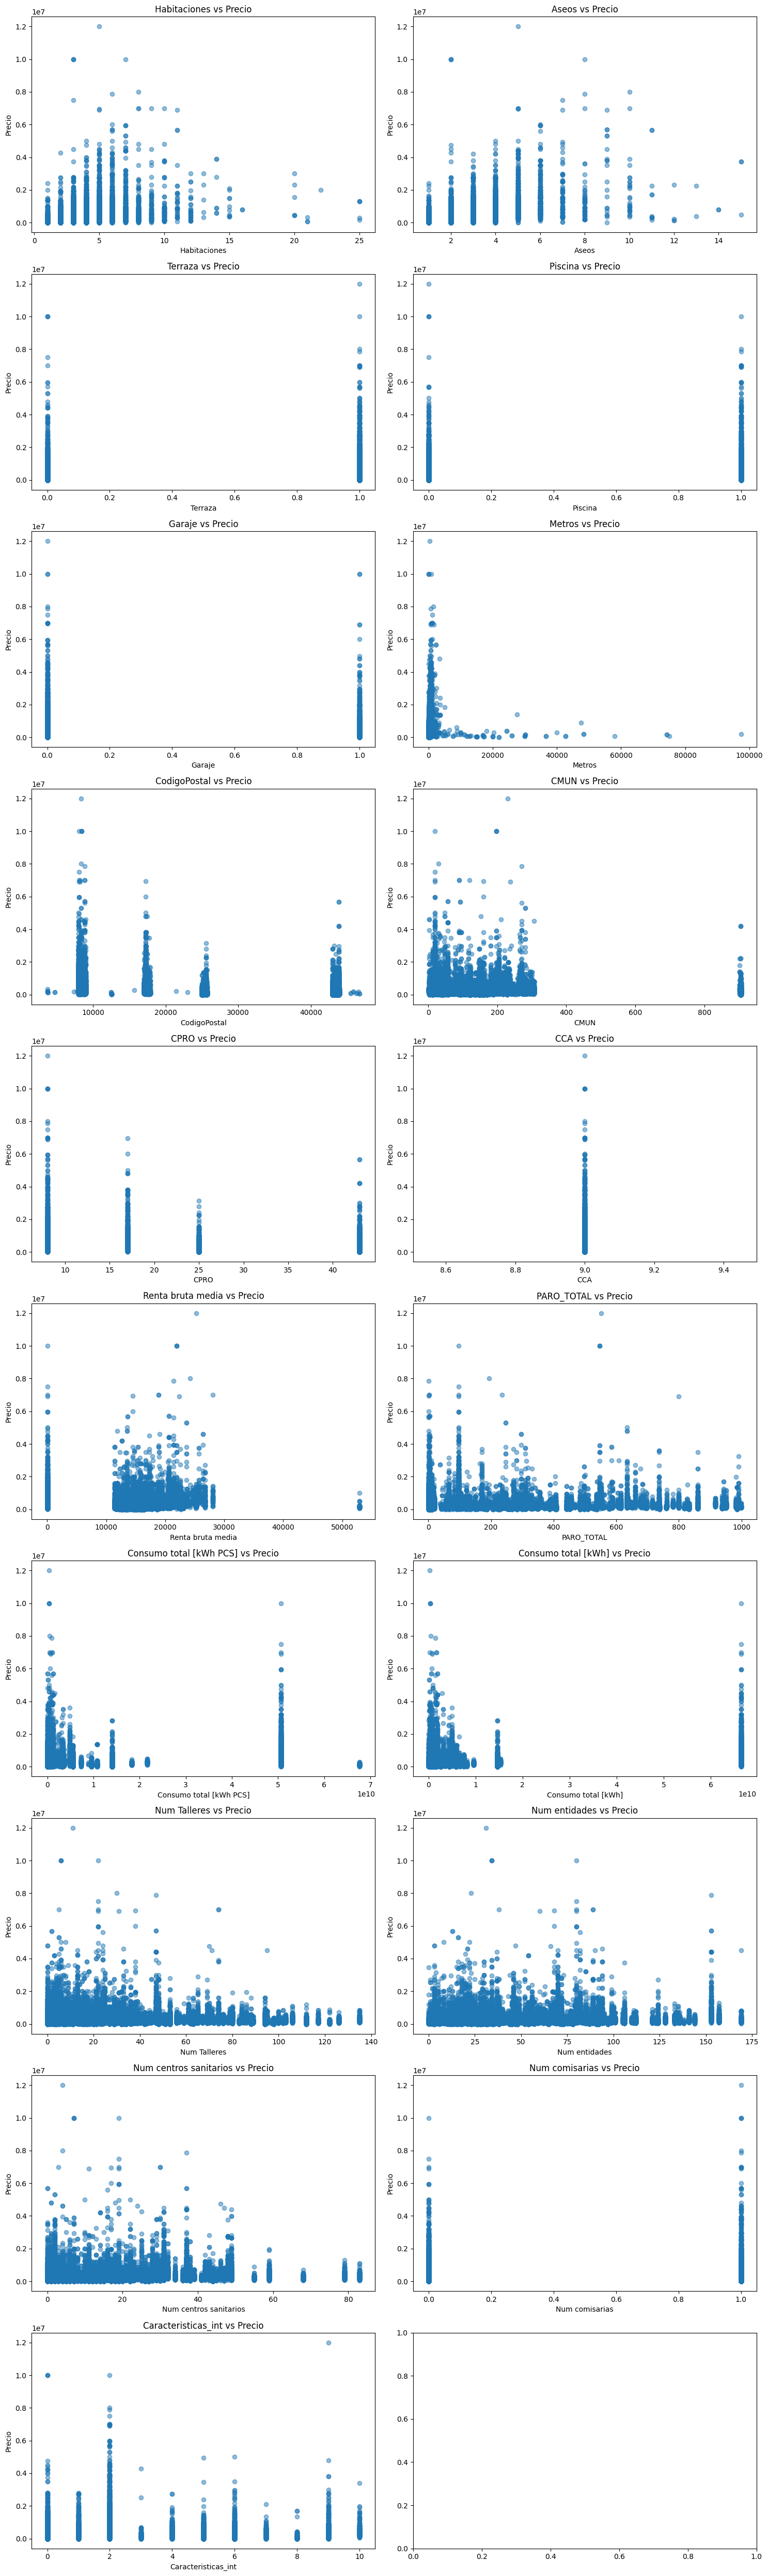

In [229]:
columnas_seleccionadas = ['Habitaciones', 'Aseos', 'Terraza',
       'Piscina', 'Garaje', 'Metros', 'CodigoPostal',
       'CMUN', 'CPRO', 'CCA', 'Renta bruta media', 'PARO_TOTAL',
       'Consumo total [kWh PCS]', 'Consumo total [kWh]', 'Num Talleres',
       'Num entidades', 'Num centros sanitarios', 'Num comisarias', 'Caracteristicas_int']

num_filas = len(columnas_seleccionadas) // 2 + len(columnas_seleccionadas) % 2
fig, axs = plt.subplots(num_filas, 2, figsize=(15, 5*num_filas))
axs = axs.flatten()

# Iterar sobre cada columna y crear el gráfico de dispersión
for i, columna in enumerate(columnas_seleccionadas):
    axs[i].scatter(df_final[columna], df_final['Precio'], alpha=0.5)
    axs[i].set_title(f'{columna} vs Precio')
    axs[i].set_xlabel(columna)
    axs[i].set_ylabel('Precio')

# Ajustar el espaciado entre subplots y mostrar el gráfico
plt.tight_layout()
plt.show()

In [230]:
columnas_con_nan = df_final.columns[df_final.isnull().any()].tolist()

print("Columnas con valores NaN:", columnas_con_nan)

Columnas con valores NaN: []


In [231]:
numero_nan_por_columna = df_final.isnull().sum()

print("Número de filas con NaN por columna:")
print(numero_nan_por_columna)

Número de filas con NaN por columna:
Unnamed: 0                 0
Fecha                      0
ID                         0
URL                        0
ID_Cliente                 0
URL_Cliente                0
Inmueble                   0
Caracteristicas            0
Habitaciones               0
Aseos                      0
Terraza                    0
Piscina                    0
Garaje                     0
Precio                     0
Metros                     0
Relacion                   0
CodigoPostal               0
Latitud                    0
Longitud                   0
Precision                  0
CMUN                       0
CPRO                       0
CCA                        0
CUDIS                      0
NPRO                       0
NCA                        0
NMUN                       0
Renta bruta media          0
PARO_TOTAL                 0
Consumo total [kWh PCS]    0
Consumo total [kWh]        0
Num Talleres               0
Num entidades              0
Num ce

In [232]:
subset_con_nan = df_final.loc[df_final['Renta bruta media'].isnull()]

len(subset_con_nan["NMUN"].unique())

0

In [233]:
subset_con_nan = df_final.loc[df_final['PARO_TOTAL'].isnull()]

len(subset_con_nan["NMUN"].unique())

0

In [234]:
df_final.shape[0]

77308

In [235]:
df_final.columns

Index(['Unnamed: 0', 'Fecha', 'ID', 'URL', 'ID_Cliente', 'URL_Cliente',
       'Inmueble', 'Caracteristicas', 'Habitaciones', 'Aseos', 'Terraza',
       'Piscina', 'Garaje', 'Precio', 'Metros', 'Relacion', 'CodigoPostal',
       'Latitud', 'Longitud', 'Precision', 'CMUN', 'CPRO', 'CCA', 'CUDIS',
       'NPRO', 'NCA', 'NMUN', 'Renta bruta media', 'PARO_TOTAL',
       'Consumo total [kWh PCS]', 'Consumo total [kWh]', 'Num Talleres',
       'Num entidades', 'Num centros sanitarios', 'Num comisarias',
       'Caracteristicas_int'],
      dtype='object')

### 4.5 Slección de variables

In [236]:
"""def backward_elimination(data, target, significance_level=0.05):
    features = data.columns.tolist()
    while len(features) > 0:
        model = sm.OLS(target, sm.add_constant(pd.DataFrame(data[features]))).fit()
        max_p_value = model.pvalues.max()
        if max_p_value >= significance_level:
            excluded_feature = model.pvalues.idxmax()
            features.remove(excluded_feature)
        else:
            break
    return features
# Separar la variable dependiente y las independientes
df_num = df_cat.dropna()
df_num = df_num.select_dtypes(include=['float64', 'int64'])
X = df_num.drop(columns=['Precio'])
y = df_num['Precio']
# Aplicar la selección hacia atrás
selected_features = backward_elimination(X, y)
print('Selected features:', selected_features)"""

"def backward_elimination(data, target, significance_level=0.05):\n    features = data.columns.tolist()\n    while len(features) > 0:\n        model = sm.OLS(target, sm.add_constant(pd.DataFrame(data[features]))).fit()\n        max_p_value = model.pvalues.max()\n        if max_p_value >= significance_level:\n            excluded_feature = model.pvalues.idxmax()\n            features.remove(excluded_feature)\n        else:\n            break\n    return features\n# Separar la variable dependiente y las independientes\ndf_num = df_cat.dropna()\ndf_num = df_num.select_dtypes(include=['float64', 'int64'])\nX = df_num.drop(columns=['Precio'])\ny = df_num['Precio']\n# Aplicar la selección hacia atrás\nselected_features = backward_elimination(X, y)\nprint('Selected features:', selected_features)"

In [237]:
df_num = df_cat.dropna()
df_num = df_num.select_dtypes(include=['float64', 'int64'])
X = df_num.drop(columns=['Precio'])
y = df_num['Precio']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Ajustar el modelo Lasso
lasso = LassoCV(cv=5).fit(X_scaled, y)

# Seleccionar variables no eliminadas por Lasso
selected_features = X.columns[(lasso.coef_ != 0)].tolist()
print('Selected features:', selected_features)

Selected features: ['Habitaciones', 'Terraza', 'Piscina', 'CUDIS']


Variables mergeadas

In [238]:
df_final_num = df_final.select_dtypes(include=['float64', 'int64'])
X_final = df_final_num.drop(columns=['Precio'])
y_final = df_final_num['Precio']

scaler = StandardScaler()
X_final_scaled = scaler.fit_transform(X_final)

# Ajustar el modelo Lasso
lasso = LassoCV(cv=5).fit(X_final_scaled, y_final)

# Seleccionar variables no eliminadas por Lasso
selected_features_en = X_final.columns[(lasso.coef_ != 0)].tolist()
print('Selected features:', selected_features_en)

Selected features: ['ID', 'Habitaciones', 'Aseos', 'Terraza', 'Piscina', 'Garaje', 'Metros', 'CodigoPostal', 'Precision', 'CPRO', 'Renta bruta media', 'PARO_TOTAL', 'Consumo total [kWh]', 'Num Talleres', 'Num entidades', 'Num centros sanitarios', 'Num comisarias', 'Caracteristicas_int']


## 5. Modelos

### 5.0 División conjunto de entrenamiento y conjunto de test

In [239]:
X = df_final[selected_features]
y = df_final['Precio']

# Dividir datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_en = df_final[selected_features_en]
X_train_en, X_test_en, y_train_en, y_test_en = train_test_split(X_en, y, test_size=0.2, random_state=42)

In [240]:
X.head()

Habitaciones  Terraza  Piscina     CUDIS
0           4.0      0.0      0.0  818701.0
1           2.0      0.0      0.0  818705.0
2           4.0      1.0      0.0  801902.0
3           2.0      0.0      0.0  801910.0
4           4.0      0.0      0.0  801907.0

### 5.1 Regresión Lineal

In [241]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

#### 5.1.1 Dataset original

In [242]:
# Inicializar y ajustar el modelo de regresión lineal
modeloRL = LinearRegression()
modeloRL.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_predRL = modeloRL.predict(X_test)

# Evaluar el rendimiento del modelo
mse_rl = mean_squared_error(y_test, y_predRL)
mae_rl = mean_absolute_error(y_test, y_predRL)

r2_rl = r2_score(y_test, y_predRL)

scores = cross_val_score(modeloRL,X, y, cv=kf, scoring='neg_mean_squared_error')

print(scores)
print("Error cuadrático medio:", mse_rl)
print("MAE:", mae_rl)
print("R2:", r2_rl)

[-6.95176385e+10 -8.38130653e+10 -7.37418032e+10 -6.06363855e+10
 -6.91682312e+10]
Error cuadrático medio: 69517638453.673
MAE: 133114.22198725896
R2: 0.2611850715791041


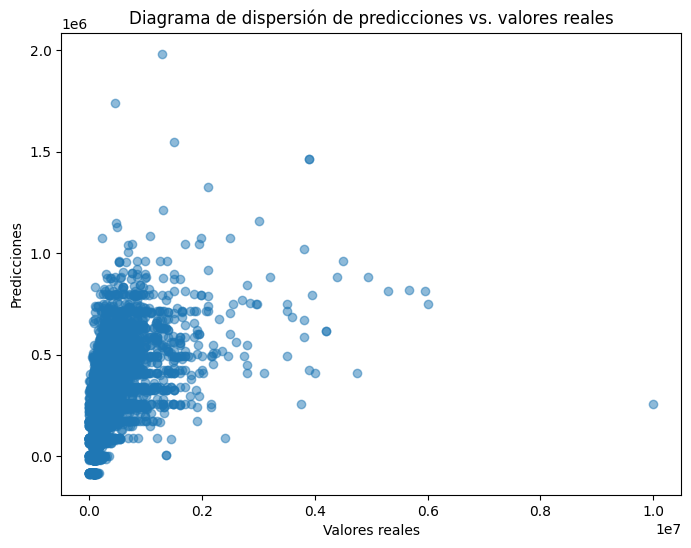

In [243]:
# Diagrama de dispersión de predicciones vs. valores reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_predRL, alpha=0.5)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Diagrama de dispersión de predicciones vs. valores reales')
plt.show()

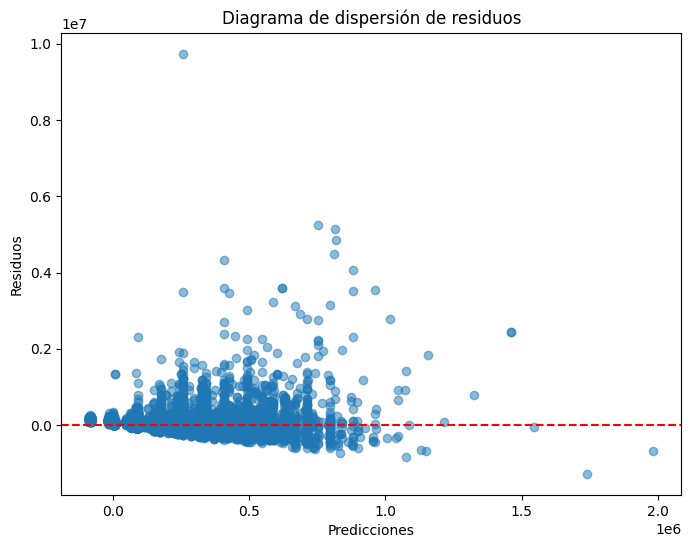

In [244]:
# Diagrama de dispersión de residuos
residuos = y_test - y_predRL
plt.figure(figsize=(8, 6))
plt.scatter(y_predRL, residuos, alpha=0.5)
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Diagrama de dispersión de residuos')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

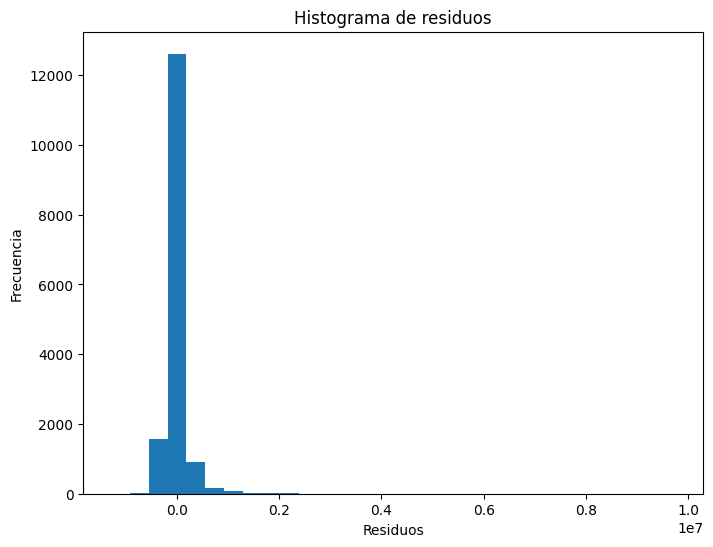

In [245]:
# Histograma de residuos
plt.figure(figsize=(8, 6))
plt.hist(residuos, bins=30)
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de residuos')
plt.show()

In [246]:
"""cols= ['Habitaciones', 'Aseos', 'Terraza',
       'Piscina', 'Garaje', 'Precio', 'Metros', 'CodigoPostal',
       'CMUN', 'CPRO', 'CCA', 'Renta disponible media', 'PARO_TOTAL',
       'Consumo total [kWh PCS]', 'Consumo total [kWh]', 'Num Talleres',
       'Num entidades', 'Num centros sanitarios', 'Num comisarias', 'Caracteristicas_int']
registro_aleatorio = df_final.sample(n=1)
print(registro_aleatorio)
registro_aleatorio[cols]"""

"cols= ['Habitaciones', 'Aseos', 'Terraza',\n       'Piscina', 'Garaje', 'Precio', 'Metros', 'CodigoPostal',\n       'CMUN', 'CPRO', 'CCA', 'Renta disponible media', 'PARO_TOTAL',\n       'Consumo total [kWh PCS]', 'Consumo total [kWh]', 'Num Talleres',\n       'Num entidades', 'Num centros sanitarios', 'Num comisarias', 'Caracteristicas_int']\nregistro_aleatorio = df_final.sample(n=1)\nprint(registro_aleatorio)\nregistro_aleatorio[cols]"

In [247]:
"""registro = [[3.0,	2.0,	1.0,	0.0,	0.0,	110.0,	43882.0,	51.0,	43.0, 9.0,	14002.0,	1.176,	175864616.0,	350152377.0,	10.0,	20.0,	5.0, 0.0,	0]]
precio_predicho = modeloRL.predict(registro)

# Imprimir el precio predicho
print("El precio predicho de la vivienda es:", precio_predicho[0])"""

'registro = [[3.0,\t2.0,\t1.0,\t0.0,\t0.0,\t110.0,\t43882.0,\t51.0,\t43.0, 9.0,\t14002.0,\t1.176,\t175864616.0,\t350152377.0,\t10.0,\t20.0,\t5.0, 0.0,\t0]]\nprecio_predicho = modeloRL.predict(registro)\n\n# Imprimir el precio predicho\nprint("El precio predicho de la vivienda es:", precio_predicho[0])'

#### 5.1.2 Dataset enriquecido

In [248]:
# Inicializar y ajustar el modelo de regresión lineal
modeloRL = LinearRegression()
modeloRL.fit(X_train_en, y_train_en)

# Realizar predicciones en el conjunto de prueba
y_predRL = modeloRL.predict(X_test_en)

# Evaluar el rendimiento del modelo
mse_rl_en = mean_squared_error(y_test_en, y_predRL)
mae_rl_en = mean_absolute_error(y_test_en, y_predRL)

r2_rl_en = r2_score(y_test_en, y_predRL)

scores = cross_val_score(modeloRL, X_en, y, cv=kf, scoring='neg_mean_squared_error')

print(scores)
print("Error cuadrático medio:", mse_rl_en)
print("MAE:", mae_rl_en)
print("R2:", r2_rl_en)

[-5.19097035e+10 -6.26986265e+10 -5.52965814e+10 -4.56484084e+10
 -5.01702928e+10]
Error cuadrático medio: 51909703451.75223
MAE: 113318.66443547841
R2: 0.44831751058957436


### 5.2Regresión polinomial

#### 5.2.1 Dataset original

[-6.95176385e+10 -8.38130653e+10 -7.37418032e+10 -6.06363855e+10
 -6.91682312e+10]
Error cuadrático medio (Regresión Polinomial, grado 1): 69517638453.65572
MAE (Regresión Polinomial, grado 1): 133114.22198519492
R2 (Regresión Polinomial, grado 1): 0.26118507157928794
[-6.95176385e+10 -8.38130653e+10 -7.37418032e+10 -6.06363855e+10
 -6.91682312e+10]
Error cuadrático medio (Regresión Polinomial, grado 2): 65475941376.41256
MAE (Regresión Polinomial, grado 2): 122180.825208894
R2 (Regresión Polinomial, grado 2): 0.3041391506194192
[-6.95176385e+10 -8.38130653e+10 -7.37418032e+10 -6.06363855e+10
 -6.91682312e+10]
Error cuadrático medio (Regresión Polinomial, grado 3): 68035191817.441124
MAE (Regresión Polinomial, grado 3): 128223.27727235707
R2 (Regresión Polinomial, grado 3): 0.2769401192159041
[-6.95176385e+10 -8.38130653e+10 -7.37418032e+10 -6.06363855e+10
 -6.91682312e+10]
Error cuadrático medio (Regresión Polinomial, grado 4): 74673301589.36432
MAE (Regresión Polinomial, grado 4): 13

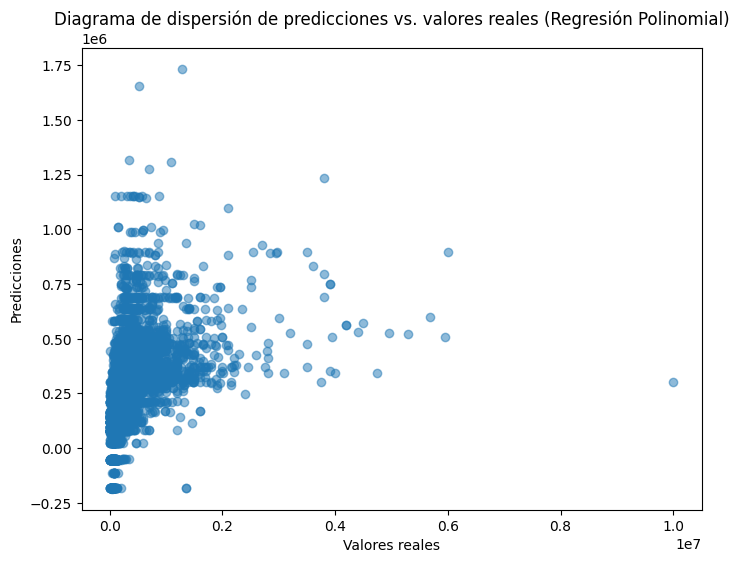

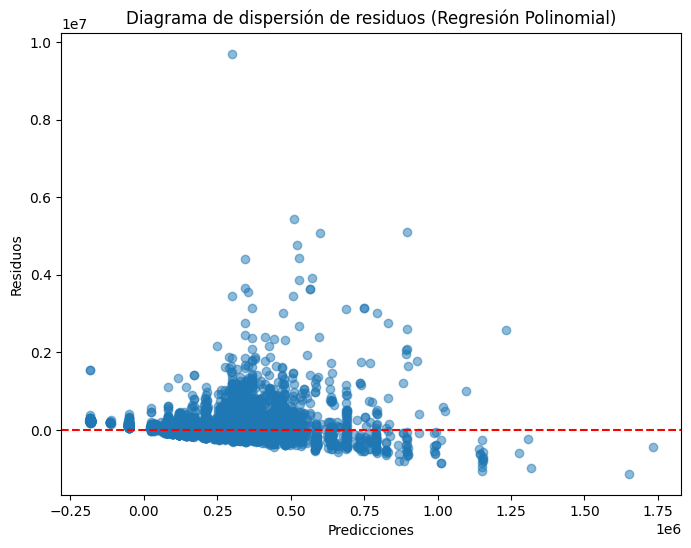

In [249]:
# Probar diferentes grados de polinomio
for degree in range(1, 5):
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Ajustar el modelo de regresión lineal con características polinomiales
    modelo_poly = LinearRegression()
    modelo_poly.fit(X_train_poly, y_train)

    # Realizar predicciones en el conjunto de prueba
    y_pred_poly = modelo_poly.predict(X_test_poly)

    # Evaluar el rendimiento del modelo
    mse_poly = mean_squared_error(y_test, y_pred_poly)
    mae_poly = mean_absolute_error(y_test, y_pred_poly)
    r2_poly = r2_score(y_test, y_pred_poly)
    
    scores = cross_val_score(modelo_poly, X, y, cv=kf, scoring='neg_mean_squared_error')

    print(scores)
    
    print(f"Error cuadrático medio (Regresión Polinomial, grado {degree}):", mse_poly)
    print(f"MAE (Regresión Polinomial, grado {degree}):", mae_poly)
    print(f"R2 (Regresión Polinomial, grado {degree}):", r2_poly)

# Diagrama de dispersión de predicciones vs. valores reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_poly, alpha=0.5)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Diagrama de dispersión de predicciones vs. valores reales (Regresión Polinomial)')
plt.show()

# Diagrama de dispersión de residuos
residuos_poly = y_test - y_pred_poly
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_poly, residuos_poly, alpha=0.5)
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Diagrama de dispersión de residuos (Regresión Polinomial)')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

#### 5.2.2 Dataset enriquecido

[-5.19097035e+10 -6.26986265e+10 -5.52965814e+10 -4.56484084e+10
 -5.01702928e+10]
Error cuadrático medio (Regresión Polinomial, grado 1): 51909703316.13048
MAE (Regresión Polinomial, grado 1): 113318.66157262138
R2 (Regresión Polinomial, grado 1): 0.4483175120309262
[-5.19097035e+10 -6.26986265e+10 -5.52965814e+10 -4.56484084e+10
 -5.01702928e+10]
Error cuadrático medio (Regresión Polinomial, grado 2): 48222901901.86255
MAE (Regresión Polinomial, grado 2): 103964.87714646789
R2 (Regresión Polinomial, grado 2): 0.4874998545784167
[-5.19097035e+10 -6.26986265e+10 -5.52965814e+10 -4.56484084e+10
 -5.01702928e+10]
Error cuadrático medio (Regresión Polinomial, grado 3): 141556789351.3893
MAE (Regresión Polinomial, grado 3): 222965.18691310985
R2 (Regresión Polinomial, grado 3): -0.5044278188741143
[-5.19097035e+10 -6.26986265e+10 -5.52965814e+10 -4.56484084e+10
 -5.01702928e+10]
Error cuadrático medio (Regresión Polinomial, grado 4): 74235213292.05554
MAE (Regresión Polinomial, grado 4): 1

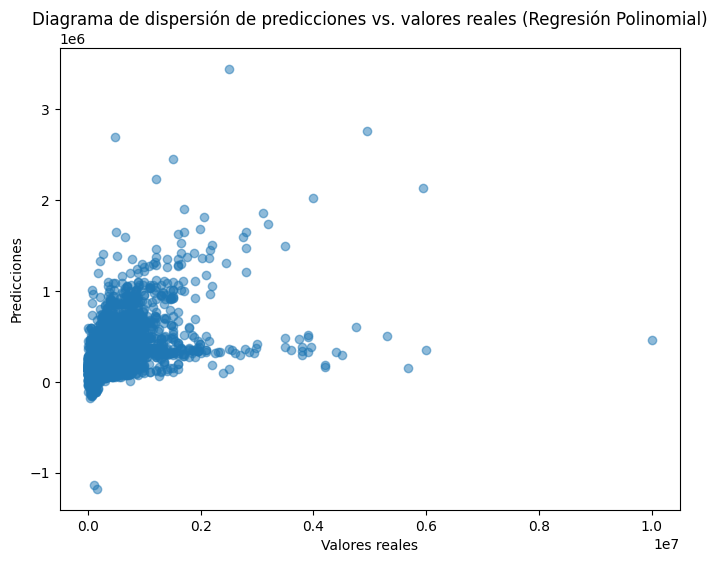

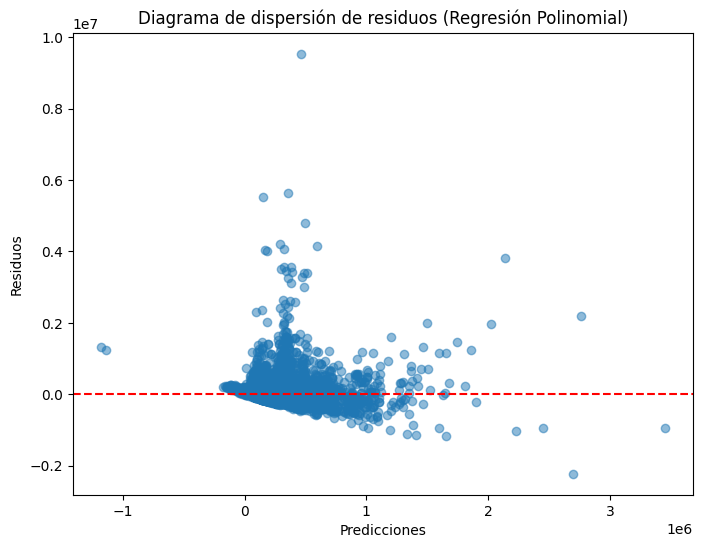

In [250]:
# Probar diferentes grados de polinomio
for degree in range(1, 5):
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train_en)
    X_test_poly = poly.transform(X_test_en)

    # Ajustar el modelo de regresión lineal con características polinomiales
    modelo_poly = LinearRegression()
    modelo_poly.fit(X_train_poly, y_train_en)

    # Realizar predicciones en el conjunto de prueba
    y_pred_poly = modelo_poly.predict(X_test_poly)

    # Evaluar el rendimiento del modelo
    mse_poly_en = mean_squared_error(y_test_en, y_pred_poly)
    mae_poly_en = mean_absolute_error(y_test_en, y_pred_poly)
    r2_poly_en = r2_score(y_test_en, y_pred_poly)
    
    scores = cross_val_score(modelo_poly, X_en, y, cv=kf, scoring='neg_mean_squared_error')

    print(scores)
    
    print(f"Error cuadrático medio (Regresión Polinomial, grado {degree}):", mse_poly_en)
    print(f"MAE (Regresión Polinomial, grado {degree}):", mae_poly_en)
    print(f"R2 (Regresión Polinomial, grado {degree}):", r2_poly_en)

# Diagrama de dispersión de predicciones vs. valores reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test_en, y_pred_poly, alpha=0.5)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Diagrama de dispersión de predicciones vs. valores reales (Regresión Polinomial)')
plt.show()

# Diagrama de dispersión de residuos
residuos_poly = y_test_en - y_pred_poly
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_poly, residuos_poly, alpha=0.5)
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Diagrama de dispersión de residuos (Regresión Polinomial)')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

### 5.3 Red Neuronal Buena


In [251]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor
import numpy as np

##### 5.3.1 Dataset original

In [252]:
def create_model(optimizer='adam', dropout_rate=0.2, neurons_layer1=128, neurons_layer2=64, neurons_layer3=32):
    model = Sequential()
    model.add(Dense(neurons_layer1, input_dim=X_train_scaled.shape[1], activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons_layer2, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons_layer3, activation='relu'))
    model.add(Dense(1))  # Capa de salida para regresión

    # Compilar el modelo
    model.compile(optimizer=optimizer, loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model

# Crear el modelo envuelto para scikit-learn
keras_model = KerasRegressor(model=create_model, verbose=0, optimizer='adam', dropout_rate=0.2, neurons_layer1=128, neurons_layer2=64, neurons_layer3=32)

# Definir los hiperparámetros a ajustar
param_grid = {
    'model__optimizer': ['adam', 'rmsprop'],
    'model__dropout_rate': [0.1, 0.2, 0.3],
    'model__neurons_layer1': [64, 128, 256],
    'model__neurons_layer2': [32, 64, 128],
    'model__neurons_layer3': [16, 32, 64]
}

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Realizar la búsqueda aleatoria
random_search = RandomizedSearchCV(estimator=keras_model, param_distributions=param_grid, n_iter=10, cv=5, verbose=2)
random_search.fit(X_train_scaled, y_train)

# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:")
print(random_search.best_params_)

# Evaluar el mejor modelo en el conjunto de prueba
y_pred_rn = random_search.predict(X_test_scaled)

mse_rn = mean_squared_error(y_test, y_pred_rn)
mae_rn = mean_absolute_error(y_test, y_pred_rn)
r2_rn = r2_score(y_test, y_pred_rn)

scores = cross_val_score(modeloRL, X_en, y, cv=kf, scoring='neg_mean_squared_error')

print(scores)

print("Error cuadrático medio:", mse_rn)
print("MAE:", mae_rn)
print("R2:", r2_rn)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1717946849.096167     139 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


[CV] END model__dropout_rate=0.3, model__neurons_layer1=64, model__neurons_layer2=32, model__neurons_layer3=32, model__optimizer=rmsprop; total time=  11.3s


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__dropout_rate=0.3, model__neurons_layer1=64, model__neurons_layer2=32, model__neurons_layer3=32, model__optimizer=rmsprop; total time=   9.0s


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__dropout_rate=0.3, model__neurons_layer1=64, model__neurons_layer2=32, model__neurons_layer3=32, model__optimizer=rmsprop; total time=   8.5s


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__dropout_rate=0.3, model__neurons_layer1=64, model__neurons_layer2=32, model__neurons_layer3=32, model__optimizer=rmsprop; total time=   8.6s


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__dropout_rate=0.3, model__neurons_layer1=64, model__neurons_layer2=32, model__neurons_layer3=32, model__optimizer=rmsprop; total time=   9.0s


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__dropout_rate=0.1, model__neurons_layer1=128, model__neurons_layer2=64, model__neurons_layer3=32, model__optimizer=adam; total time=  10.3s


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__dropout_rate=0.1, model__neurons_layer1=128, model__neurons_layer2=64, model__neurons_layer3=32, model__optimizer=adam; total time=   9.9s


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__dropout_rate=0.1, model__neurons_layer1=128, model__neurons_layer2=64, model__neurons_layer3=32, model__optimizer=adam; total time=   9.4s


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__dropout_rate=0.1, model__neurons_layer1=128, model__neurons_layer2=64, model__neurons_layer3=32, model__optimizer=adam; total time=   9.4s


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__dropout_rate=0.1, model__neurons_layer1=128, model__neurons_layer2=64, model__neurons_layer3=32, model__optimizer=adam; total time=   9.6s


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__dropout_rate=0.3, model__neurons_layer1=256, model__neurons_layer2=64, model__neurons_layer3=16, model__optimizer=adam; total time=  10.7s


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__dropout_rate=0.3, model__neurons_layer1=256, model__neurons_layer2=64, model__neurons_layer3=16, model__optimizer=adam; total time=  10.1s


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__dropout_rate=0.3, model__neurons_layer1=256, model__neurons_layer2=64, model__neurons_layer3=16, model__optimizer=adam; total time=   9.4s


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__dropout_rate=0.3, model__neurons_layer1=256, model__neurons_layer2=64, model__neurons_layer3=16, model__optimizer=adam; total time=  10.1s


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__dropout_rate=0.3, model__neurons_layer1=256, model__neurons_layer2=64, model__neurons_layer3=16, model__optimizer=adam; total time=   9.7s


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__dropout_rate=0.2, model__neurons_layer1=256, model__neurons_layer2=64, model__neurons_layer3=32, model__optimizer=adam; total time=  10.2s


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__dropout_rate=0.2, model__neurons_layer1=256, model__neurons_layer2=64, model__neurons_layer3=32, model__optimizer=adam; total time=   9.9s


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__dropout_rate=0.2, model__neurons_layer1=256, model__neurons_layer2=64, model__neurons_layer3=32, model__optimizer=adam; total time=   9.5s


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__dropout_rate=0.2, model__neurons_layer1=256, model__neurons_layer2=64, model__neurons_layer3=32, model__optimizer=adam; total time=   9.5s


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__dropout_rate=0.2, model__neurons_layer1=256, model__neurons_layer2=64, model__neurons_layer3=32, model__optimizer=adam; total time=   9.7s


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__dropout_rate=0.3, model__neurons_layer1=64, model__neurons_layer2=128, model__neurons_layer3=32, model__optimizer=rmsprop; total time=   9.6s


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__dropout_rate=0.3, model__neurons_layer1=64, model__neurons_layer2=128, model__neurons_layer3=32, model__optimizer=rmsprop; total time=   9.2s


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__dropout_rate=0.3, model__neurons_layer1=64, model__neurons_layer2=128, model__neurons_layer3=32, model__optimizer=rmsprop; total time=   8.9s


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__dropout_rate=0.3, model__neurons_layer1=64, model__neurons_layer2=128, model__neurons_layer3=32, model__optimizer=rmsprop; total time=   8.9s


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__dropout_rate=0.3, model__neurons_layer1=64, model__neurons_layer2=128, model__neurons_layer3=32, model__optimizer=rmsprop; total time=   9.5s


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__dropout_rate=0.1, model__neurons_layer1=256, model__neurons_layer2=128, model__neurons_layer3=64, model__optimizer=rmsprop; total time=   9.7s


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__dropout_rate=0.1, model__neurons_layer1=256, model__neurons_layer2=128, model__neurons_layer3=64, model__optimizer=rmsprop; total time=   9.3s


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__dropout_rate=0.1, model__neurons_layer1=256, model__neurons_layer2=128, model__neurons_layer3=64, model__optimizer=rmsprop; total time=   9.0s


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__dropout_rate=0.1, model__neurons_layer1=256, model__neurons_layer2=128, model__neurons_layer3=64, model__optimizer=rmsprop; total time=   8.8s


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__dropout_rate=0.1, model__neurons_layer1=256, model__neurons_layer2=128, model__neurons_layer3=64, model__optimizer=rmsprop; total time=   8.9s


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__dropout_rate=0.2, model__neurons_layer1=128, model__neurons_layer2=128, model__neurons_layer3=32, model__optimizer=rmsprop; total time=   9.5s


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__dropout_rate=0.2, model__neurons_layer1=128, model__neurons_layer2=128, model__neurons_layer3=32, model__optimizer=rmsprop; total time=   9.2s


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__dropout_rate=0.2, model__neurons_layer1=128, model__neurons_layer2=128, model__neurons_layer3=32, model__optimizer=rmsprop; total time=   8.9s


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__dropout_rate=0.2, model__neurons_layer1=128, model__neurons_layer2=128, model__neurons_layer3=32, model__optimizer=rmsprop; total time=   8.9s


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__dropout_rate=0.2, model__neurons_layer1=128, model__neurons_layer2=128, model__neurons_layer3=32, model__optimizer=rmsprop; total time=   8.9s


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__dropout_rate=0.1, model__neurons_layer1=64, model__neurons_layer2=128, model__neurons_layer3=32, model__optimizer=adam; total time=  10.1s


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__dropout_rate=0.1, model__neurons_layer1=64, model__neurons_layer2=128, model__neurons_layer3=32, model__optimizer=adam; total time=  10.9s


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__dropout_rate=0.1, model__neurons_layer1=64, model__neurons_layer2=128, model__neurons_layer3=32, model__optimizer=adam; total time=   9.6s


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__dropout_rate=0.1, model__neurons_layer1=64, model__neurons_layer2=128, model__neurons_layer3=32, model__optimizer=adam; total time=  10.4s


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__dropout_rate=0.1, model__neurons_layer1=64, model__neurons_layer2=128, model__neurons_layer3=32, model__optimizer=adam; total time=   9.7s


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__dropout_rate=0.2, model__neurons_layer1=256, model__neurons_layer2=128, model__neurons_layer3=32, model__optimizer=adam; total time=  10.2s


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__dropout_rate=0.2, model__neurons_layer1=256, model__neurons_layer2=128, model__neurons_layer3=32, model__optimizer=adam; total time=   9.9s


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__dropout_rate=0.2, model__neurons_layer1=256, model__neurons_layer2=128, model__neurons_layer3=32, model__optimizer=adam; total time=   9.8s


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__dropout_rate=0.2, model__neurons_layer1=256, model__neurons_layer2=128, model__neurons_layer3=32, model__optimizer=adam; total time=   9.6s


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__dropout_rate=0.2, model__neurons_layer1=256, model__neurons_layer2=128, model__neurons_layer3=32, model__optimizer=adam; total time=   9.7s


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__dropout_rate=0.1, model__neurons_layer1=256, model__neurons_layer2=128, model__neurons_layer3=16, model__optimizer=adam; total time=  10.3s


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__dropout_rate=0.1, model__neurons_layer1=256, model__neurons_layer2=128, model__neurons_layer3=16, model__optimizer=adam; total time=  10.0s


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__dropout_rate=0.1, model__neurons_layer1=256, model__neurons_layer2=128, model__neurons_layer3=16, model__optimizer=adam; total time=   9.7s


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__dropout_rate=0.1, model__neurons_layer1=256, model__neurons_layer2=128, model__neurons_layer3=16, model__optimizer=adam; total time=   9.5s


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__dropout_rate=0.1, model__neurons_layer1=256, model__neurons_layer2=128, model__neurons_layer3=16, model__optimizer=adam; total time=   9.7s


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Mejores hiperparámetros encontrados:
{'model__optimizer': 'adam', 'model__neurons_layer3': 32, 'model__neurons_layer2': 128, 'model__neurons_layer1': 256, 'model__dropout_rate': 0.2}
[-5.19097035e+10 -6.26986265e+10 -5.52965814e+10 -4.56484084e+10
 -5.01702928e+10]
Error cuadrático medio: 67044475946.50642
MAE: 123641.76774789605
R2: 0.2874691833721592


In [253]:
X_train_en.head()

ID  Habitaciones  Aseos  Terraza  Piscina  Garaje  Metros  \
62718  160654689.0           2.0    2.0      0.0      0.0     0.0    89.0   
47195  161771966.0           3.0    1.0      0.0      0.0     0.0    70.0   
20970  161339330.0           4.0    2.0      0.0      0.0     0.0   117.0   
3778   162335530.0           2.0    1.0      1.0      1.0     0.0    88.0   
30735  162307064.0           3.0    1.0      1.0      0.0     0.0    90.0   

       CodigoPostal  Precision  CPRO  Renta bruta media  PARO_TOTAL  \
62718       25100.0        0.0  25.0          14284.000     311.000   
47195        8490.0        0.0   8.0          14321.000       1.495   
20970        8038.0        0.0   8.0             27.741      96.227   
3778         8019.0        1.0   8.0             37.387      96.227   
30735        8330.0        0.0   8.0          17918.000       1.943   

       Consumo total [kWh]  Num Talleres  Num entidades  \
62718         2.658442e+08          21.0           28.0   
47195         6.801522e+08          15.0           39.0   
20970         6.642939e+10          42.0           52.0   
3778          6.642939e+10          24.0           56.0   
30735         5.208890e+08          38.0           91.0   

       Num centros sanitarios  Num comisarias  Caracteristicas_int  
62718                     7.0             1.0                    4  
47195                     9.0             1.0                    2  
20970                    22.0             0.0                    0  
3778                     28.0             0.0                    6  
30735                    20.0             1.0                    0

##### 5.3.2 Dataset Enriquecido

In [254]:
def create_model(optimizer='adam', dropout_rate=0.2, neurons_layer1=128, neurons_layer2=64, neurons_layer3=32):
    model = Sequential()
    model.add(Input(shape=(X_train_scaled_en.shape[1],)))
    model.add(Dense(neurons_layer1, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons_layer2, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons_layer3, activation='relu'))
    model.add(Dense(1))  # Capa de salida para regresión

    # Compilar el modelo
    model.compile(optimizer=optimizer, loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model

# Crear el modelo envuelto para scikit-learn
keras_model = KerasRegressor(model=create_model, verbose=0, optimizer='adam', dropout_rate=0.2, neurons_layer1=128, neurons_layer2=64, neurons_layer3=32)

# Definir los hiperparámetros a ajustar
param_grid = {
    'model__optimizer': ['adam', 'rmsprop'],
    'model__dropout_rate': [0.1, 0.2, 0.3],
    'model__neurons_layer1': [64, 128, 256],
    'model__neurons_layer2': [32, 64, 128],
    'model__neurons_layer3': [16, 32, 64]
}

# Supongamos que X_train_en y y_train_en ya están definidos
scaler = StandardScaler()
X_train_scaled_en = scaler.fit_transform(X_train_en)
X_test_scaled_en = scaler.transform(X_test_en)

# Realizar la búsqueda aleatoria
random_search = RandomizedSearchCV(estimator=keras_model, param_distributions=param_grid, n_iter=10, cv=5, verbose=2)
random_search.fit(X_train_scaled_en, y_train_en)

# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:")
print(random_search.best_params_)

# Evaluar el mejor modelo en el conjunto de prueba
y_pred_rn_en = random_search.predict(X_test_scaled_en)

mse_rn_en = mean_squared_error(y_test_en, y_pred_rn_en)
mae_rn_en = mean_absolute_error(y_test_en, y_pred_rn_en)
r2_rn_en = r2_score(y_test_en, y_pred_rn_en)

print("Error cuadrático medio:", mse_rn_en)
print("MAE:", mae_rn_en)
print("R2:", r2_rn_en)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END model__dropout_rate=0.2, model__neurons_layer1=256, model__neurons_layer2=32, model__neurons_layer3=64, model__optimizer=rmsprop; total time=  10.0s
[CV] END model__dropout_rate=0.2, model__neurons_layer1=256, model__neurons_layer2=32, model__neurons_layer3=64, model__optimizer=rmsprop; total time=   9.6s
[CV] END model__dropout_rate=0.2, model__neurons_layer1=256, model__neurons_layer2=32, model__neurons_layer3=64, model__optimizer=rmsprop; total time=   9.9s
[CV] END model__dropout_rate=0.2, model__neurons_layer1=256, model__neurons_layer2=32, model__neurons_layer3=64, model__optimizer=rmsprop; total time=   8.9s
[CV] END model__dropout_rate=0.2, model__neurons_layer1=256, model__neurons_layer2=32, model__neurons_layer3=64, model__optimizer=rmsprop; total time=   9.1s
[CV] END model__dropout_rate=0.3, model__neurons_layer1=256, model__neurons_layer2=32, model__neurons_layer3=64, model__optimizer=rmsprop; total time

### 5.4XGBOOST

#### 5.4.1 Dataset original

In [255]:
xgb_model = XGBRegressor()

xgb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9]
}

xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
xgb_grid.fit(X_train_scaled, y_train)

# Mejor modelo
best_xgb = xgb_grid.best_estimator_

# Predicciones
y_pred_xgb = best_xgb.predict(X_test_scaled)

# Evaluación del modelo
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print('XGBoost MSE:', mse_xgb)
print('XGBoost MAE:', mae_xgb)
print('XGBoost R2:', r2_xgb)

XGBoost MSE: 47180140558.8926
XGBoost MAE: 95324.02895733289
XGBoost R2: 0.4985820441363924


#### 5.4.2 Dataset enriquecido

In [256]:
xgb_model = XGBRegressor()

xgb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9]
}

xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
xgb_grid.fit(X_train_scaled_en, y_train_en)

# Mejor modelo
best_xgb = xgb_grid.best_estimator_

print("Mejores hiperparámetros encontrados:")
print(best_xgb)

# Predicciones
y_pred_xgb_en = best_xgb.predict(X_test_scaled_en)

# Evaluación del modelo
mse_xgb_en = mean_squared_error(y_test_en, y_pred_xgb_en)
mae_xgb_en = mean_absolute_error(y_test_en, y_pred_xgb_en)
r2_xgb_en = r2_score(y_test_en, y_pred_xgb_en)
print('XGBoost MSE:', mse_xgb_en)
print('XGBoost MAE:', mae_xgb_en)
print('XGBoost R2:', r2_xgb_en)

Mejores hiperparámetros encontrados:
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
XGBoost MSE: 16609789017.372278
XGBoost MAE: 53212.04269717869
XGBoost R2: 0.82347559041244


### 5.5 Decision Tree Regression

#### 5.5.1 Dataset original

In [257]:
dt_model = DecisionTreeRegressor(random_state=42)

dt_params = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

dt_grid = GridSearchCV(dt_model, dt_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
dt_grid.fit(X_train_scaled, y_train)

best_dt = dt_grid.best_estimator_

# Predicciones
y_pred_dt = best_dt.predict(X_test_scaled)

# Evaluación del modelo
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print('Decision Tree MSE:', mse_dt)
print('Decision Tree MAE:', mae_dt)
print('Decision Tree R2:', r2_dt)

Decision Tree MSE: 46258187899.82814
Decision Tree MAE: 92211.01964582886
Decision Tree R2: 0.5083803112088288


#### 5.5.2 Dataset enriquecido

In [258]:
dt_model = DecisionTreeRegressor(random_state=42)

dt_params = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

dt_grid = GridSearchCV(dt_model, dt_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
dt_grid.fit(X_train_scaled_en, y_train_en)

best_dt = dt_grid.best_estimator_

# Predicciones
y_pred_dt_en = best_dt.predict(X_test_scaled_en)

print("Mejores hiperparámetros encontrados:")
print(best_dt)

# Evaluación del modelo
mse_dt_en = mean_squared_error(y_test_en, y_pred_dt_en)
mae_dt_en = mean_absolute_error(y_test_en, y_pred_dt_en)
r2_dt_en = r2_score(y_test_en, y_pred_dt_en)
print('Decision Tree MSE:', mse_dt_en)
print('Decision Tree MAE:', mae_dt_en)
print('Decision Tree R2:', r2_dt_en)

Mejores hiperparámetros encontrados:
DecisionTreeRegressor(min_samples_leaf=10, random_state=42)
Decision Tree MSE: 30593802592.379513
Decision Tree MAE: 65485.66653275946
Decision Tree R2: 0.6748572222073571


### 5.6 Random Forest Regression

#### 5.6.1 Dataset original

In [259]:
rf_model = RandomForestRegressor(random_state=42)

rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 5]
}


rf_grid = GridSearchCV(rf_model, rf_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rf_grid.fit(X_train_scaled, y_train)
best_rf = rf_grid.best_estimator_

# Predicciones
y_pred_rf = best_rf.predict(X_test_scaled)

# Evaluación del modelo
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print('Random Forest MSE:', mse_rf)
print('Random Forest MAE:', mae_rf)
print('Random Forest R2:', r2_rf)

Random Forest MSE: 40820463309.22439
Random Forest MAE: 89037.91769048267
Random Forest R2: 0.5661709984868025


#### 5.6.2 Dataset enriquecido

In [260]:
rf_model = RandomForestRegressor(random_state=42)

rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 5]
}


rf_grid = GridSearchCV(rf_model, rf_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rf_grid.fit(X_train_scaled_en, y_train_en)
best_rf = rf_grid.best_estimator_

print("Mejores hiperparámetros encontrados:")
print(best_rf)

# Predicciones
y_pred_rf_en = best_rf.predict(X_test_scaled_en)

# Evaluación del modelo
mse_rf_en = mean_squared_error(y_test_en, y_pred_rf_en)
mae_rf_en = mean_absolute_error(y_test_en, y_pred_rf_en)
r2_rf_en = r2_score(y_test_en, y_pred_rf_en)
print('Random Forest MSE:', mse_rf_en)
print('Random Forest MAE:', mae_rf_en)
print('Random Forest R2:', r2_rf_en)

Mejores hiperparámetros encontrados:
RandomForestRegressor(n_estimators=300, random_state=42)
Random Forest MSE: 15980325576.591333
Random Forest MAE: 46689.12297844331
Random Forest R2: 0.8301653600491641


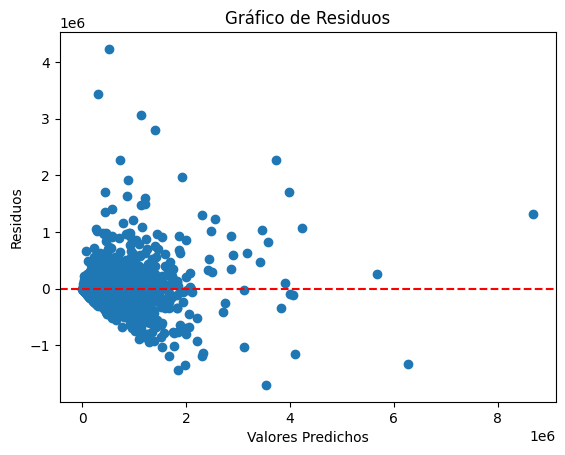

In [275]:
residuos = y_test_en - y_pred_rf_en

# Gráfico de residuos
plt.scatter(y_pred_rf_en, residuos)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos')
plt.show()

In [277]:
# Agregar una constante a los predictores para la prueba
X_test_scaled_const = sm.add_constant(X_test_scaled_en)

# Calcular la regresión OLS
modelo_ols = sm.OLS(y_test_en, X_test_scaled_const).fit()

# Realizar la prueba de Breusch-Pagan
bp_test = het_breuschpagan(modelo_ols.resid, modelo_ols.model.exog)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
resultados_bp = dict(zip(labels, bp_test))

print("Resultados de la Prueba de Breusch-Pagan:")
for key, value in resultados_bp.items():
    print(f"{key}: {value}")

Resultados de la Prueba de Breusch-Pagan:
Lagrange multiplier statistic: 355.274613764514
p-value: 1.8354574280836753e-64
f-value: 20.176833386349596
f p-value: 2.863064906850201e-65


### 5.7 Hist Gradient Boosting Regression

#### 5.7.1 Dataset original

In [261]:
hgb_model = HistGradientBoostingRegressor(random_state=42)

hgb_params = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_iter': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [20, 50, 100]
}

hgb_grid = GridSearchCV(hgb_model, hgb_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
hgb_grid.fit(X_train_scaled, y_train)
best_hgb = hgb_grid.best_estimator_

# Predicciones
y_pred_hgb = best_hgb.predict(X_test_scaled)

# Evaluación del modelo
mse_hgb = mean_squared_error(y_test, y_pred_hgb)
mae_hgb = mean_absolute_error(y_test, y_pred_hgb)
r2_hgb = r2_score(y_test, y_pred_hgb)
print('Hist Gradient MSE:', mse_hgb)
print('Hist Gradient MAE:', mae_hgb)
print('Hist Gradient R2:', r2_hgb)

Hist Gradient MSE: 47880721972.85869
Hist Gradient MAE: 95627.25789090431
Hist Gradient R2: 0.4911364516403628


#### 5.7.2 Dataset enriquecido

In [262]:
hgb_model = HistGradientBoostingRegressor(random_state=42)

hgb_params = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_iter': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [20, 50, 100]
}

hgb_grid = GridSearchCV(hgb_model, hgb_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
hgb_grid.fit(X_train_scaled_en, y_train_en)
best_hgb = hgb_grid.best_estimator_

print("Mejores hiperparámetros encontrados:")
print(best_hgb)

# Predicciones
y_pred_hgb_en = best_hgb.predict(X_test_scaled_en)

# Evaluación del modelo
mse_hgb_en = mean_squared_error(y_test_en, y_pred_hgb_en)
mae_hgb_en = mean_absolute_error(y_test_en, y_pred_hgb_en)
r2_hgb_en = r2_score(y_test_en, y_pred_hgb_en)
print('Hist Gradient MSE:', mse_hgb_en)
print('Hist Gradient MAE:', mae_hgb_en)
print('Hist Gradient R2:', r2_hgb_en)

Mejores hiperparámetros encontrados:
HistGradientBoostingRegressor(max_iter=200, random_state=42)
Hist Gradient MSE: 22190900114.04926
Hist Gradient MAE: 62509.8837101316
Hist Gradient R2: 0.7641610295740662


## 7. Resultados

In [263]:
data = [
    ['Lineal Original', mse_rl, mae_rl, r2_rl],
    ['Lineal Enriquecido', mse_rl_en, mae_rl_en, r2_rl_en],
    ['Polinomial original', mse_poly, mae_poly, r2_poly],
    ['Polinomial enriquecido', mse_poly_en, mae_poly_en, r2_poly_en],
    ['RN original', mse_rn, mae_rn, r2_rn],
    ['RN enriquecido', mse_rn_en, mae_rn_en, r2_rn_en],
    ['XGBoost original', mse_xgb, mae_xgb, r2_xgb],
    ['XGBoost enriquecido', mse_xgb_en, mae_xgb_en, r2_xgb_en],
    ['Decision tree original', mse_dt, mae_dt, r2_dt],
    ['Decision tree enriquecido', mse_dt_en, mae_dt_en, r2_dt_en],
    ['Random forest original', mse_rf, mae_rf, r2_rf],
    ['Random forest enriquecido', mse_rf_en, mae_rf_en, r2_rf_en],
    ['Hist Gradient original', mse_hgb, mae_hgb, r2_hgb],
    ['Hist Gradient original', mse_hgb_en, mae_hgb_en, r2_hgb_en]
]

# Crear el DataFrame especificando los nombres de las columnas
df = pd.DataFrame(data, columns=['Algoritmo y dataset', 'MSE', 'MAE', 'R2'])

In [264]:
df

Algoritmo y dataset           MSE            MAE        R2
0             Lineal Original  6.951764e+10  133114.221987  0.261185
1          Lineal Enriquecido  5.190970e+10  113318.664435  0.448318
2         Polinomial original  7.467330e+10  134961.728805  0.206392
3      Polinomial enriquecido  7.423521e+10  141000.622598  0.211048
4                 RN original  6.704448e+10  123641.767748  0.287469
5              RN enriquecido  5.032312e+10  101212.049344  0.465179
6            XGBoost original  4.718014e+10   95324.028957  0.498582
7         XGBoost enriquecido  1.660979e+10   53212.042697  0.823476
8      Decision tree original  4.625819e+10   92211.019646  0.508380
9   Decision tree enriquecido  3.059380e+10   65485.666533  0.674857
10     Random forest original  4.082046e+10   89037.917690  0.566171
11  Random forest enriquecido  1.598033e+10   46689.122978  0.830165
12     Hist Gradient original  4.788072e+10   95627.257891  0.491136
13     Hist Gradient original  2.219090e+10   62509.883710  0.764161

## 8. Ejemplo práctico

In [265]:
indice = randint(0, len(X_en))
indice

41865

In [266]:
registro_aleatorio = X_en.iloc[indice]
print(registro_aleatorio)
registro_aleatorio_df = pd.DataFrame([registro_aleatorio])

ID                        1.597328e+08
Habitaciones              4.000000e+00
Aseos                     2.000000e+00
Terraza                   1.000000e+00
Piscina                   0.000000e+00
Garaje                    0.000000e+00
Metros                    1.200000e+02
CodigoPostal              4.384000e+04
Precision                 1.000000e+00
CPRO                      4.300000e+01
Renta bruta media         1.269600e+04
PARO_TOTAL                2.223000e+00
Consumo total [kWh]       1.552331e+09
Num Talleres              3.000000e+00
Num entidades             5.400000e+01
Num centros sanitarios    1.400000e+01
Num comisarias            1.000000e+00
Caracteristicas_int       0.000000e+00
Name: 45271, dtype: float64


In [267]:
scaler = StandardScaler()
registro_aleatorio_scaled = scaler.fit_transform(registro_aleatorio_df)

In [270]:
random_predicted_value = best_rf.predict(registro_aleatorio_scaled)
random_predicted_value[0]

120584.14333333333

In [269]:
random_real_value = y.iloc[indice]
random_real_value

220000.0

In [272]:
X_test_en.head()

ID  Habitaciones  Aseos  Terraza  Piscina  Garaje  Metros  \
21716  161245102.0           2.0    1.0      0.0      1.0     1.0   108.0   
53438  161424639.0           2.0    1.0      0.0      0.0     0.0    55.0   
67054  159223483.0           2.0    1.0      0.0      0.0     0.0    70.0   
23531  162430171.0           1.0    1.0      0.0      0.0     0.0    63.0   
64676  158430854.0           4.0    2.0      1.0      0.0     0.0   200.0   

       CodigoPostal  Precision  CPRO  Renta bruta media  PARO_TOTAL  \
21716        8206.0        0.0   8.0             27.414      15.356   
53438       17310.0        0.0  17.0          11425.000       3.068   
67054       43747.0        1.0  43.0          13226.000      42.000   
23531       17300.0        0.0  17.0          14302.000       3.720   
64676       25113.0        0.0  25.0          16328.000      11.098   

       Consumo total [kWh]  Num Talleres  Num entidades  \
21716         5.985901e+09          47.0           56.0   
53438         1.698824e+09          33.0           94.0   
67054         4.606346e+07           3.0           13.0   
23531         1.792903e+09          69.0          124.0   
64676         5.894458e+09           1.0            5.0   

       Num centros sanitarios  Num comisarias  Caracteristicas_int  
21716                    16.0             0.0                    0  
53438                    29.0             1.0                    0  
67054                     2.0             0.0                    7  
23531                    23.0             1.0                    0  
64676                     0.0             0.0                    5

In [274]:
y_test_en.head()

21716    297990.0
53438     81000.0
67054     50000.0
23531     67000.0
64676    165000.0
Name: Precio, dtype: float64

In [271]:
y_pred_rf_en

array([236177.64      ,  84651.        ,  49004.28      , ...,
       235530.23666667, 183193.66666667, 172784.55333333])